# <p style="text-align: center;">Winc Academy – Data Analytics with Python</p>
### <p style="text-align: center;">First Jupyter Notebook (Part A) as supplement to<br><br>Report prepared for final assignment:  Module 7 – CO<sub>2</sub> emissions</p>

<p style="text-align: center;">by M. Schotten, May 2023</p>
<br><br>

### <p style="text-align: center;">Question 1:&nbsp;&nbsp; *What is the biggest predictor of a large CO<sub>2</sub> output per capita of a country?*</p>
<br><br>

<p style="text-align: center;"><strong>Note</strong>:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    The code for:&nbsp;&nbsp;<strong><em>Question 2 - Which countries are making the biggest strides in decreasing CO<sub>2</sub> output?</em></strong>
<br>- can be found in Part B of this Notebook, at around 2/3rd when scrolling down.</p>
<br><br>


In [1]:
# Winc Academy Module 7 Assignment text:
# ______________________________________
# 
# 
# ***********************************************************************************
# 
#          Final assignment - CO2 emissions - Q3
# 
# This is your final assignment. You'll get a lot of freedom in doing
# this assignment but that also means you have to make choices and 
# explain the reasoning behind those choices in your report.

# For this assignment you can use any dataset you can find from
# the Our World in Data website:  https://ourworldindata.org/
# 
# Please formulate an answer to the following three questions in your report.
# 
#  1. What is the biggest predictor of a large CO2 output per capita of a country?
#  2. Which countries are making the biggest strides in decreasing CO2 output?
#  3. Which non-fossil fuel energy technology will have the best price in the future?


#           1: Biggest predictor of CO2 output
# 
# To determine this you may want to consider things like GDP per capita, 
# diets, number of cars per capita, various energy sources, mobility and
# other factors.
# 
# Your answer can also be a specific combination of certain factors.


#           2: Biggest strides in decreasing CO2 output
# 
# You'll need to find the relative CO2 output for each country
# to be able to calculate this. But countries can have growing
# and shrinking populations too, so it's probably a good idea 
# to take this into account as well.


#           3: Best future price for non-fossil fuel energy
# 
# To be able to predict prices you'll probably need to use linear regression
# over the various non-fossil fuel options.


# Submitting
# Please submit both your written report and all notebooks you've created
# in creating the report. Make sure everything works before submitting.
# 
# 
# ***********************************************************************************


# --------------------------------------------------------------------------------------------------
# P.S. A partial "Answer" to Q1 can also be found in these OWID datasets:
# 
#  * https://ourworldindata.org/emissions-by-sector#per-capita-co2-where-do-our-emissions-come-from
#       file: per-capita-co2-sector.csv
#  * https://ourworldindata.org/
#           emissions-by-sector#sector-by-sector-where-do-global-greenhouse-gas-emissions-come-from
#       file: Global-GHG-Emissions-by-sector-based-on-WRI-2020.xlsx



In [2]:
# IMPORTING LIBRARIES
# 
# 
# Initializing:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt

# Needed to make plots display at a decent size:
plt.rcdefaults()

# Needed to make large values in itables (library
# will be imported in later cell) display properly,
# i.e., not rounded:
pd.set_option("display.precision", 10)

# Regex module can be used to search for substrings:
import re

# String module to create a set of letters in alphabetical
# order later on:
import string

# Needed to exit program in IF statements,
# based on condition: 
from sys import exit

# SciPy library Pearson correlation module: 
from scipy.stats import pearsonr

# # Or less common alternative, pingouin library correlation module;
# # but may need to be installed first, via: 
# # !pip install pingouin 
# # Commented out for this reason, but is a viable alternative:
# 
# from pingouin import corr


In [3]:
# READING IN RELEVANT DATASETS
# 
# 
# Read in all potentially relevant data files to answer Q1 & Q2.
# 
# 
# *********************************
#              NOTES:
# *********************************
# 
# - All datasets were obtained from "Our World In Data" (OWID)
# 
# - All except for two datasets were downloaded as individual CSV files
#      from the main OWID website at: https://ourworldindata.org/
# 
# - Two larger OWID datasets, i.e.:
#         * owid-co2-data.csv
#         * owid-energy-data.csv
# 
#      were downloaded from the OWID Github page at: https://github.com/owid/
#      respectively from:
#          * URL_CO2 = "https://github.com/owid/co2-data/raw/master/owid-co2-data.csv"
#          * URL_energy = "https://github.com/owid/energy-data/raw/master/owid-energy-data.csv"
# 
# - Rationale for using those two OWID source files from the OWID Github page:
# 
#     *  That way, only a limited nr. of files needed to be imported and merged
#        (otherwise lots of separate files, with usually one or only a few variables,
#        i.e. columns, per file; it's much easier to work with lots of columns in a single
#        file instead, bcs. that's a) less confusing and b) saves you from merging them).
    
#     *  The OWID file URLs on Github are 'stable' and can easily be referenced,
#        while files downloaded from the interactive charts on the OWID website
#        do not have stable URLs (it looks like they each have JavaScript download buttons)
#        and they also often have the same generic file names, making it more confusing.

# - After downloading all CSV files from OWID in December 2022, I uploaded them to
#      my own Github page at:  https://github.com/MikeSchotten/CO2_emissions/raw/main/datasets/
# 
# - These are the CSV files that are used as source data for the code below.
#      The reason for doing it like this is that this makes the results & charts from this
#      Jupyter Notebook predictable and consistent.  If needed, OWID datasets can always be
#      updated in the future, e.g. to include more recent data.
# 
#  - Please see further notes below for each CSV file, including:
#      * which columns I used
#      * the types of calculations that I performed on them
#      * units of measurement of the data
#      * any other observations, inconsistencies in the data that I noticed, etc.
# 
# ----------------------------------------------------------------------------------------


# Github folder where all downloaded OWID datasets are stored:
base_url = 'https://github.com/MikeSchotten/CO2_emissions/raw/main/datasets/'

# From https://github.com/owid/co2-data/raw/master/owid-co2-data.csv :
file_dir_CO2 = f"{base_url}owid-co2-data.csv"
# Relevant columns:
# - country
# - year
# - iso_code
# - population => this is the correct, most up-to-date value (not the population column in Energy)
# - gdp (divide by 'population' => GDP per capita; gives slightly lower numbers than in Maddison 2020 file)
# - co2 (production-based; measured in millions of tonnes; basis for 'co2_per_capita')
# - co2_per_capita (production-based, measured in tonnes/person; 
#                   same as value in co-emissions-per-capita.csv, but rounded to 3 decimals)
# - co2_growth_prct (might be needed to answer Q2)
# - co2_including_luc_per_capita (production-based; only available as of 2022)
# - consumption_co2_per_capita

# From https://github.com/owid/energy-data/raw/master/owid-energy-data.csv :
file_dir_energy = f"{base_url}owid-energy-data.csv"
# Relevant columns:
# - country
# - year
# - iso_code
# - fossil_fuel_consumption (= TWh) => calculate fossil_energy_per_capita (in kWh)
# - nuclear_consumption (= TWh) => calculate nuclear_energy_per_capita (in kWh)
# - renewables_consumption (= TWh) => calculate renewables_energy_per_capita (in kWh)
# - electricity_generation (= TWh) => calculate per_capita_electricity (in kWh). P.S. is LESS than
#     total of fossil + nuclear + renewables electricity generation)
# - electricity_demand (= TWh) => calculate per capita (in kWh)
# - fossil_share_elec
# - fossil_share_energy
# - fossil_electricity  (= TWh)=> calculate per capita (in kWh)
# - nuclear_electricity (= TWh) => calculate per capita (in kWh)
# - renewables_electricity (= TWh) => calculate per capita (in kWh)
# - primary_energy_consumption (= TWh) => calculate energy_per_capita (= kWh consumption/person/year)
# - energy_per_gdp (= kWh / 2011 intern.-$) => do NOT calculate per capita, because:
#                               1) Total energy consumption (numerator) is dependent on population
#                               2) A country's GDP (denominator) is ALSO dependent on population
#                                      => population size cancels itself out and becomes irrelevant.
# - coal_share_elec
# - coal_share_energy
# ***Note*** => the 'population' column contains outdated values, use the ones in the CO2 file above.

# Import the 'codebooks' to the above two files, i.e. CSV files
# that explain what each variable (column name) means and the units
# they are expressed in:
file_dir_CO2_codes = f"{base_url}owid-co2-codebook.csv"
file_dir_energy_codes = f"{base_url}owid-energy-codebook.csv"

# From https://ourworldindata.org/transport#passenger-vehicle-registrations-by-type
file_dir_nr_cars = f"{base_url}new-vehicles-type-area.csv"
# This is the absolute nr. of new car registrations per power source type.
# Use these to calculate:
# 1) Nr. of petrol + diesel cars per capita
# 2) Total nr. of cars per capita (all 5 types)
# 3) percentages for a) pure electric, b) petrol + diesel combined and c) diesel
# Or use a separate file with these shares: new-vehicles-type-share.csv

# From https://ourworldindata.org/transport#rail
file_dir_train_km = f"{base_url}railways-passengers-carried-passenger-km.csv"
# Calculate million_passenger_km_per_capita

# From https://ourworldindata.org/diet-compositions
file_dir_food_supply = \
    f"{base_url}daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv"
# - Notice these data are already per capita!  (based on OWID's own calculations; unknown
#      whether their used population data are identical to those in the CO2 file that I used
#      for the other per-capita calculations, as I found inconsistencies in population data 
#      for the same countries and years across different OWID datasets)
# - Also note, unlike the column headings in the CSV file suggest, these data are in kcal, not cal
# - Also calculate total of these 4 sources (see also file 'daily-per-capita-caloric-supply.csv',
#      which has also more years)
# - And % of protein calories.

# From https://ourworldindata.org/meat-production
file_dir_meat_prod = f"{base_url}global-meat-production.csv"
# => calculate per capita * 1000 (= kg meat/person)

# From https://ourworldindata.org/fish-and-overfishing#global-fish-production
file_dir_fish_prod = f"{base_url}capture-fisheries-vs-aquaculture.csv"
# Also calculate total of capture + aquaculture column, and then per capita
# Notes: I found that for USA, 2018, the following files are consistent:
#   - capture-fisheries-vs-aquaculture.csv (both farmed + wild)
#   - aquaculture-farmed-fish-production.csv (only farmed)
#   - capture-fishery-production.csv (only wild)
# But this one isn't:  fish-seafood-production.csv (total, should be farmed + wild but isn't).

# From https://ourworldindata.org/trade-and-globalization#exports-and-imports-in-real-dollars
file_dir_exports = f"{base_url}exports-of-goods-and-services-constant-2010-us.csv"
# => calculate per capita

# From https://ourworldindata.org/human-development-index#the-human-development-index-around-the-world
# (and for the HDI calculation method, see:
#    https://ourworldindata.org/human-development-index#how-is-the-human-development-index-calculated
#    => it's an index from 0 to 1 and therefore an ordinal value, so strictly speaking we can't perform
#       a Pearson correlation analysis on it.)
file_dir_HDI = f"{base_url}human-development-index.csv"

# From https://ourworldindata.org/human-development-index#gni-per-capita
file_dir_GNI = f"{base_url}gross-national-income-per-capita.csv"

# From https://ourworldindata.org/land-use, first chart, "Agricultural land use":
file_dir_agri_ha = f"{base_url}agricultural-land.csv"
# sum of cropland and pastures, in ha => calculate per capita

# From https://ourworldindata.org/urbanization, 3rd chart,
# "Do more people live in urban or rural areas?"
file_dir_urban_perc = f"{base_url}urban-vs-rural-majority.csv"

# From https://ourworldindata.org/plastic-pollution
file_dir_waste = f"{base_url}plastic-pollution.csv"
# Tonnes of total plastic waste, only 2010 data => calculate per capita * 1000 (= kg waste/person)


# Read in the data CSV files into pandas DataFrames:
df_raw_CO2 = pd.read_csv(file_dir_CO2, encoding="utf-8", usecols=[
    'country',
    'year',
    'iso_code',
    'population',
    'gdp',
    'co2',
    'co2_per_capita',
    'co2_growth_prct',
    'co2_including_luc_per_capita',
    'consumption_co2_per_capita'
])
df_raw_energy = pd.read_csv(file_dir_energy, encoding="utf-8", usecols=[
    'country',
    'year',
    'iso_code',
    'fossil_fuel_consumption',
    'nuclear_consumption',
    'renewables_consumption',
    'electricity_generation',
    'electricity_demand',
    'fossil_share_elec',
    'fossil_share_energy',
    'fossil_electricity',
    'nuclear_electricity',
    'renewables_electricity',
    'primary_energy_consumption',
    'energy_per_gdp',
    'coal_share_elec',
    'coal_share_energy'
])
df_raw_CO2_codes = pd.read_csv(file_dir_CO2_codes, encoding="utf-8")
df_raw_energy_codes = pd.read_csv(file_dir_energy_codes, encoding="utf-8")
df_raw_nr_cars = pd.read_csv(file_dir_nr_cars, encoding="utf-8")
df_raw_train_km = pd.read_csv(file_dir_train_km, encoding="utf-8")
df_raw_food_supply = pd.read_csv(file_dir_food_supply, encoding="utf-8")
df_raw_meat_prod = pd.read_csv(file_dir_meat_prod, encoding="utf-8")
df_raw_fish_prod = pd.read_csv(file_dir_fish_prod, encoding="utf-8")
df_raw_exports = pd.read_csv(file_dir_exports, encoding="utf-8")
df_raw_HDI = pd.read_csv(file_dir_HDI, encoding="utf-8")
df_raw_GNI = pd.read_csv(file_dir_GNI, encoding="utf-8")
df_raw_agri_ha = pd.read_csv(file_dir_agri_ha, encoding="utf-8")
df_raw_urban_perc = pd.read_csv(file_dir_urban_perc, encoding="utf-8")
df_raw_waste = pd.read_csv(file_dir_waste, encoding="utf-8")


In [4]:
# SHOWING DATAFRAMES:

display(df_raw_CO2)
display(df_raw_energy)
# display(df_raw_CO2_codes)
# display(df_raw_energy_codes)
# display(df_raw_nr_cars)
# display(df_raw_train_km)
# display(df_raw_food_supply)
# display(df_raw_meat_prod)
# display(df_raw_fish_prod)
# display(df_raw_exports)
# display(df_raw_HDI)
# display(df_raw_GNI)
# display(df_raw_agri_ha)
# display(df_raw_urban_perc)
# display(df_raw_waste)
# 

country  year iso_code  population            gdp     co2  \
0      Afghanistan  1850      AFG   3752993.0            NaN     NaN   
1      Afghanistan  1851      AFG   3769828.0            NaN     NaN   
2      Afghanistan  1852      AFG   3787706.0            NaN     NaN   
3      Afghanistan  1853      AFG   3806634.0            NaN     NaN   
4      Afghanistan  1854      AFG   3825655.0            NaN     NaN   
...            ...   ...      ...         ...            ...     ...   
46518     Zimbabwe  2017      ZWE  14751101.0  21947836416.0   9.596   
46519     Zimbabwe  2018      ZWE  15052191.0  22715353088.0  11.795   
46520     Zimbabwe  2019      ZWE  15354606.0            NaN  11.115   
46521     Zimbabwe  2020      ZWE  15669663.0            NaN  10.608   
46522     Zimbabwe  2021      ZWE  15993525.0            NaN  11.296   

       co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0                  NaN                           NaN             NaN   
1                  NaN                           NaN             NaN   
2                  NaN                           NaN             NaN   
3                  NaN                           NaN             NaN   
4                  NaN                           NaN             NaN   
...                ...                           ...             ...   
46518           -8.899                         1.294           0.651   
46519           22.920                         1.370           0.784   
46520           -5.772                         1.266           0.724   
46521           -4.559                         1.180           0.677   
46522            6.488                         1.174           0.706   

       consumption_co2_per_capita  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN  
...                           ...  
46518                       0.712  
46519                       0.835  
46520                       0.788  
46521                       0.741  
46522                         NaN  

[46523 rows x 10 columns]

country  year iso_code  coal_share_elec  coal_share_energy  \
0      Afghanistan  1900      AFG              NaN                NaN   
1      Afghanistan  1901      AFG              NaN                NaN   
2      Afghanistan  1902      AFG              NaN                NaN   
3      Afghanistan  1903      AFG              NaN                NaN   
4      Afghanistan  1904      AFG              NaN                NaN   
...            ...   ...      ...              ...                ...   
22338     Zimbabwe  2017      ZWE           41.313                NaN   
22339     Zimbabwe  2018      ZWE           40.416                NaN   
22340     Zimbabwe  2019      ZWE           32.007                NaN   
22341     Zimbabwe  2020      ZWE           30.963                NaN   
22342     Zimbabwe  2021      ZWE              NaN                NaN   

       electricity_demand  electricity_generation  energy_per_gdp  \
0                     NaN                     NaN             NaN   
1                     NaN                     NaN             NaN   
2                     NaN                     NaN             NaN   
3                     NaN                     NaN             NaN   
4                     NaN                     NaN             NaN   
...                   ...                     ...             ...   
22338                9.53                    7.31           2.093   
22339               10.15                    9.13           2.091   
22340               12.42                   11.31             NaN   
22341               12.22                   11.11             NaN   
22342                 NaN                     NaN             NaN   

       fossil_electricity  fossil_fuel_consumption  fossil_share_elec  \
0                     NaN                      NaN                NaN   
1                     NaN                      NaN                NaN   
2                     NaN                      NaN                NaN   
3                     NaN                      NaN                NaN   
4                     NaN                      NaN                NaN   
...                   ...                      ...                ...   
22338                3.05                      NaN             41.724   
22339                3.73                      NaN             40.854   
22340                3.66                      NaN             32.361   
22341                3.48                      NaN             31.323   
22342                 NaN                      NaN                NaN   

       fossil_share_energy  nuclear_consumption  nuclear_electricity  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
22338                  NaN                  NaN                  0.0   
22339                  NaN                  NaN                  0.0   
22340                  NaN                  NaN                  0.0   
22341                  NaN                  NaN                  0.0   
22342                  NaN                  NaN                  NaN   

       primary_energy_consumption  renewables_consumption  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             NaN                     NaN   
3                             NaN                     NaN   
4                             NaN                     NaN   
...                           ...                     ...   
22338                      45.936                     NaN   
22339                      47.502                     NaN   
22340         

In [5]:
# USING & INITIALIZING ITABLES
# 
# 
# --------------------------------------------------------
# NOTE TO WINC INSTRUCTORS:
# 
# The following code won't work if you haven't 
# installed the itables library on your machine.  
# 
# Therefore, I have commented this cell out.
# 
# If you do have itables installed and want to use it,
# you can undo the commenting.
# 
# And itables can be installed with:
# 
#     pip install itables
# 
# --------------------------------------------------------


# # The itables library has similar functionality as G. Colabs Data Tables,
# # and needs to have been installed beforehand.
# # Documentation: https://mwouts.github.io/itables/quick_start.html

# from itables import init_notebook_mode, show
# init_notebook_mode(all_interactive=False)
# # init_notebook_mode(all_interactive=True)

# import itables.options as opt
# opt.order = []  # No sorting by default; so display DF exactly as the original CSV file
# opt.classes = ["display", "cell-border"]   # Show borders between table cells
# opt.lengthMenu = [5, 7, 10, 20, 50, 100, 200]  # Customize menu with nr. of rows shown per page
# opt.column_filters = "footer"  # Show filters at bottom of table

# # Set column width; if you don't do this, the column headers and data become illegible.
# opt.columnDefs = [{"width": "75px", "targets": "_all"}]

# # Set option to display ALL columns 
# # (default = pd.get_option('display.max_columns') = 20 columns max):
# opt.maxColumns = 0


In [6]:
# Helper function to show full MultiIndex DF with itables
# 
# 
# This is especially helpful to display MultiIndex DFs, which
# usually get "messed up" with the "regular" itables display.
# 
# (It also works with regular DFs, but with narrower columns
# and altered display cf. to the "regular" itables display.)
# 
# By setting some itables options, it's possible to display
# a MultiIndex DF without distortions. 
# This allows useful filtering, checking all the years, etc.
# 
# From:
# https://mwouts.github.io/itables/advanced_parameters.html#
# [Note: only the 2 decimal float display (.2f in the "with"
# line) doesn't work yet.]

def show_with_itables(df):
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        show(
            df,
    #         scrolly="1000px",
    #         scrollCollapse=True,
    #         classes="display nowrap compact",
    #         scrollX="1000px",
            style="table-layout:auto; width:10%; float:left",
    #         classes="display",
            scrollY="2000px", 
            scrollX=True,
            scrollCollapse=True,
    #         paging=False,
    #         footer=True,
            maxBytes=0,
            )


In [7]:
# INITIAL INSPECTION OF DFs VIA ITABLES:
# 
# (Only possible if you have this installed.)


# show(
#     df_raw_GNI,
#     scrolly="1000px",
#     maxBytes=0
# )

# Replace DF name above with any of the following,
# if needed:

# df_raw_CO2
# df_raw_energy
# df_raw_CO2_codes
# df_raw_energy_codes
# df_raw_nr_cars
# df_raw_train_km
# df_raw_food_supply
# df_raw_meat_prod
# df_raw_fish_prod
# df_raw_exports
# df_raw_HDI
# df_raw_GNI
# df_raw_agri_ha
# df_raw_urban_perc
# df_raw_waste


In [8]:
# Comparing the "regular" itables display above with
# the same DF in the "show_with_itables" function:


# show_with_itables(df_raw_GNI)



In [9]:
# We will use the DF with CO2 data as the 'main' DF
# to left-merge or join all the other DFs to.
# 
# Because CO2 data will always be needed to answer the 3 questions
# of the Assignment, we should therefore first reduce the CO2 DF by
# removing all rows that have NaN values in ALL of the CO2 data columns,
# - but keep those rows that have CO2 data in at least one column:

# df_CO2_reduced = df_raw_CO2.loc[
#      ~(df_raw_CO2['co2_growth_prct'].isnull() &
#        df_raw_CO2['co2_including_luc_per_capita'].isnull() &
#        df_raw_CO2['co2_per_capita'].isnull() &
#        df_raw_CO2['consumption_co2_per_capita'].isnull())
# ].reset_index(drop=True)

df_CO2_reduced = df_raw_CO2.loc[
     ~(((df_raw_CO2['co2']==0) | df_raw_CO2['co2'].isnull()) &
       ((df_raw_CO2['co2_growth_prct']==0) | df_raw_CO2['co2_growth_prct'].isnull()) &
       df_raw_CO2['co2_including_luc_per_capita'].isnull() &
       df_raw_CO2['co2_per_capita'].isnull() &
       df_raw_CO2['consumption_co2_per_capita'].isnull())
].reset_index(drop=True)

# Check result:
# show(
#     df_CO2_reduced,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_CO2_reduced)


country  year iso_code  population            gdp     co2  \
0      Afghanistan  1949      AFG   7624058.0            NaN   0.015   
1      Afghanistan  1950      AFG   7480464.0   9421400064.0   0.084   
2      Afghanistan  1951      AFG   7571542.0   9692279808.0   0.092   
3      Afghanistan  1952      AFG   7667534.0  10017325056.0   0.092   
4      Afghanistan  1953      AFG   7764549.0  10630519808.0   0.106   
...            ...   ...      ...         ...            ...     ...   
29268     Zimbabwe  2017      ZWE  14751101.0  21947836416.0   9.596   
29269     Zimbabwe  2018      ZWE  15052191.0  22715353088.0  11.795   
29270     Zimbabwe  2019      ZWE  15354606.0            NaN  11.115   
29271     Zimbabwe  2020      ZWE  15669663.0            NaN  10.608   
29272     Zimbabwe  2021      ZWE  15993525.0            NaN  11.296   

       co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0                  NaN                         1.054           0.002   
1              475.000                         1.148           0.011   
2                8.696                         1.207           0.012   
3                0.000                         1.297           0.012   
4               16.000                         1.406           0.014   
...                ...                           ...             ...   
29268           -8.899                         1.294           0.651   
29269           22.920                         1.370           0.784   
29270           -5.772                         1.266           0.724   
29271           -4.559                         1.180           0.677   
29272            6.488                         1.174           0.706   

       consumption_co2_per_capita  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN  
...                           ...  
29268                       0.712  
29269                       0.835  
29270                       0.788  
29271                       0.741  
29272                         NaN  

[29273 rows x 10 columns]

In [10]:
# RENAME COLUMNS TO BE USED AS MERGE KEYS

# After inital inspection of all DFs, it was found that 2 out of 13
# DFs have 'year' and 'iso_code' as names for the columns that will
# later be used as merge keys, while for the remaining 11 DFs those
# same columns are called 'Year' and 'Code', respectively.
# 
# In order to enable the later merge of all 13 DFs, change column
# names for those two DFs.
# 
# Also, the 'Entity' column in the 11 DFs is called 'country'
# in those 2 DFs, change that column name as well:

df_CO2 = df_CO2_reduced.rename(columns={
    'country': 'Entity',
    'year': 'Year',
    'iso_code': 'Code',
})

df_energy = df_raw_energy.rename(columns={
    'country': 'Entity',
    'year': 'Year',
    'iso_code': 'Code',
})


In [11]:
# Helper functions:


# Function to find entities/countries with
# a missing country code in a DF:

def show_code_nan_countries(df):
    
    # Find entries with country_code = NaN:
    df_code_nan = df.loc[df['Code'].isnull()]
    nr_unique_code_nan = len(df_code_nan['Entity'].unique())

    # Find the unique country names for those and their frequency:
    df_countries_w_code_nan_freq = df_code_nan.loc[:, 'Entity'].value_counts()

    # Show results:
    print(f'The following {nr_unique_code_nan} regions/countries have a missing value\n' \
          'in the country code column + their nr. of rows:\n')
    if nr_unique_code_nan > 60 and nr_unique_code_nan <= 120:
        remainder  = nr_unique_code_nan - 60
        print(df_countries_w_code_nan_freq.head(60))
        print('\n...\n')
        print(df_countries_w_code_nan_freq.tail(remainder))
    elif nr_unique_code_nan > 120:
        missing = nr_unique_code_nan - 120
        print('HEAD:\n')
        print(df_countries_w_code_nan_freq.head(60))
        print(f'\n\n(...CAUTION: {missing} values not shown here!...)\n\n')
        print('TAIL:\n')
        print(df_countries_w_code_nan_freq.tail(60))
    else:
        print(df_countries_w_code_nan_freq)
    
    # Show itables of df, for easy filtering etc.:
#     show(
#         df,
#         scrolly="1000px",
#         maxBytes=0
#     )

    
# Function to correct country names (if needed)
# and add missing country codes, based on a lookup table
# (to be built up after inspection of each DF with the above
# helper function):

def add_country_codes(df):
    
    # Create copy of df to modify:
    df2 = df.copy()
    
    # A lookup dictionary to retrieve the correct country names and codes
    # (for those countries in the various DFs with a missing code, and 
    # possibly incorrect name) will be built in the cells below, after
    # inspection of each DF.
    for country in lookup_dict:
        df2.loc[df2['Entity']==country, ['Entity', 'Code']] = \
                lookup_dict[country]
    
    return df2



In [12]:
# CHECK DFs FOR MISSING COUNTRY CODES

# Manually inspect each DF, one at a time (commenting out the others)
# to find countries/entities with missing country codes.
# 
# Note that many of these entities will be regions or 
# larger aggregations of countries, which are of course expected
# to have a missing code; so these can be ignored in the cleaning step.

show_code_nan_countries(df_CO2)
# show_code_nan_countries(df_energy)
# show_code_nan_countries(df_raw_nr_cars)
# show_code_nan_countries(df_raw_train_km)
# show_code_nan_countries(df_raw_food_supply)
# show_code_nan_countries(df_raw_meat_prod)
# show_code_nan_countries(df_raw_fish_prod)
# show_code_nan_countries(df_raw_exports)
# show_code_nan_countries(df_raw_HDI)
# show_code_nan_countries(df_raw_GNI)
# show_code_nan_countries(df_raw_agri_ha)
# show_code_nan_countries(df_raw_urban_perc)
# show_code_nan_countries(df_raw_waste)


The following 37 regions/countries have a missing value
in the country code column + their nr. of rows:

World                             272
High-income countries             272
Europe                            272
Europe (excl. EU-27)              272
European Union (28)               272
North America (excl. USA)         241
North America                     241
European Union (27)               230
Upper-middle-income countries     227
South America                     227
Oceania                           227
Lower-middle-income countries     227
Low-income countries              227
Africa                            227
Europe (excl. EU-28)              227
Asia (excl. China and India)      227
Asia                              227
North America (GCP)               172
OECD (GCP)                        172
Europe (GCP)                      172
European Union (27) (GCP)         172
Non-OECD (GCP)                    166
Asia (GCP)                        166
Oceania (GCP)        

In [13]:
# CREATE LOOKUP TABLE

# From inspection of each DF (using the 'show_code_nan_countries'
# helper function, one DF at a time), manually build up a lookup table
# (as a dictionary) with:
# 
#   - key = entity or country name (possibly incorrect) in
#           the inspected DF with missing country code
#   - value = tuple with the correct country name & country code
#             (manually found either from other rows in the same DF,
#              from other DFs, or from an internet search).
# 
# This dictionary will be used in the below cleaning step for each DF,
# using the 'add_country_codes' helper function:

lookup_dict = {
    'Bonaire Sint Eustatius and Saba': ('Bonaire, Sint Eustatius and Saba', 'BES'),  # add comma
    'Cabo Verde': ('Cape Verde', 'CPV'),
    'Curacao': ('Cura\u00e7ao', 'CUW'),            # replace small 'c' with 'ç' (unicode character)
    'Czechia': ('Czech Republic','CZE'),           # 'Czech Republic' is the official name
    'French Guyana': ('French Guiana', 'GUF'),
    'Faeroe Islands': ('Faroe Islands', 'FRO'),   # the CO2, energy and a few other OWID files have the
                                                  # incorrect country name, with 'ae' instead of 'a'!
    'Faroe Islands': ('Faroe Islands', 'FRO'),
    'Kosovo': ('Kosovo', 'XKX'),
    'Sudan (former)': ('Sudan', 'SDN'),
    'Wallis and Futuna Islands': ('Wallis and Futuna', 'WLF'),    
}

# Not included in 'lookup-dict' are:
#  - continents, regions and larger aggregations of countries (such as the EU)
#  - former countries which fell apart into smaller countries that still exist today
#    (examples are: USSR, Yugoslavia , French West Africa, and Czechoslovakia)
#    * The only exception I made to this is 'Sudan (former)', of which 'South Sudan',
#      code 'SSD', split off in 2011; I changed 'Sudan (former)' into 'Sudan', 
#      code 'SDN'.
# 
# In general, I kept to OWID's own list of country codes and names at
# https://www.worlddata.info/countrycodes.php
# 
# ...and in a few cases I needed to look up country names online
# to check their political status and history.
# 
# P.S. Please note that OWID's own list of country codes
# mentioned above also includes overseas territories that do not
# actually have country status, such as "Bonaire, Sint Eustatius and Saba"
# which is technically just a Dutch municipality.  However, it does have
# the ISO country code BES, and for consistency, I will refer to all these
# nations and dependent territories as "countries".


In [14]:
# CLEAN DFs: ADD COUNTRY CODES

# The inspection above showed that 11 out of 13 DFs needed cleaning,
# i.e. adding country codes where missing and/or correcting
# country names (especially 'Faeroe Islands' to 'Faroe Islands')
# to the standardized format used by OWID (with a few additional
# modifications), see
# https://www.worlddata.info/countrycodes.php
# 
# But to keep the approach straightforward, 
# I cleaned all 13 DFs :

df_cleaned_CO2 = add_country_codes(df_CO2)
df_cleaned_energy = add_country_codes(df_energy)
df_cleaned_nr_cars = add_country_codes(df_raw_nr_cars)
df_cleaned_train_km = add_country_codes(df_raw_train_km)
df_cleaned_food_supply = add_country_codes(df_raw_food_supply)
df_cleaned_meat_prod = add_country_codes(df_raw_meat_prod)
df_cleaned_fish_prod = add_country_codes(df_raw_fish_prod)
df_cleaned_exports = add_country_codes(df_raw_exports)
df_cleaned_HDI = add_country_codes(df_raw_HDI)
df_cleaned_GNI = add_country_codes(df_raw_GNI)
df_cleaned_agri_ha = add_country_codes(df_raw_agri_ha)
df_cleaned_urban_perc = add_country_codes(df_raw_urban_perc)
df_cleaned_waste = add_country_codes(df_raw_waste)



In [15]:
# Inspect a cleaned DF in itables:

# show(
#     df_cleaned_CO2,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_cleaned_CO2)


Entity  Year Code  population            gdp     co2  \
0      Afghanistan  1949  AFG   7624058.0            NaN   0.015   
1      Afghanistan  1950  AFG   7480464.0   9421400064.0   0.084   
2      Afghanistan  1951  AFG   7571542.0   9692279808.0   0.092   
3      Afghanistan  1952  AFG   7667534.0  10017325056.0   0.092   
4      Afghanistan  1953  AFG   7764549.0  10630519808.0   0.106   
...            ...   ...  ...         ...            ...     ...   
29268     Zimbabwe  2017  ZWE  14751101.0  21947836416.0   9.596   
29269     Zimbabwe  2018  ZWE  15052191.0  22715353088.0  11.795   
29270     Zimbabwe  2019  ZWE  15354606.0            NaN  11.115   
29271     Zimbabwe  2020  ZWE  15669663.0            NaN  10.608   
29272     Zimbabwe  2021  ZWE  15993525.0            NaN  11.296   

       co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0                  NaN                         1.054           0.002   
1              475.000                         1.148           0.011   
2                8.696                         1.207           0.012   
3                0.000                         1.297           0.012   
4               16.000                         1.406           0.014   
...                ...                           ...             ...   
29268           -8.899                         1.294           0.651   
29269           22.920                         1.370           0.784   
29270           -5.772                         1.266           0.724   
29271           -4.559                         1.180           0.677   
29272            6.488                         1.174           0.706   

       consumption_co2_per_capita  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN  
...                           ...  
29268                       0.712  
29269                       0.835  
29270                       0.788  
29271                       0.741  
29272                         NaN  

[29273 rows x 10 columns]

In [16]:
# Check cleaning step:

# If desired, you can check that the cleaned DFs now indeed
# have the corrected country names and added codes:

# show_code_nan_countries(df_cleaned_CO2)
# show_code_nan_countries(df_cleaned_energy)
# show_code_nan_countries(df_cleaned_nr_cars)
# show_code_nan_countries(df_cleaned_train_km)
# show_code_nan_countries(df_cleaned_food_supply)
# show_code_nan_countries(df_cleaned_meat_prod)
# show_code_nan_countries(df_cleaned_fish_prod)
# show_code_nan_countries(df_cleaned_exports)
# show_code_nan_countries(df_cleaned_HDI)
# show_code_nan_countries(df_cleaned_GNI)
# show_code_nan_countries(df_cleaned_agri_ha)
# show_code_nan_countries(df_cleaned_urban_perc)
# show_code_nan_countries(df_cleaned_waste)



In [17]:
# Helper function to merge 2 DFs at a time:


# This function left-merges the 2nd input DF to the 1st
# input DF, using a double merge key (= 2 column names to 
# perform the merge on).

def merge_DFs_w_double_key(df_left, df_right, key1, key2):
    
    # Create breakpoint for the output, to be used
    # when this function is invoked in a FOR loop later on
    # with multiple DFs:
    breakpoint = False
    
    # Remove all rows in the left DF where either
    # one of the merge key columns contains a NaN
    # value.  This is needed bcs. the pandas .merge()
    # method will also merge rows with NaN keys in 
    # both DFs, which could lead to errors.
    df_left_cleaned = df_left.loc[
        ~(df_left[key1].isnull() |
          df_left[key2].isnull())
    ].reset_index(drop=True)
    
    # Do the same for the right DF (even though
    # technically it would be sufficient to only
    # remove the NaN values from the left DF).
    df_right_cleaned = df_right.loc[
        ~(df_right[key1].isnull() |
          df_right[key2].isnull())
    ].reset_index(drop=True)
    
    # The actual merge (where ALL rows of the left
    # DF = CO2 DF will be kept, as it's a left-merge):
    df_merged = pd.merge(
        left=df_left_cleaned,
        right=df_right_cleaned,
        how='left',
        on=[key1, key2],
        suffixes=('_L', '_R'),
        validate='one_to_one'
    )

    # Sanity check that 'Entity_L' and 'Entity_R' (i.e. the country name)
    # of merged items are the same.
    #
    # First create a new column with True/False values for each row
    # (True if the country in both columns is the same):
    df_merged['Same_country_check'] = \
    df_merged.loc[
        ~(df_merged['Entity_R'].isnull()), 'Entity_L'] == \
    df_merged.loc[
        ~(df_merged['Entity_R'].isnull()), 'Entity_R'
    ]
    
    # Sanity check (True or False) to verify that there are no False
    # values in this new column:
    sanity_check = not(False in set(df_merged['Same_country_check']))
    
    # If sanity check was successful, delete the new column again, 
    # as well as the 'Entity_R' column (now redundant); or if not,
    # print warning + set breakpoint to True:
    if sanity_check == True:
        df_merged.drop(columns=['Entity_R', 'Same_country_check'], inplace=True)
        df_merged.rename(columns={'Entity_L': 'Entity'}, inplace=True)
    
    else:
        print(
            '\nWARNING: a sanity check showed that not all merged rows' \
            '\nin the merge of these 2 DFs have the same country name' \
            '\nin the "Entity_L" and "Entity_R" columns, which SHOULD' \
            '\nbe the case if the merge were performed correctly.\n' \
            '\nPlease check the FALSE values in the right-most column' \
            '\n"Same_country_check" to see which country or countries' \
            '\nthis concerns.  These need to be fixed before continuing.\n\n'
            )
        breakpoint = True
        
        # Exit program programmatically 
        # (from the earlier imported sys module):
        exit()
    
    return (df_merged, breakpoint)



In [18]:
# Use above function to left-merge the energy DF to the CO2 DF,
# with the double merge key "Code" and "Year".
# 
# So only rows with the same country code-year combination in both
# DFs will be merged.
# 
# As all the various downloaded OWID data files contain unique data
# for a specific country and year in each row - and from
# previous inspection (and also from the Module 6 assignment)
# we know that these codes are very clean and uniform in the
# OWID database, with some minor extra cleaning performed
# above - we know the merged DF will contain clean & unique
# CO2 and Energy data for each country-year combination.
# 
# Also notice that:
# 
#  a) Bcs. the function first deletes all rows with a NaN value in
#      either the Code or Year column, the merged DF will ONLY
#      contain rows with data for actual countries (i.e. with a valid country
#      code), and not for country aggregations/ regions.
#      
#  b) Bcs. it's a left-merge to the CO2 DF, ALL rows of the CO2
#      DF (as long as they have a country code AND year AND CO2 data
#      in at least one of the columns) will be preserved.  This means
#      that quite a few of those rows could have NaN values in all
#      of the Energy columns, i.e. if that double merge key was not
#      present in the Energy DF.
#      That is what we want, however, because there could be valid
#      data for that country-year combination in any of the other
#      DFs that we will merge in the next step (i.e., also to be compared
#      against the CO2 data).

(df_merged, breakpoint) = merge_DFs_w_double_key(df_cleaned_CO2, df_cleaned_energy, 'Code', 'Year')

# Check result:
# show(
#     df_merged,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_merged)


Entity  Year Code  population            gdp     co2  \
0      Afghanistan  1949  AFG   7624058.0            NaN   0.015   
1      Afghanistan  1950  AFG   7480464.0   9421400064.0   0.084   
2      Afghanistan  1951  AFG   7571542.0   9692279808.0   0.092   
3      Afghanistan  1952  AFG   7667534.0  10017325056.0   0.092   
4      Afghanistan  1953  AFG   7764549.0  10630519808.0   0.106   
...            ...   ...  ...         ...            ...     ...   
23252     Zimbabwe  2017  ZWE  14751101.0  21947836416.0   9.596   
23253     Zimbabwe  2018  ZWE  15052191.0  22715353088.0  11.795   
23254     Zimbabwe  2019  ZWE  15354606.0            NaN  11.115   
23255     Zimbabwe  2020  ZWE  15669663.0            NaN  10.608   
23256     Zimbabwe  2021  ZWE  15993525.0            NaN  11.296   

       co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0                  NaN                         1.054           0.002   
1              475.000                         1.148           0.011   
2                8.696                         1.207           0.012   
3                0.000                         1.297           0.012   
4               16.000                         1.406           0.014   
...                ...                           ...             ...   
23252           -8.899                         1.294           0.651   
23253           22.920                         1.370           0.784   
23254           -5.772                         1.266           0.724   
23255           -4.559                         1.180           0.677   
23256            6.488                         1.174           0.706   

       consumption_co2_per_capita  ...  energy_per_gdp  fossil_electricity  \
0                             NaN  ...             NaN                 NaN   
1                             NaN  ...             NaN                 NaN   
2                             NaN  ...             NaN                 NaN   
3                             NaN  ...             NaN                 NaN   
4                             NaN  ...             NaN                 NaN   
...                           ...  ...             ...                 ...   
23252                       0.712  ...           2.093                3.05   
23253                       0.835  ...           2.091                3.73   
23254                       0.788  ...             NaN                3.66   
23255                       0.741  ...             NaN                3.48   
23256                         NaN  ...             NaN                 NaN   

       fossil_fuel_consumption  fossil_share_elec  fossil_share_energy  \
0                          NaN                NaN                  NaN   
1                          NaN                NaN                  NaN   
2                          NaN                NaN                  NaN   
3                          NaN                NaN                  NaN   
4                          NaN                NaN                  NaN   
...                        ...                ...                  ...   
23252                      NaN             41.724                  NaN   
23253                      NaN             40.854                  NaN   
23254                      NaN             32.361                  NaN   
23255                      NaN             31.323                  NaN   
23256                      NaN                NaN                  NaN   

       nuclear_consumption  nuclear_electricity  primary_energy_consumption  \
0                      NaN                  NaN                         NaN   
1                      NaN                  NaN                         NaN   
2                      NaN                  NaN                         NaN   
3                      NaN                  NaN                         NaN   
4                      NaN                  NaN                         NaN   
...                    ...    

In [19]:
# Build list of the remaining DFs to be left-merged
# to 'df_merged' (which itself is a left-merge
# of the 'CO2' df and 'energy' df):

DF_list = [
    df_cleaned_nr_cars,
    df_cleaned_train_km,
    df_cleaned_food_supply,
    df_cleaned_meat_prod,
    df_cleaned_fish_prod,
    df_cleaned_exports,
    df_cleaned_HDI,
    df_cleaned_GNI,
    df_cleaned_agri_ha,
    df_cleaned_urban_perc,
    df_cleaned_waste,
]


In [20]:
# MERGE ALL DFs

# Using the above helper function, left-merge all remaining
# (and cleaned) DFs to the already merged CO2-Energy DF,
# one DF at a time in a FOR loop.
# 
# If the sanity check of any merge shows that the two 'Entity'
# (= country) columns do not contain the same country for
# any of the merged rows, break the FOR loop and print warning
#  message, so that the user can inspect manually (in the temporary
# 'Same_country_check' column) what happened in that merge:

merge_nr = 0

for DF in DF_list:
    merge_nr = merge_nr + 1
    print(f'Left-merge of DF nr. {merge_nr} (out of {len(DF_list)} DFs) to base "CO2" DF...')
    (df_merged, breakpoint) = merge_DFs_w_double_key(df_merged, DF, 'Code', 'Year')
    if breakpoint == True:
        break


# Check result:
# show(
#     df_merged,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_merged)


Left-merge of DF nr. 1 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 2 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 3 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 4 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 5 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 6 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 7 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 8 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 9 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 10 (out of 11 DFs) to base "CO2" DF...
Left-merge of DF nr. 11 (out of 11 DFs) to base "CO2" DF...


Entity  Year Code  population            gdp     co2  \
0      Afghanistan  1949  AFG   7624058.0            NaN   0.015   
1      Afghanistan  1950  AFG   7480464.0   9421400064.0   0.084   
2      Afghanistan  1951  AFG   7571542.0   9692279808.0   0.092   
3      Afghanistan  1952  AFG   7667534.0  10017325056.0   0.092   
4      Afghanistan  1953  AFG   7764549.0  10630519808.0   0.106   
...            ...   ...  ...         ...            ...     ...   
23252     Zimbabwe  2017  ZWE  14751101.0  21947836416.0   9.596   
23253     Zimbabwe  2018  ZWE  15052191.0  22715353088.0  11.795   
23254     Zimbabwe  2019  ZWE  15354606.0            NaN  11.115   
23255     Zimbabwe  2020  ZWE  15669663.0            NaN  10.608   
23256     Zimbabwe  2021  ZWE  15993525.0            NaN  11.296   

       co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0                  NaN                         1.054           0.002   
1              475.000                         1.148           0.011   
2                8.696                         1.207           0.012   
3                0.000                         1.297           0.012   
4               16.000                         1.406           0.014   
...                ...                           ...             ...   
23252           -8.899                         1.294           0.651   
23253           22.920                         1.370           0.784   
23254           -5.772                         1.266           0.724   
23255           -4.559                         1.180           0.677   
23256            6.488                         1.174           0.706   

       consumption_co2_per_capita  ...  \
0                             NaN  ...   
1                             NaN  ...   
2                             NaN  ...   
3                             NaN  ...   
4                             NaN  ...   
...                           ...  ...   
23252                       0.712  ...   
23253                       0.835  ...   
23254                       0.788  ...   
23255                       0.741  ...   
23256                         NaN  ...   

       Meat, total | 00001765 || Production | 005510 || tonnes  \
0                                                    NaN         
1                                                    NaN         
2                                                    NaN         
3                                                    NaN         
4                                                    NaN         
...                                                  ...         
23252                                           202882.0         
23253                                           199012.0         
23254                                           194412.0         
23255                                           193746.0         
23256                                                NaN         

       Aquaculture production (metric tons)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
23252                               10300.0   
23253                               10585.0   
23254                                   NaN   
23255                                   NaN   
23256                                   NaN   

       Capture fisheries production (metric tons)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
23252                                    100710.0   
23253                                    11

In [21]:
# EXTRA STEP: USE .JOIN() METHOD AS SANITY CHECK

# Just as an exercise for myself - and also to verify that the
# just created 'df_merged' is correct, as a sanity check - 
# I also used the .join() method to get the same result
# (with the potential to need less code, as the .join() method
# allows for joining a list of DFs all at once, while 
# the .merge() method only allows merging of two DFs at a time).
# 
# This does require extra prep work, however:
# 
#  1) Bcs. the .join() method uses the indices of all DFs
#      as join key (and I found there's no other option,
#      i.e. to specify columns as join keys, if you join
#      multiple DFs simultaneously), we first need to create
#      a 'Code'-'Year' MultiIndex for each DF to be joined.
# 
#  2) Bcs. you can't specify suffixes if you join multiple
#      DFs at the same time (if you try to do so it gives a warning
#      but will throw an error in future versions; regardless,
#      you'll get multiple 'Entity' columns with the same name in the 
#      joined DF, which creates problems with the sanity check etc.),
#      we need to first rename the 'Entity' column (which has the 
#      same name in all DFs) and manually assign it a suffix 
#      before joining.
# 
# And again (as with the .merge() method), we need to remove all
# rows in each DF to be joined that have a NaN value in either 
# the 'Code' or 'Year' column - so BEFORE creating the MultiIndex out
# of these two columns for each DF.
# 
# If we don't do this, I found that it results in errors, where countries
# are joined to NaN values in the CO2 DF, or vice versa.


# First do these steps for the 'base' CO2 DF, to which the other DFs
# will be joined (similar to a left-merge):

# Removing rows with NaN values in the two merge key columns...:
df_cleaned_CO2_MultInd = df_cleaned_CO2.loc[
        ~(df_cleaned_CO2['Code'].isnull() |
          df_cleaned_CO2['Year'].isnull())
    ].reset_index(drop=True)

# ...and then creating a MultiIndex from these columns:
df_cleaned_CO2_MultInd = df_cleaned_CO2_MultInd.set_index(['Code', 'Year'])

# Show result:
df_cleaned_CO2_MultInd



Entity  population            gdp     co2  co2_growth_prct  \
Code Year                                                                    
AFG  1949  Afghanistan   7624058.0            NaN   0.015              NaN   
     1950  Afghanistan   7480464.0   9421400064.0   0.084          475.000   
     1951  Afghanistan   7571542.0   9692279808.0   0.092            8.696   
     1952  Afghanistan   7667534.0  10017325056.0   0.092            0.000   
     1953  Afghanistan   7764549.0  10630519808.0   0.106           16.000   
...                ...         ...            ...     ...              ...   
ZWE  2017     Zimbabwe  14751101.0  21947836416.0   9.596           -8.899   
     2018     Zimbabwe  15052191.0  22715353088.0  11.795           22.920   
     2019     Zimbabwe  15354606.0            NaN  11.115           -5.772   
     2020     Zimbabwe  15669663.0            NaN  10.608           -4.559   
     2021     Zimbabwe  15993525.0            NaN  11.296            6.488   

           co2_including_luc_per_capita  co2_per_capita  \
Code Year                                                 
AFG  1949                         1.054           0.002   
     1950                         1.148           0.011   
     1951                         1.207           0.012   
     1952                         1.297           0.012   
     1953                         1.406           0.014   
...                                 ...             ...   
ZWE  2017                         1.294           0.651   
     2018                         1.370           0.784   
     2019                         1.266           0.724   
     2020                         1.180           0.677   
     2021                         1.174           0.706   

           consumption_co2_per_capita  
Code Year                              
AFG  1949                         NaN  
     1950                         NaN  
     1951                         NaN  
     1952                         NaN  
     1953                         NaN  
...                               ...  
ZWE  2017                       0.712  
     2018                       0.835  
     2019                       0.788  
     2020                       0.741  
     2021                         NaN  

[23257 rows x 8 columns]

In [22]:
# Do the same steps for the cleaned Energy DF:
df_cleaned_energy_MultInd = df_cleaned_energy.loc[
        ~(df_cleaned_energy['Code'].isnull() |
          df_cleaned_energy['Year'].isnull())
    ].reset_index(drop=True)

df_cleaned_energy_MultInd = df_cleaned_energy_MultInd.set_index(['Code', 'Year'])

# This time also rename the 'Entity' column:
df_cleaned_energy_MultInd.rename(columns={'Entity': 'Entity_1'}, inplace=True)

# Check result:
df_cleaned_energy_MultInd



Entity_1  coal_share_elec  coal_share_energy  \
Code Year                                                    
AFG  1900  Afghanistan              NaN                NaN   
     1901  Afghanistan              NaN                NaN   
     1902  Afghanistan              NaN                NaN   
     1903  Afghanistan              NaN                NaN   
     1904  Afghanistan              NaN                NaN   
...                ...              ...                ...   
ZWE  2017     Zimbabwe           41.313                NaN   
     2018     Zimbabwe           40.416                NaN   
     2019     Zimbabwe           32.007                NaN   
     2020     Zimbabwe           30.963                NaN   
     2021     Zimbabwe              NaN                NaN   

           electricity_demand  electricity_generation  energy_per_gdp  \
Code Year                                                               
AFG  1900                 NaN                     NaN             NaN   
     1901                 NaN                     NaN             NaN   
     1902                 NaN                     NaN             NaN   
     1903                 NaN                     NaN             NaN   
     1904                 NaN                     NaN             NaN   
...                       ...                     ...             ...   
ZWE  2017                9.53                    7.31           2.093   
     2018               10.15                    9.13           2.091   
     2019               12.42                   11.31             NaN   
     2020               12.22                   11.11             NaN   
     2021                 NaN                     NaN             NaN   

           fossil_electricity  fossil_fuel_consumption  fossil_share_elec  \
Code Year                                                                   
AFG  1900                 NaN                      NaN                NaN   
     1901                 NaN                      NaN                NaN   
     1902                 NaN                      NaN                NaN   
     1903                 NaN                      NaN                NaN   
     1904                 NaN                      NaN                NaN   
...                       ...                      ...                ...   
ZWE  2017                3.05                      NaN             41.724   
     2018                3.73                      NaN             40.854   
     2019                3.66                      NaN             32.361   
     2020                3.48                      NaN             31.323   
     2021                 NaN                      NaN                NaN   

           fossil_share_energy  nuclear_consumption  nuclear_electricity  \
Code Year                                                                  
AFG  1900                  NaN                  NaN                  NaN   
     1901                  NaN                  NaN                  NaN   
     1902                  NaN                  NaN                  NaN   
     1903                  NaN                  NaN                  NaN   
     1904                  NaN                  NaN                  NaN   
...                        ...                  ...                  ...   
ZWE  2017                  NaN                  NaN                  0.0   
     2018                  NaN                  NaN                  0.0   
     2019                  NaN                  NaN                  0.0   
     2020                  NaN                  NaN                  0.0   
     2021                  NaN                  NaN                  NaN   

           primary_energy_consumption  renewables_consumption  \
Code Year                                                       
AFG  1900                         NaN                     NaN   
     1901                         NaN                     NaN   
     1

In [23]:
# Now build a list of MultiIndex DFs to be joined
# to the CO2 MultiIndex DF, with the just created
# Energy MultiIndex DF as first item:

DF_MultInd_list = [df_cleaned_energy_MultInd]

# Now use the earlier created DF_List to turn the
# remaining DFs into MultiIndex DFs as well and
# add them to the DF_MultInd_list, one at a time:

i = 1
for DF in DF_list:
    i = i + 1
    suffix_nr = str(i)
    
    DF_cleaned = DF.loc[
        ~(DF['Code'].isnull() |
          DF['Year'].isnull())
    ].reset_index(drop=True)
    
    DF_MultInd = DF_cleaned.set_index(['Code', 'Year'])
    
    # Use suffix_nr (based on the iteration in the FOR loop)
    # to rename the 'Entity' column:
    DF_MultInd.rename(columns={'Entity': 'Entity_'+suffix_nr}, inplace=True)
    
    # Add newly built DF to the MultiIndex list:
    DF_MultInd_list += [DF_MultInd]



In [24]:
# Use the cleaned CO2 MultiIndex DF and the just
# created list of MultiIndex DFs to join them all
# in one go:
df_joined = df_cleaned_CO2_MultInd.join(DF_MultInd_list)

# Reset the index to get rid of the MultiIndex again
# (as a MultiIndex is more complicated to work with, 
# to look up individual rows, and doesn't work well 
# with itables):
df_joined = df_joined.reset_index()

# As .reset_index() has put the 'Code' and 'Year'
# columns as the two most left ones, move those
# columns to their original position, to ensure
# an identical column order as 'df.merge':
Code = df_joined.pop('Code')
Year = df_joined.pop('Year')

df_joined.insert(1, 'Year', Year)
df_joined.insert(2, 'Code', Code)

# Check result:
df_joined


Entity  Year Code  population            gdp     co2  \
0      Afghanistan  1949  AFG   7624058.0            NaN   0.015   
1      Afghanistan  1950  AFG   7480464.0   9421400064.0   0.084   
2      Afghanistan  1951  AFG   7571542.0   9692279808.0   0.092   
3      Afghanistan  1952  AFG   7667534.0  10017325056.0   0.092   
4      Afghanistan  1953  AFG   7764549.0  10630519808.0   0.106   
...            ...   ...  ...         ...            ...     ...   
23252     Zimbabwe  2017  ZWE  14751101.0  21947836416.0   9.596   
23253     Zimbabwe  2018  ZWE  15052191.0  22715353088.0  11.795   
23254     Zimbabwe  2019  ZWE  15354606.0            NaN  11.115   
23255     Zimbabwe  2020  ZWE  15669663.0            NaN  10.608   
23256     Zimbabwe  2021  ZWE  15993525.0            NaN  11.296   

       co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0                  NaN                         1.054           0.002   
1              475.000                         1.148           0.011   
2                8.696                         1.207           0.012   
3                0.000                         1.297           0.012   
4               16.000                         1.406           0.014   
...                ...                           ...             ...   
23252           -8.899                         1.294           0.651   
23253           22.920                         1.370           0.784   
23254           -5.772                         1.266           0.724   
23255           -4.559                         1.180           0.677   
23256            6.488                         1.174           0.706   

       consumption_co2_per_capita  ... Human Development Index  Entity_9  \
0                             NaN  ...                     NaN       NaN   
1                             NaN  ...                     NaN       NaN   
2                             NaN  ...                     NaN       NaN   
3                             NaN  ...                     NaN       NaN   
4                             NaN  ...                     NaN       NaN   
...                           ...  ...                     ...       ...   
23252                       0.712  ...                   0.594  Zimbabwe   
23253                       0.835  ...                   0.602  Zimbabwe   
23254                       0.788  ...                   0.601       NaN   
23255                       0.741  ...                   0.600       NaN   
23256                         NaN  ...                   0.593       NaN   

       GNI per capita, PPP (constant 2017 international $)  Entity_10  \
0                                                    NaN          NaN   
1                                                    NaN          NaN   
2                                                    NaN          NaN   
3                                                    NaN          NaN   
4                                                    NaN          NaN   
...                                                  ...          ...   
23252                                    3728.9187011719     Zimbabwe   
23253                                    3864.0124511719     Zimbabwe   
23254                                                NaN          NaN   
23255                                                NaN          NaN   
23256                                                NaN          NaN   

       agricultural_land    Entity_11  \
0                    NaN          NaN   
1                    NaN  Afghanistan   
2                    NaN  Afghanistan   
3                    NaN  Afghanistan   
4                    NaN  Afghanistan   
...                  ...          ...   
23252         16200000.0     Zimbabwe   
23253         16200000.0     Zimbabwe   
23254                NaN     Zimbabwe   
23255                NaN     Zimbabwe   
23256                NaN     Zimbabwe   

       Urban population (%) long-run with 2050 

In [25]:
# Also check result in itables.
# This should be the same as 'df_merged', except that
# 'df_joined' has 12 extra 'Entity_x' columns, one
# for each joined DF:

# show(
#     df_joined,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_joined)


Entity  Year Code  population            gdp     co2  \
0      Afghanistan  1949  AFG   7624058.0            NaN   0.015   
1      Afghanistan  1950  AFG   7480464.0   9421400064.0   0.084   
2      Afghanistan  1951  AFG   7571542.0   9692279808.0   0.092   
3      Afghanistan  1952  AFG   7667534.0  10017325056.0   0.092   
4      Afghanistan  1953  AFG   7764549.0  10630519808.0   0.106   
...            ...   ...  ...         ...            ...     ...   
23252     Zimbabwe  2017  ZWE  14751101.0  21947836416.0   9.596   
23253     Zimbabwe  2018  ZWE  15052191.0  22715353088.0  11.795   
23254     Zimbabwe  2019  ZWE  15354606.0            NaN  11.115   
23255     Zimbabwe  2020  ZWE  15669663.0            NaN  10.608   
23256     Zimbabwe  2021  ZWE  15993525.0            NaN  11.296   

       co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0                  NaN                         1.054           0.002   
1              475.000                         1.148           0.011   
2                8.696                         1.207           0.012   
3                0.000                         1.297           0.012   
4               16.000                         1.406           0.014   
...                ...                           ...             ...   
23252           -8.899                         1.294           0.651   
23253           22.920                         1.370           0.784   
23254           -5.772                         1.266           0.724   
23255           -4.559                         1.180           0.677   
23256            6.488                         1.174           0.706   

       consumption_co2_per_capita  ... Human Development Index  Entity_9  \
0                             NaN  ...                     NaN       NaN   
1                             NaN  ...                     NaN       NaN   
2                             NaN  ...                     NaN       NaN   
3                             NaN  ...                     NaN       NaN   
4                             NaN  ...                     NaN       NaN   
...                           ...  ...                     ...       ...   
23252                       0.712  ...                   0.594  Zimbabwe   
23253                       0.835  ...                   0.602  Zimbabwe   
23254                       0.788  ...                   0.601       NaN   
23255                       0.741  ...                   0.600       NaN   
23256                         NaN  ...                   0.593       NaN   

       GNI per capita, PPP (constant 2017 international $)  Entity_10  \
0                                                    NaN          NaN   
1                                                    NaN          NaN   
2                                                    NaN          NaN   
3                                                    NaN          NaN   
4                                                    NaN          NaN   
...                                                  ...          ...   
23252                                    3728.9187011719     Zimbabwe   
23253                                    3864.0124511719     Zimbabwe   
23254                                                NaN          NaN   
23255                                                NaN          NaN   
23256                                                NaN          NaN   

       agricultural_land    Entity_11  \
0                    NaN          NaN   
1                    NaN  Afghanistan   
2                    NaN  Afghanistan   
3                    NaN  Afghanistan   
4                    NaN  Afghanistan   
...                  ...          ...   
23252         16200000.0     Zimbabwe   
23253         16200000.0     Zimbabwe   
23254                NaN     Zimbabwe   
23255                NaN     Zimbabwe   
23256                NaN     Zimbabwe   

       Urban population (%) long-run with 2050 

In [26]:
# Function to perform a sanity check that 'Entity' and 'Entity_x'
# (i.e. the country name) of joined items are the same, 
# comparing only 2 columns at a time:

def same_country_check(DF, suffix_nr):
    
    # Name of the 'Entity_x' column to be
    # compared against the left-most 'Entity'
    # column (i.e., that of the original CO2 DF):
    column_name = 'Entity_' + suffix_nr
    
    # Only for those rows where neither the 'Entity'
    # nor the 'Entity_x' column contains a NaN value,
    # (i.e., an actual country name), check whether
    # they're the same and store result in new column:
    DF['Same_country_check'] = \
    DF.loc[
    ~(DF[column_name].isnull()), 'Entity'] == \
    DF.loc[
    ~(DF[column_name].isnull()), column_name
    ]
    
    # Sanity check (True or False) to verify that there are no False
    # values in this new column, and print result:
    sanity_check = not(False in set(DF['Same_country_check']))
    print(f'Are all countries in the "Entity" and "{column_name}" columns the same?' \
          f' => {sanity_check}!')
    
    # Dependent on result, delete both the now redundant
    # 'Entity_x' column and the 'Same_country_check' column
    # and continue...
    if sanity_check == True:
        DF.drop(columns=[column_name, 'Same_country_check'], inplace=True)
        breakpoint = False
    
    # ...or otherwise print warning and create breakpoint:
    else:
        print(
        '\nWARNING: a sanity check showed that not all joined/merged rows' \
        '\nin the join/merge of these 2 DFs have the same country name' \
        '\nin the "Entity" and "Entity_x" columns, which SHOULD' \
        '\nbe the case if the join/merge were performed correctly.\n' \
        '\nPlease check the FALSE values in the right-most column' \
        '\n"Same_country_check" to see which country or countries' \
        '\nthis concerns.  These need to be fixed before continuing.\n\n'
        )
        breakpoint = True
        
        # Exit program:
        exit()
    
    return breakpoint



In [27]:
# Perform the sanity check (= same country check) for
# each of the 12 'Entity_x' columns using the function
# above and print result:

print('Sanity check whether the join operation was performed correctly:\n')

for i in range(1, len(DF_MultInd_list) + 1):
    suffix_nr = str(i)
    breakpoint = same_country_check(df_joined, suffix_nr)
    if breakpoint == True:
        break

# If sanity check was successful for all 12 'Entity_x' columns
# (now removed), print the following:
if breakpoint == False:
    print('\nThe sanity check was successful and so all countries were indeed the same' \
          '\nin the several "Entity" columns in the same row; therefore those extra "Entity_x"' \
          '\ncolumns have now been removed.')

# df_joined.reset_index(drop=True)


Sanity check whether the join operation was performed correctly:

Are all countries in the "Entity" and "Entity_1" columns the same? => True!
Are all countries in the "Entity" and "Entity_2" columns the same? => True!
Are all countries in the "Entity" and "Entity_3" columns the same? => True!
Are all countries in the "Entity" and "Entity_4" columns the same? => True!
Are all countries in the "Entity" and "Entity_5" columns the same? => True!
Are all countries in the "Entity" and "Entity_6" columns the same? => True!
Are all countries in the "Entity" and "Entity_7" columns the same? => True!
Are all countries in the "Entity" and "Entity_8" columns the same? => True!
Are all countries in the "Entity" and "Entity_9" columns the same? => True!
Are all countries in the "Entity" and "Entity_10" columns the same? => True!
Are all countries in the "Entity" and "Entity_11" columns the same? => True!
Are all countries in the "Entity" and "Entity_12" columns the same? => True!

The sanity check w

In [28]:
# Check result again in itables:

# show(
#     df_joined,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_joined)


Entity  Year Code  population            gdp     co2  \
0      Afghanistan  1949  AFG   7624058.0            NaN   0.015   
1      Afghanistan  1950  AFG   7480464.0   9421400064.0   0.084   
2      Afghanistan  1951  AFG   7571542.0   9692279808.0   0.092   
3      Afghanistan  1952  AFG   7667534.0  10017325056.0   0.092   
4      Afghanistan  1953  AFG   7764549.0  10630519808.0   0.106   
...            ...   ...  ...         ...            ...     ...   
23252     Zimbabwe  2017  ZWE  14751101.0  21947836416.0   9.596   
23253     Zimbabwe  2018  ZWE  15052191.0  22715353088.0  11.795   
23254     Zimbabwe  2019  ZWE  15354606.0            NaN  11.115   
23255     Zimbabwe  2020  ZWE  15669663.0            NaN  10.608   
23256     Zimbabwe  2021  ZWE  15993525.0            NaN  11.296   

       co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0                  NaN                         1.054           0.002   
1              475.000                         1.148           0.011   
2                8.696                         1.207           0.012   
3                0.000                         1.297           0.012   
4               16.000                         1.406           0.014   
...                ...                           ...             ...   
23252           -8.899                         1.294           0.651   
23253           22.920                         1.370           0.784   
23254           -5.772                         1.266           0.724   
23255           -4.559                         1.180           0.677   
23256            6.488                         1.174           0.706   

       consumption_co2_per_capita  ...  \
0                             NaN  ...   
1                             NaN  ...   
2                             NaN  ...   
3                             NaN  ...   
4                             NaN  ...   
...                           ...  ...   
23252                       0.712  ...   
23253                       0.835  ...   
23254                       0.788  ...   
23255                       0.741  ...   
23256                         NaN  ...   

       Meat, total | 00001765 || Production | 005510 || tonnes  \
0                                                    NaN         
1                                                    NaN         
2                                                    NaN         
3                                                    NaN         
4                                                    NaN         
...                                                  ...         
23252                                           202882.0         
23253                                           199012.0         
23254                                           194412.0         
23255                                           193746.0         
23256                                                NaN         

       Aquaculture production (metric tons)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
23252                               10300.0   
23253                               10585.0   
23254                                   NaN   
23255                                   NaN   
23256                                   NaN   

       Capture fisheries production (metric tons)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
23252                                    100710.0   
23253                                    11

In [29]:
# Now the critical test (and the primary reason for creating 'df_join'),
# are 'df_merged' and 'df_join' indeed the same, as expected?
# 
# The pandas method .equals() checks exactly that:

print('As a sanity check, are the two DFs "df_merged" and "df_joined" the same?' \
      '\n\nThat is, do they contain the exact same value and data type' \
      '\nin each corresponding cell in the 2 DFs, and do the DFs have' \
      '\nthe same column names in the same order?' \
      '\n(This should be the case, as the .merge() and .join() methods' \
      '\nboth perform a left-merge of all DFs to the CO2 DF).'
      f'\n\n=> This is {df_merged.equals(df_joined)}!'
      )


As a sanity check, are the two DFs "df_merged" and "df_joined" the same?

That is, do they contain the exact same value and data type
in each corresponding cell in the 2 DFs, and do the DFs have
the same column names in the same order?
(This should be the case, as the .merge() and .join() methods
both perform a left-merge of all DFs to the CO2 DF).

=> This is True!


In [30]:
# FINALIZE MERGED DF FOR PLOTTING
# 
# STEP 1) Changing column names:

# First create a copy of the merged DF to be finalized for plotting:
df_final = df_merged.copy()

# Make a 2nd DF out of the current column names, to check which ones
# need to be changed:
df_names = df_final.columns.to_frame(index=False, name='column_names')

# Because there are some very long column names (which are cut off
# in a regular display(df) command), show them in itables instead:

# show(
#     df_names,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_names)


column_names
0                                              Entity
1                                                Year
2                                                Code
3                                          population
4                                                 gdp
5                                                 co2
6                                     co2_growth_prct
7                        co2_including_luc_per_capita
8                                      co2_per_capita
9                          consumption_co2_per_capita
10                                    coal_share_elec
11                                  coal_share_energy
12                                 electricity_demand
13                             electricity_generation
14                                     energy_per_gdp
15                                 fossil_electricity
16                            fossil_fuel_consumption
17                                  fossil_share_elec
18                                fossil_share_energy
19                                nuclear_consumption
20                                nuclear_electricity
21                         primary_energy_consumption
22                             renewables_consumption
23                             renewables_electricity
24                            battery_electric_number
25                               plugin_hybrid_number
26                            full_mild_hybrid_number
27                                      petrol_number
28                                  diesel_gas_number
29  Railways, passengers carried (million passenge...
30          Calories from animal protein (FAO (2017))
31           Calories from plant protein (FAO (2017))
32                     Calories from fat (FAO (2017))
33           Calories from carbohydrates (FAO (2017))
34  Meat, total | 00001765 || Production | 005510 ...
35               Aquaculture production (metric tons)
36         Capture fisheries production (metric tons)
37  Exports of goods and services (constant 2015 US$)
38                            Human Development Index
39  GNI per capita, PPP (constant 2017 internation...
40                                  agricultural_land
41  Urban population (%) long-run with 2050 projec...
42  Rural population (%) long-run with 2050 projec...
43           Plastic waste generation (tonnes, total)

In [31]:
# Rename those columns in 'df_final' with long names and/or spaces
# and/or capitals.
# 
# I've kept all column names from the CO2 and Energy files
# (downloaded from OWID's Github pages), as they are already
# in the correct format and also bcs. they are referenced 
# as such in their respective OWID Codebook files:

df_final = df_final.rename(columns={
    'Entity': 'country',
    'Year': 'year',
    'Code': 'country_code',
    'battery_electric_number': 'nr_electr_cars',
    'diesel_gas_number': 'nr_diesel_cars',
    'Railways, passengers carried (million passenger-km)': 'rail_millions_km',
    'Calories from animal protein (FAO (2017))': 'kcal_animal_prot_per_capita',
    'Calories from plant protein (FAO (2017))': 'kcal_plant_prot_per_capita',
    'Calories from fat (FAO (2017))': 'kcal_fat_per_capita',
    'Calories from carbohydrates (FAO (2017))': 'kcal_carbohydr_per_capita',
    'Meat, total | 00001765 || Production | 005510 || tonnes': 'meat_prod_tonnes',
    'Aquaculture production (metric tons)': 'aquacult_prod_tonnes',
    'Capture fisheries production (metric tons)': 'fishcapt_prod_tonnes',
    'Exports of goods and services (constant 2015 US$)': 'exports_dlr',
    'Human Development Index': 'HDI',
    'GNI per capita, PPP (constant 2017 international $)': 'GNI_per_capita',
    'agricultural_land': 'agricult_ha',
    'Urban population (%) long-run with 2050 projections (OWID)': 'urban_perc_pop',
    'Rural population (%) long-run with 2050 projections (OWID)': 'rural_perc_pop',
    'Plastic waste generation (tonnes, total)': 'plastic_waste_tonnes',
})

# Parse column names into a new DF for easy viewing and check results:
df_new_names = df_final.columns.to_frame(index=False, name='new_names')
display(df_new_names)


new_names
0                        country
1                           year
2                   country_code
3                     population
4                            gdp
5                            co2
6                co2_growth_prct
7   co2_including_luc_per_capita
8                 co2_per_capita
9     consumption_co2_per_capita
10               coal_share_elec
11             coal_share_energy
12            electricity_demand
13        electricity_generation
14                energy_per_gdp
15            fossil_electricity
16       fossil_fuel_consumption
17             fossil_share_elec
18           fossil_share_energy
19           nuclear_consumption
20           nuclear_electricity
21    primary_energy_consumption
22        renewables_consumption
23        renewables_electricity
24                nr_electr_cars
25          plugin_hybrid_number
26       full_mild_hybrid_number
27                 petrol_number
28                nr_diesel_cars
29              rail_millions_km
30   kcal_animal_prot_per_capita
31    kcal_plant_prot_per_capita
32           kcal_fat_per_capita
33     kcal_carbohydr_per_capita
34              meat_prod_tonnes
35          aquacult_prod_tonnes
36          fishcapt_prod_tonnes
37                   exports_dlr
38                           HDI
39                GNI_per_capita
40                   agricult_ha
41                urban_perc_pop
42                rural_perc_pop
43          plastic_waste_tonnes

In [32]:
# FINALIZE MERGED DF FOR PLOTTING
# 
# STEP 2) Adding new columns with derived calculations:


# First define helper functions for the various column calculations:

# Function to add up multiple columns (2 or more, with column names in
# the input tuple) and store result in a new column:
def add_up_columns(df, names_tuple, new_column):
        
    # Find index of the last column name in 'names_tuple':
    index = int(df_new_names.index[df_new_names['new_names']==names_tuple[-1]].values)
    # print(f'index of right-most column to sum: {index} / name: {names_tuple[-1]}')
    
    # For each row, sum values over all columns in 'names_tuple'
    # and store result in 'new_column':
    df[new_column] = df[list(names_tuple)].sum(axis=1)
    
    # In above .sum() method, if any of the columns had a NaN value
    # it was treated as 0.  This is fine if at least one of the other
    # columns has a number value.  However, we don't want the sum to be 0
    # if ALL columns had NaN.  So set 'new_column' values for those
    # rows back to NaN:
    df.loc[df[list(names_tuple)].isnull().all(axis=1), new_column] = np.nan
    
    # Move 'new_column' just to the right of the last column in the tuple:
    df.insert(index + 1, new_column, df.pop(new_column))


# Function to multiply a column by a desired factor:
def multiply_column(df, column_name, factor, new_column):
    
    # Find index of 'column_name':
    index = int(df_new_names.index[df_new_names['new_names']==column_name].values)
    # print(f'index: {index} / name: {column_name}')
    
    # Multiply & store result in 'new_column':
    df[new_column] = factor * df[column_name]
    
    # Remove original column & move new_column to that position:
    df.pop(column_name)
    df.insert(index, new_column, df.pop(new_column))


# Function to calculate a % (share of the total) from the column values:
def calculate_perc_shares(df, column_name, column_w_total, new_column):
    
    # Find index of 'column_name':
    index = int(df_new_names.index[df_new_names['new_names']==column_name].values)
    # print(f'index: {index} / name: {column_name}')
    
    # Calculate % of total & store in 'new_column':
    df[new_column] = 100 * (df[column_name] / df[column_w_total])
    
    # Move new column just to the right of column_name:
    df.insert(index + 1, new_column, df.pop(new_column))


# Function to convert column to per capita values (= divide by country's population):
def convert_to_per_capita(df, column_name):
    
    # Find index of 'column_name':
    index = int(df_new_names.index[df_new_names['new_names']==column_name].values)
    # print(f'index: {index} / name: {column_name}')
    
    # Make name for the new column:
    new_column = column_name + '_per_capita'
    
    # Calculate per capita values & store in the new column:
    df[new_column] = df[column_name] / df['population']
    
    # Remove original column & move new_column to that position:
    df.pop(column_name)
    df.insert(index, new_column, df.pop(new_column))
    
    

In [33]:
# STEP 2A) Add up the following columns:

# Create dict with dict key = the new column name (to store the summed values)
# and dict value = tuple of column names to add up:
cols_to_add_up = {
    'nr_fossil_cars': ('petrol_number',
                       'nr_diesel_cars'),
    'total_nr_cars': ('nr_electr_cars',
                      'plugin_hybrid_number',
                      'full_mild_hybrid_number',
                      'nr_fossil_cars'),
    'kcal_protein_per_capita': ('kcal_animal_prot_per_capita', 
                                'kcal_plant_prot_per_capita'),
    'total_kcal_per_capita': ('kcal_protein_per_capita', 
                              'kcal_fat_per_capita', 
                              'kcal_carbohydr_per_capita'),
    'fish_prod_tonnes': ('aquacult_prod_tonnes', 
                         'fishcapt_prod_tonnes'),
}

for new_column in cols_to_add_up:
    
    # Use the helper function to add up the column names in each dict tuple entry:
    add_up_columns(df_final, cols_to_add_up[new_column], new_column)
    
    # Bcs. the above summation inserted a new column (i.e., with the summed values)
    # in the DF, we need to redefine 'df_new_names' (containing the DF column names)
    # BEFORE the next iteration of the FOR loop, as 'df_new_names' is used
    # in the helper function to find the column index where to insert the next
    # new column:
    df_new_names = df_final.columns.to_frame(index=False, name='new_names')


# Check results:
# display(df_new_names)
# display(df_final)


In [34]:
# STEP 2B) Multiply the following columns (all expressed in TWh)
# by 1 million to get MWH:

# First create dict with dict key = the new column name
# and dict value = column name to multiply:
cols_to_mult_1M = {
    'elec_demand_MWh': 'electricity_demand',
    'elec_gener_MWh':'electricity_generation',
    'fossil_elec_gener_MWh': 'fossil_electricity',
    'fossil_consum_MWh': 'fossil_fuel_consumption',
    'nucl_consum_MWh': 'nuclear_consumption',
    'nucl_elec_gener_MWh': 'nuclear_electricity',
    'prim_energy_consum_MWh': 'primary_energy_consumption',
    'renew_consum_MWh': 'renewables_consumption',
    'renew_elec_gener_MWh': 'renewables_electricity',
}

for new_column in cols_to_mult_1M:
    
    # Use helper function to multiply each column by 1 million
    # and store results in 'new_column', as defined above:
    multiply_column(df_final, cols_to_mult_1M[new_column], 1e6, new_column)
    
    # P.S. this time it's not necessary to redefine 'df_new_names' (containing
    # all the DF column names) before every next iteration of the FOR loop, bcs.
    # the multiplied column REPLACES the original column, so no new extra columns
    # are inserted; hence the index numbers of all other columns stay the same.


# Now at the end redefine 'df_new_names', to reflect the new names
# just added:
df_new_names = df_final.columns.to_frame(index=False, name='new_names')    

# Check results:
# display(df_new_names)
# display(df_final)


In [35]:
# STEP 2C) Multiply the following columns (all expressed in tonnes)
# by 1,000 to get kg:

# First create dict with dict key = the new column name
# and dict value = column name to multiply:
cols_to_mult_1K = {
    'meat_prod_kg': 'meat_prod_tonnes',
    'fish_prod_kg': 'fish_prod_tonnes',
    'plastic_waste_kg': 'plastic_waste_tonnes',
}

for new_column in cols_to_mult_1K:
    
    # Use helper function to multiply each column by 1,000:
    multiply_column(df_final, cols_to_mult_1K[new_column], 1e3, new_column)
    

# Redefine 'df_new_names', to reflect the new names just added:
df_new_names = df_final.columns.to_frame(index=False, name='new_names')    

# Check results:
# display(df_new_names)
# display(df_final)


In [36]:
# STEP 2D) Calculate % shares for the following columns:

# Create dict with dict key = the new column name (to store the % values in)
# and dict value = tuple of column names to divide by each other:
cols_to_calc_shares = {
    'perc_electric_cars': ('nr_electr_cars', 'total_nr_cars'),
    'perc_diesel_cars': ('nr_diesel_cars', 'total_nr_cars'),
    'perc_fossil_cars': ('nr_fossil_cars', 'total_nr_cars'),
    'perc_kcal_protein': ('kcal_protein_per_capita', 
                         'total_kcal_per_capita'),
}

for new_column in cols_to_calc_shares:
    
    # Retrieve the 1st and 2nd tuple item from dict key 'new_column':
    column_name = cols_to_calc_shares[new_column][0]
    column_w_total = cols_to_calc_shares[new_column][1]
    
    # Use the helper function to calculate the % share for 'column_name':
    calculate_perc_shares(df_final, column_name, column_w_total, new_column)
        
    # Bcs. the above summation inserted a new column (i.e., with the % values)
    # in the DF, we need to redefine 'df_new_names' (containing all the DF column names)
    # BEFORE the next iteration of the FOR loop, as 'df_new_names' is used
    # in the helper function to find the column index where to insert the next
    # new column:
    df_new_names = df_final.columns.to_frame(index=False, name='new_names')

# Check results:
# display(df_new_names)
# display(df_final)


In [37]:
# STEP 2E) Add new columns with per-capita calculations
# 
# Bcs. all CO2 data are given per capita, it only makes
# sense to compare them to other variables if we first
# convert most of those other variables to per-capita
# values as well.
# 
# We can do this by dividing each of those variables by
# the country's population in a particular year:

# Create list of column names to convert to per-capita:
cols_to_convert_to_pc = [
    'gdp',
    'elec_demand_MWh',
    'elec_gener_MWh',
    'fossil_elec_gener_MWh',
    'fossil_consum_MWh',
    'nucl_consum_MWh',
    'nucl_elec_gener_MWh',
    'prim_energy_consum_MWh',
    'renew_consum_MWh',
    'renew_elec_gener_MWh',
    'nr_electr_cars',
    'nr_diesel_cars',
    'nr_fossil_cars',
    'total_nr_cars',
    'rail_millions_km',
    'meat_prod_kg',
    'fish_prod_kg',
    'exports_dlr',
    'agricult_ha',
    'plastic_waste_kg',
]

# Use the helper function to calculate the per-capita value 
# for each 'column_name' and replace the original column:
for column_name in cols_to_convert_to_pc:
    
    convert_to_per_capita(df_final, column_name)


# Redefine 'df_new_names', to reflect the new names just modified:
df_new_names = df_final.columns.to_frame(index=False, name='new_names')    

# Check results:
# display(df_new_names)
# display(df_final)


In [38]:
# STEP 2F) Delete the following columns

# These columns were used in previous 
# calculations, but are no longer needed.

df_final.drop(columns=[
    'plugin_hybrid_number',
    'full_mild_hybrid_number',
    'petrol_number',
    'kcal_plant_prot_per_capita',
    'kcal_fat_per_capita',
    'kcal_carbohydr_per_capita',
    'aquacult_prod_tonnes',
    'fishcapt_prod_tonnes',
    'rural_perc_pop',
], inplace=True)

# Redefine 'df_new_names', to reflect the removed columns:
df_new_names = df_final.columns.to_frame(index=False, name='new_names')    

# Check results:
# display(df_new_names)
# display(df_final)


In [39]:
# FINALIZE MERGED DF FOR PLOTTING
# 
# STEP 3) Remove Kuwait 1991 data + add 'ID' column:

# Because subsequent manual inspection showed that the data point
# for Kuwait, 1991, is an enormous outlier, which affects the
# vertical scale of most plots and thus degrades their readability
# and usefulness, I decided to remove this data point.

# This is justified, because the very high CO2 emissions in Kuwait in 1991
# -- both in absolute terms: 492.8 million tonnes, and in relative terms:
# a 12x increase compared to the previous year 1990 (37.8 tonnes), followed 
# by a stark 17x decrease the next year 1992 again (29.6 tonnes) -- were 
# caused by the Iraqi troops setting most Kuwait oil wells on fire during
# the first Gulf war, which took months to put out and during which period 
# enormous amounts of CO2 were released to the atmosphere.

# Therefore, this data point can be considered an artifact and has no
# relationship to any of the variables being considered in this assignment,
# and thus can be safely removed from the DF:

df_final = df_final.loc[~((df_final['country']=='Kuwait') &
                 (df_final['year']==1991))
                 ].reset_index(drop=True)

# After the above index reset, save the index in a separate
# 'ID' column all the way to the left.  This is needed for easy
# reference of each row, bcs. after some operations the iTables module
# does not show the index anymore, hence it's useful to put it in a
# separate column:

df_final['ID'] = df_final.index
df_final.insert(0, 'ID', df_final.pop('ID'))

# Redefine 'df_new_names', to reflect the extra 'ID' column:
df_new_names = df_final.columns.to_frame(index=False, name='new_names')    

# Check results:
# display(df_new_names)
# display(df_final)



In [40]:
# Show final_df with itables (if installed)

# show(
#     df_final,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_final)


ID      country  year country_code  population   gdp_per_capita  \
0          0  Afghanistan  1949          AFG   7624058.0              NaN   
1          1  Afghanistan  1950          AFG   7480464.0  1259.4673357161   
2          2  Afghanistan  1951          AFG   7571542.0  1280.0932502256   
3          3  Afghanistan  1952          AFG   7667534.0  1306.4598156330   
4          4  Afghanistan  1953          AFG   7764549.0  1369.1097587252   
...      ...          ...   ...          ...         ...              ...   
23251  23251     Zimbabwe  2017          ZWE  14751101.0  1487.8778483043   
23252  23252     Zimbabwe  2018          ZWE  15052191.0  1509.1060888079   
23253  23253     Zimbabwe  2019          ZWE  15354606.0              NaN   
23254  23254     Zimbabwe  2020          ZWE  15669663.0              NaN   
23255  23255     Zimbabwe  2021          ZWE  15993525.0              NaN   

          co2  co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0       0.015              NaN                         1.054           0.002   
1       0.084          475.000                         1.148           0.011   
2       0.092            8.696                         1.207           0.012   
3       0.092            0.000                         1.297           0.012   
4       0.106           16.000                         1.406           0.014   
...       ...              ...                           ...             ...   
23251   9.596           -8.899                         1.294           0.651   
23252  11.795           22.920                         1.370           0.784   
23253  11.115           -5.772                         1.266           0.724   
23254  10.608           -4.559                         1.180           0.677   
23255  11.296            6.488                         1.174           0.706   

       ...  perc_kcal_protein  total_kcal_per_capita  meat_prod_kg_per_capita  \
0      ...                NaN                    NaN                      NaN   
1      ...                NaN                    NaN                      NaN   
2      ...                NaN                    NaN                      NaN   
3      ...                NaN                    NaN                      NaN   
4      ...                NaN                    NaN                      NaN   
...    ...                ...                    ...                      ...   
23251  ...                NaN                    NaN            13.7536852334   
23252  ...                NaN                    NaN            13.2214639052   
23253  ...                NaN                    NaN            12.6614776048   
23254  ...                NaN                    NaN            12.3644011999   
23255  ...                NaN                    NaN                      NaN   

       fish_prod_kg_per_capita  exports_dlr_per_capita    HDI  \
0                          NaN                     NaN    NaN   
1                          NaN                     NaN    NaN   
2                          NaN                     NaN    NaN   
3                          NaN                     NaN    NaN   
4                          NaN                     NaN    NaN   
...                        ...                     ...    ...   
23251             7.5255399580          328.8370114204  0.594   
23252             8.3630349894          224.8937925382  0.602   
23253                      NaN                     NaN  0.601   
23254                      NaN                     NaN  0.600   
23255                      NaN                     NaN  0.593   

        GNI_per_capita  agricult_ha_per_capita  urban_perc_pop  \
0                  NaN                     NaN             NaN   
1                  NaN                     NaN           6.000   
2                  NaN                     NaN           6.208   
3                  NaN                     NaN           6.422   
4                  NaN                  

In [41]:
# PLOTTING RESULTS
# 
# Plotting 'co2_per_capita' (on the y-axis) against every relevant 
# variable in 'df_final' (on the x-axis), one variable per plot, 
# to investigate which variables correlate with, and are therefore
# predictors of, CO2 output per capita.
# 
# Every plotted data point represents the (variable, CO2) combination
# for a single measurement year in a single country.
# 
# A best-fit linear regression line is plotted through the data in 
# each plot, showing the line equation and R^2 Coefficient of Determination
# (between 0-1) which indicates the strength of the linear cross-correlation.
# 
# First setting up some helper functions below:


In [42]:
# PREPARATION: HELPER FUNCTIONS TO FACILITATE PLOTTING
# 
# 
# First defining the linear regression function:
# 
# Calculate the linear regression line, incl. the R^2 value = Coefficient of Determination
# (Or more accurately: the Pearson Correlation Coefficient (= R) squared).
# From: https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
# I used the code and answer from 'russian_spy', which has a good explanation of R^2 vs. r^2.
#
# # Alternative method to find R^2 that yields the same result:
#    import scipy
#    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y1, ffit1)
#    R_squared = r_value ** 2


# Helper function to get the linear regression line equation, line values and R^2 value:

def linear_regression(x, y, titles_dict, kilo_bool=False): 
    try:
        
        # Set x_unit (string needed later for line equation string) to empty:
        x_unit = ''
        if kilo_bool==True:
            # The 'kilo_bool' input (True or False, default=False) indicates 
            # whether the x-parameter should first be expressed in 
            # units of 1,000 (and thus, divided by 1,000) before getting 
            # the cross-correlation results and line slope m.
            #
            # An example is the GDP, measured in constant 2011 international 
            # $-equivalent: divide this by 1000 to get the correlation 
            # results for the GDP measured in $1000 units [$K].
            x = x / 1000
            
            # In this assignment, only variables expressed in US$ will use the
            # 'kilo_bool=True' designator.  But if this function is repurposed in the 
            # future, remember to generalize for variables expressed in other
            # units as well:
            x_unit = ' [in $K]'
        
        # The '1' indicates that this is linear regression, i.e. a 1st degree polynomial:
        coefs = np.polynomial.polynomial.polyfit(x, y, 1)
        ffit = np.poly1d(coefs)
        line_values = np.polynomial.polynomial.polyval(x, coefs)
        
        # Slope of regression line, m:
        m = ffit[0]
        # Intercept of regression line, b:
        b = ffit[1]
        
        # Retrieve the xlabel and ylabel and remove substrings ' per capita'
        # and/or '\n' (or combinations thereof), if found:
        xlabel = titles_dict['xlabel']
        
        if xlabel.find(' per capita') != -1:
            xlabel = xlabel.replace(' per capita', '')
        elif xlabel.find('\nper capita ') != -1:
            xlabel = xlabel.replace('\nper capita ', '\n')
        elif xlabel.find('\nper capita') != -1:
            xlabel = xlabel.replace('\nper capita', '')
        
        # As matplotlib text does not recognice the '\t' glyph, 
        # use spaces instead, for neat formatting of next line:
        if xlabel.find('\n') != -1:
            xlabel = xlabel.replace('\n', '\n                          ')
        
        ylabel = titles_dict['ylabel']
        if ylabel.find(' per capita') != -1:
            ylabel = ylabel.replace(' per capita', '')        
        
        # Create string for line equation, dependent on value of slope m
        # (either negative, then equation with - sign, or positive, then with + sign).
        #
        # Slope m is rounded to 3 decimals.  But if its absolute value
        # is smaller than 0.005, then use scientific notation:
        if m < 0:
            if m < -0.005:
                eq_str = (ylabel + ' = {} - {} * ' + xlabel + x_unit).format(round(b, 2), round(abs(m), 3))
            else:
                eq_str = (ylabel + ' = {} - {m:.2e} * ' + xlabel + x_unit).format(round(b, 2), m = abs(m))
               
        else:
            if m < 0.005:
                eq_str = (ylabel + ' = {} + {m:.2e} * ' + xlabel + x_unit).format(round(b, 2), m = m)
            else:
                eq_str = (ylabel + ' = {} + {} * ' + xlabel + x_unit).format(round(b, 2), round(m, 3))
        
        # R value, as float and as string (rounded):
        r = np.corrcoef(x, y)[0, 1]
        r_str = f'R = {round(r, 3)}'
        
        # R^2 value, as float and as string (rounded):
        rsq = r ** 2
        rsq_str = f'R$^2$ = {round(rsq, 3)}'
        
        # p-value, which is the calculated statistical chance that the
        # linear cross-correlation between x and y is smaller than R;
        # in other words, the smaller p is, the higher the probability
        # (namely, 1.0 - p) that x and y are indeed correlated, by 
        # at least R:
        p_val = pearsonr(x, y)[1]
        # p-value as string, formatted as:
        #   either exactly 0, OR rounded with 4 decimals precision,
        #   OR (if very close to 0) with scientific notation:
        if p_val == 0:
            p_val_str = 'p = 0'
        elif p_val >= 0.001:
            p_val_str = f'p = {round(p_val, 4)}'
        else:
            p_val_str = f'p = {p_val:.2e}'
        
        # N, as integer and as string with thousand (,) separator:
        nr = len(x)
        nr_str = f'N = {nr:,}'

        # Collect all calculated regression variables
        # (both the strings and floats) in a dict...:
        regression_vars = {
            'R_str': r_str,
            'R^2_str': rsq_str,
            'p_str': p_val_str,
            'N_str': nr_str,
            'equation_str': eq_str,
            'R': r,
            'R^2': rsq,
            'p': p_val,
            'N': nr,
            'slope': m,
            'intercept': b,
        }

        # ...and turn dict into a DF:
        df_regression_vars = pd.DataFrame(data=[regression_vars])
        
    except ValueError as error:
        print(f"Could not plot linear regression line because:\n{error}")
    
    return df_regression_vars, line_values



# Helper function to add regression line + text box to a plot:

def add_regression_lines(x, y, ax, titles_dict, kilo_bool=False, font_size=11.5):
    
    # Get correlation values from previous helper function:
    df_regression_vars, line_values = linear_regression(x, y, titles_dict, kilo_bool)
    
    rsq_str = df_regression_vars.loc[0, 'R^2_str']
    p_str = df_regression_vars.loc[0, 'p_str']
    nr_str = df_regression_vars.loc[0, 'N_str']
    eq_str = df_regression_vars.loc[0, 'equation_str']
    
    # Check result:
    # m = df_regression_vars.loc[0, 'slope']
    # print(f'slope = {m}')
    
    # Plot linear regression line in red:
    ax.plot(x, line_values, c='red')
    
    # Create semi-transparent text box with the regression line
    # and Pearson correlation results, in the top left corner with padding:
    text = f'Linear regression line:\n{rsq_str}   /   {p_str}   /   {nr_str}\n{eq_str}'
    
    # Use the input 'font_size', this in turn will also determine
    # the size of the box:
    ax.text(0.02, 0.975, text, transform=ax.transAxes, verticalalignment='top', 
            c='red', weight='bold', fontsize = font_size,
            bbox={'boxstyle':'round', 'facecolor':'wheat', 'alpha':0.6, 'pad':0.4})
    

In [43]:
# Helper function to create a scatterplot of x vs. y, with
# a linear regression line and text box, and return
# that as a subplot for subsequent use in a figure:

def linearscatterplot(x, y, ax, titles_dict,
                       x_currency=False,
                       has_fig_nr=True,
                       regr_font=11.5):
        
    # Helper function to set the xtick string format to $K units.
    # This is needed if the 'x_currency' option is set to True,
    # e.g. for the 'gdp_per_capita' variable.
    #
    # From: https://matplotlib.org/stable/tutorials/introductory/
    #         lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py
    def currency(x, pos):
        """The two arguments are the value and tick position"""
        if x >= 1e6:
            s = '${:1.1f}M'.format(x*1e-6)
        else:
            s = '${:1.0f}K'.format(x*1e-3)
        return s

    # Create actual scatterplot:
    subplot = ax.scatter(x, y, s=12, alpha=0.3)

    # Only add Fig. nr. & subplot letter if the function input
    # indicates this (default is True):
    if has_fig_nr == True:
        # (Here you can choose the appropriate subplot title; as these will be used
        # in the Appendix 2 of the report, I've chosen to just display
        # the subplot letter, to not make the subplot titles too long.)
        #
        #  subplot_title = 'Fig.' + titles_dict['fig_nr'] + titles_dict['subpl_letter'] \
        #                  + ':  ' + titles_dict['subplot_title']
        subplot_title = '(' + titles_dict['subpl_letter'] + ')     ' \
                        + titles_dict['subplot_title']
    
        # Set title, axis labels and tick parameters at larger font (as the subplot
        # itself will be smaller, as part of a larger Figure):
        ax.set_xlabel(titles_dict['xlabel'], weight='bold', fontsize=18, labelpad=18)
        ax.set_ylabel(titles_dict['ylabel'], weight='bold', fontsize=18, labelpad=18)
        
        ax.set_title(subplot_title, weight='bold', y=1.07, fontsize=23)
        
        # See also https://e2eml.school/matplotlib_ticks.html
        ax.tick_params(labelsize=14)
        
    elif has_fig_nr == False:
        subplot_title = titles_dict['subplot_title']
        
        # Set title, axis labels and tick parameters at smaller font:
        ax.set_xlabel(titles_dict['xlabel'], weight='bold', fontsize=16, labelpad=15)
        ax.set_ylabel(titles_dict['ylabel'], weight='bold', fontsize=16, labelpad=15)
        
        ax.set_title(subplot_title, weight='bold', fontsize=13, pad=12)
        
        ax.tick_params(labelsize=11)
    
    # Set grid:
    ax.grid(True, linestyle='--')

    
    # IMPROVE READABILITY OF AXIS VALUES:
    # -----------------------------------
    #   
    # Depending on the min and max values of x, display them
    # on the x-axis with either 3, 2, 1 or 0 decimals (i.e. integers)
    # and with thousand (,) separators if needed.
    #
    # Also rotate them by either 50 degrees, or not, depending
    # on the min/max values, for optimal readability:
    if min(x) < 0.01 and max(x) <= 0.03:
        ax.xaxis.set_major_formatter(lambda x, pos: '{:1.3f}'.format(x))
        ax.tick_params(axis="x", labelrotation=50)
    elif min(x) < 0.1 and max(x) <= 0.3:
        ax.xaxis.set_major_formatter(lambda x, pos: '{:1.2f}'.format(x))
        ax.tick_params(axis="x", labelrotation=50)
    elif min(x) < 1 and max(x) <= 30:
        ax.xaxis.set_major_formatter(lambda x, pos: '{:1.1f}'.format(x))
        ax.tick_params(axis="x", labelrotation=50)
    else:
        ax.xaxis.set_major_formatter(lambda x, pos: format(int(x), ','))
    
    # For y-axis values (which is always tonnes of CO2 per capita
    # for this assignment), display them as integers with thousand
    # separators and no rotation:
    ax.yaxis.set_major_formatter(lambda y, pos: format(int(y), ','))
    
    # Also rotate x-axis labels if the unit is currency and/or
    # any x-values exceed 120:
    if x_currency==True or max(x)>120:
        ax.tick_params(axis="x", labelrotation=50)

    # Set the min value of the y-axis to zero, without a max value...:
    ax.set_ylim(0,)
    
    # ...and do the same for the x-axis, but also set a max value in 
    # case of a '% share' variable (0-to-100% scale; without any values
    # exceeding 100%) or HDI (which has a 0-to-1 scale).  Also undo
    # any label rotation in those two cases:
    if titles_dict['xlabel'][0] == '%' and max(x) <= 100:
        ax.set_xlim(0, 100)
        ax.tick_params(axis="x", labelrotation=0)
        
    elif titles_dict['xlabel'] == 'HDI':
        ax.set_xlim(0, 1)
        ax.tick_params(axis="x", labelrotation=0)
        
    else:
        ax.set_xlim(0,)
    
    # If x-values are expressed as currency:
    if x_currency==True:
        # Use above helper function to set x string
        # format to $K units:
        ax.xaxis.set_major_formatter(currency)
        
        # Helper function from previous cell to add linear regression line
        # and text box, both in red.  Note that this function in turn
        # calls the other helper function 'linear_regression'
        # to calculate these values:
        add_regression_lines(x, y, ax, titles_dict, kilo_bool=True)
        
    else:
        # Same helper function, but without 'kilo_bool' input
        # (which is False by default):
         add_regression_lines(x, y, ax, titles_dict, font_size=regr_font)
           
    
    return subplot



In [44]:
# Helper function to remove NaN values from pairs of variables
# before plotting.
# 
# This function removes all (x,y) pairs of which either x or y 
# (or both) contain(s) a NaN value.  While this is not necessary
# for the scatter plots themselves (it will simply not plot such data points),
# it is required for the linear cross-correlation; bcs.this will throw an
# error if any NaN values are left in.
# 
# For each plot, the remaining (x,y) data points will be saved in a
# separate DataFrame, 'df_reduced', along with the following 3 columns
# with additional important info about the data points:
other_cols = ['ID', 'country', 'year']

def remove_xypairs_w_nulls(df, x_name, y_name, other_col_names):
    
    # Concatenate all column names to keep in the output DF
    # into a single list; the * operator unpacks each item
    # in an iterator:
    cols_to_save = [*other_col_names, x_name, y_name]
    
    df_reduced = df.loc[
        ~(df[x_name].isnull() | df[y_name].isnull())
        ].reset_index(drop=True).loc[
        :, cols_to_save
        ]
        
    return df_reduced



In [45]:
# Helper function to create a figure with variable nr. of subplots:

# This function creates a Figure with one subplot
# for every variable that CO2 will be plotted against,
# and arranges them in a matrix of 2 columns and x rows.
# 
# Therefore, the Figure and nr. of subplots are built up dynamically,
# depending on the nr. of variables to plot.  This can be achieved by
# using the exec() function, which does present extra challenges.
# 
# If desired, the entire Figure can also be saved as PNG file,
# with custom file name and path where to save it in the inputs:

def buildfigure(df_data, df_plots, fig_nr,
                save_fig=False,
                fig_path='Image_files/',
                fig_name='Figure_xx.png'):
    
    # Check if input figure nr. exists in df_plots:
    if str(fig_nr) not in list(df_plots['fig_nr'].unique()):
        print(f'There are no variables to plot for Figure nr. {fig_nr}.  Exiting function now.\n' \
               'Please enter a different Figure nr. as input to this function (check "df_plots").')
        return
    
    # Smaller copy of df_plots, with only the variables (= rows)
    # for the requested Fig. nr.:
    df_fig = df_plots.loc[df_plots['fig_nr']==str(fig_nr)].copy()
    
    # Retrieve sector, Fig. title and variables to plot:
    sector = list(df_fig['sector'].unique())[0]
    fig_title = f'Figure A2-{str(fig_nr)}:  sector \'{sector}\''
    var_list = list(df_fig.index)
    
    # Make dict of dicts (one for each variable) with
    # the subplot titles & labels:
    fig_title_dicts = df_fig.to_dict(orient='index')
    
    
    # Determine the nr. of rows needed in the Figure for the subplots.
    # There will be 2 columns (i.e. 2 subplots per row)
    # so 'nr_rows' is either exactly half of the nr. of
    # variables (if even) or half of the nr. of variables
    # rounded to above (if odd):
    if len(var_list)%2 == 0:
        nr_rows = len(var_list)//2
    else:
        nr_rows = 1 + len(var_list)//2
    
    
    # Define empty string to hold the ax-objects:
    ax_tuple_str = ''
    
    # For every row...
    for i in range(nr_rows):
        
        # Define string indices for 'ax':
        i1 = str(2*i+1)
        i2 = str(2*i+2)
        
        # Only if there are 3 or more subplots in the list
        # (we'll take care of the cases with only 1 
        # or 2 subplots below):
        if len(var_list)>=3:

            # If 1st iteration of the FOR loop:
            if i==0:
                ax_tuple_str += f'([ax{i1}, ax{i2}], '

            # If last iteration of the FOR loop:
            elif i==nr_rows - 1:
                ax_tuple_str += f'[ax{i1}, ax{i2}])'

            # ...and in between:
            else:
                ax_tuple_str += f'[ax{i1}, ax{i2}], '
    
    
    # Account for scenarios with only 1 or 2 subplots:
    
    # Single subplot case:
    if len(var_list)==1:
        
        # In the single subplot case, build it right away.
        #
        # Bcs. we use the exec() function for the 'else' case below,
        # for 3 or more subplots (where we build up the string for
        # the tuple of 'ax' objects dynamically, hence the 'exec()' function
        # is needed), we ALSO need to use the exec() function for
        # the single & dual subplot cases, otherwise we'll run into errors.
        #
        # And we also need to add the globals() designation for that reason:
        exec('fig, ax = plt.subplots()', globals())
        
        # The x-variable is the one and only variable in var_list:
        x_name = var_list[0]
        
        # Retrieve the subplot titles_dict from the dict of dicts:
        titles_dict = fig_title_dicts[x_name]
        y_name = titles_dict['y_name']
        x_currency = titles_dict['x_currency']
        
        # Use earlier defined helper function to remove all (x,y) pairs
        # where either the x-variable or y-variable has a missing value:
        df_xy = remove_xypairs_w_nulls(df_final, x_name, y_name, other_cols)
        x = df_xy[x_name]
        y = df_xy[y_name]
        
        # Again we need to use the exec() function to create the actual subplot
        # (even though there are no dynamically built strings here), to prevent errors.
        # And this time we also need to add the locals() designation, besides globals(),
        # to prevent errors:
        exec(f'subplot = linearscatterplot(x, y, ax, titles_dict, x_currency)', globals(), locals())
    
    # Two subplots case:
    elif len(var_list)==2:
        
        # Again we need to use exec() here, with globals() - see comments above:
        exec('fig, ([ax1, ax2]) = plt.subplots(1, 2, figsize=(16, 5))', globals())
        # The Figure has now been prepared;
        # but build the actual two subplots in the next IF statement.

    # If there are 3 or more subplots, execute the following string:
    else:
        
        # This string contains the dynamically built 'ax_tuple_str' from above
        # (which can contain 4, 6, 8, etc. ax objects, depending on nr. of
        # variables to plot).
        # The '{8.5*nr_rows}' ensures that each subplot will have an equal
        # height of 8.5, independent of the nr_rows:
        exec(f'fig, {ax_tuple_str} = plt.subplots({nr_rows}, 2, figsize=(20, {8.5*nr_rows}))', globals())
    
    
    # Now build the actual subplots. As this was already done above
    # for the single subplot case, only still do this step when
    # there are 2 or more variables in 'var_list':
    if len(var_list)>=2:

        j = 1
        
        # For each variable...
        for x_name in var_list:
            
            # Assign ax1, ax2, etc. (from 'ax_tuple_str'; and index nr. depending
            # on order of variable in the list) to the current 'ax' object:
            exec(f'ax = ax{j}')
            j = j + 1
            
            titles_dict = fig_title_dicts[x_name]
            y_name = titles_dict['y_name']
            x_currency = titles_dict['x_currency']

            df_xy = remove_xypairs_w_nulls(df_final, x_name, y_name, other_cols)
            x = df_xy[x_name]
            y = df_xy[y_name]

            # Use earlier helper function to create actual subplot:
            exec(f'subplot = linearscatterplot(x, y, ax, titles_dict, x_currency)', globals(), locals())
            
            # If there are an odd nr. of variables to plot,
            # keep the top right subplot (= position of ax2)
            # as whitespace:
            if j == 2 and len(var_list)%2 == 1:

                # Create whitespace for the top right subplot:
                fig.delaxes(ax2)

                #...and also increase j by 1, to ensure that the
                # next (= 2nd) variable (i.e., in the next iteration
                # of the FOR loop) will be plotted on 'ax3':
                j = j + 1
    
    
    # Set the Figure title height (or padding), depending
    # on the nr. of Figure rows:
    if nr_rows == 1:
        suptitle_y = 1.25
    elif nr_rows == 2:
        suptitle_y = 1.02
    elif nr_rows == 3:
        suptitle_y = 0.98
    elif nr_rows == 4:
        suptitle_y = 0.95
    else:
        suptitle_y = 0.92
    
    # Add Figure title:
    fig.suptitle(fig_title, weight='bold', y=suptitle_y, fontsize=30)
    
    # Adjust the spacing in between subplots, to avoid overlap:
    plt.subplots_adjust(wspace=0.4,  # horizontal spacing
                        hspace=0.7)  # vertical spacing
    
    # Save Figure as PNG file, depending on input:
    if save_fig==True:
                
        plt.savefig(
            fig_path + fig_name,
            dpi=500,
            bbox_inches='tight'
        )
    
    plt.show()



In [46]:
# Helper function that outputs a single plot
# 
# To be used if we want to plot just a single x-variable
# (with CO2 emissions on the y-axis), without a Figure nr.
# and subplot letter.
# 
# For the plot title, we can simply retrieve it from
# the 'subplot_title' column in 'df_plots' for the
# x-variabe (= index row of 'df_plots') - in that case
# just leave the default suptitle='' - or we can specify
# a custom suptitle (= title on top in larger font)
# and custom subplot_title (below, in smaller font)
# as inputs.
# 
# The inputs also allow to indicate whether the plot
# should be saved (default = not saved), and if so, 
# where/under which file name.

def single_plot(x_name, suptitle='', subplot_title='',
                x_currency=False,
                save_plot=False,
                fig_path='Image_files/',
                fig_name='CO2_vs_x_plot.png'
               ):
    
    fig, ax = plt.subplots()

    # Retrieve some variables and names from 'df_plots':
    y_name = df_plots.loc[x_name, 'y_name']
    xlabel = df_plots.loc[x_name, 'xlabel']
    ylabel = df_plots.loc[x_name, 'ylabel']
    
    # If no specific suptitle was given in the input,
    # i.e. it falls back to the default '', then
    # retrieve it from 'df_plots':
#     if suptitle=='':
        
#         # Note that 'cutoff' will be -1 if the string
#         # '\n(' is not present; in that case the suptitle
#         # retrieved from 'df_plots' will not be cut off:
#         cutoff = df_plots.loc[x_name, 'subplot_title'
#                              ].find('\n(')
#         suptitle = df_plots.loc[x_name, 'subplot_title'
#                                 ][:cutoff]
    if suptitle=='':
        
        # Note that 'cutoff' will be -1 if the string
        # '\n(' is not present; in that case the suptitle
        # retrieved from 'df_plots' will not be cut off:
        cutoff = df_plots.loc[x_name, 'subplot_title'
                             ].find('\n(')
        if cutoff==-1:
            suptitle = df_plots.loc[x_name, 'subplot_title']
        
        else:
            suptitle = df_plots.loc[x_name, 'subplot_title'
                                    ][:cutoff]        
    titles_dict = {
        'xlabel': xlabel,
        'ylabel': ylabel,
        'suptitle': suptitle,
        'subplot_title': subplot_title,
    }

    # Use earlier defined helper function to remove all (x,y) pairs
    # where either the x-variable or y-variable has a missing value:
    df_xy = remove_xypairs_w_nulls(
        df_final,
        x_name,
        y_name,
        other_cols
    )
    x = df_xy[x_name]
    y = df_xy[y_name]
    
    year_earliest = df_xy['year'].min()
    year_latest = df_xy['year'].max()
    year_range_str = f'Plotted data from period: {year_earliest}-{year_latest}'
    print(year_range_str)
    
    nr_countries = len(df_xy['country'].unique())
    print(f'...and from {nr_countries} countries')
    
    # Build single plot of CO2 vs. the 'x_name' input variable,
    # using helper function:
    single_plot = linearscatterplot(
        x, y, ax,
        titles_dict,
        x_currency=x_currency,
        has_fig_nr=False,
        regr_font=9.5,
    )
    
    # Settings for the suptitle; will be ABOVE 'subplot_title'
    # (if present), in larger font:
    plt.suptitle(titles_dict['suptitle'], weight='bold', y=1.03, fontsize=23)
    
    # Save plot as PNG, depending on input:
    if save_plot==True:
        
        plt.savefig(
            fig_path + fig_name,
            dpi=500,
            bbox_inches='tight'
        )
           
    plt.show()
    
    return single_plot



In [47]:
# Dictionary of variables to plot on the x-axis in individual
# linear regression plots (one x-variable per plot),
# with 'co2_per_capita' always on the y-axis:

x_name_dict = {
    # dict_key = x_name: 
    # dict_value = (xlabel, subpl_title_prt2)
    
    # Sector 'Economy & prosperity':
    'gdp_per_capita' : ('GDP per capita',
                        'GDP \n(= Gross Domestic Product, 2011 intern. $)'),
    'exports_dlr_per_capita': ('Exports per capita',
                               'exports\n(total value in constant 2010 US$)'),
    'HDI': ('HDI',
            'HDI\n(= Human Development Index, 0-to-1 scale)'),
    'GNI_per_capita': ('GNI per capita',
                       'GNI\n(= Gross National Income, 2011 intern. $)'),
    
    # Sector 'Energy':
    'prim_energy_consum_MWh_per_capita': ('Energy consumption per capita [MWh]',
                                          'primary energy\nconsumption'),
    'energy_per_gdp': ('Energy consumption per GDP [kWh/ $]',
                       'energy consumption per\nGDP unit (in kWh per 2011 intern. $)'),
    'elec_demand_MWh_per_capita': ('Electr. demand per capita [MWh]',
                                   'electricity demand'),
    'elec_gener_MWh_per_capita': ('Electr. generation per capita [MWh]',
                                  'electricity generation'),
    'fossil_consum_MWh_per_capita': ('Fossil consumption per capita [MWh]',
                                     'fossil fuel consumption\n(= primary energy consumption from' \
                                     '\ncoal, oil and gas)'),
    'fossil_elec_gener_MWh_per_capita': ('Fossil electr. per capita [MWh]',
                                         'fossil fuel electricity\n(= electricity generation from' \
                                         '\ncoal, oil and gas)'),
    'fossil_share_energy': ('% fossil of energy consumption',
                            '% fossil consumption\n(= % of primary energy consumption from' \
                            '\ncoal, oil and gas) '),
    'fossil_share_elec': ('% fossil of electr. generation',
                          '% fossil generation\n(= % of electricity generation from' \
                          '\ncoal, oil and gas)'),
    'coal_share_energy': ('% coal of energy consumption',
                          '% coal of\nenergy consumption'),
    'coal_share_elec': ('% coal of electr. generation',
                        '% coal of\nelectricity generation'),
    'nucl_consum_MWh_per_capita': ('Nuclear consumption per capita [MWh]',
                                   'nuclear consumption\n(= primary energy consumption from' \
                                   '\nnuclear power)'),
    'nucl_elec_gener_MWh_per_capita': ('Nuclear electr. per capita [MWh]',
                                       'nuclear electricity\n(= electricity generation from' \
                                       '\nnuclear power)'),
    'renew_consum_MWh_per_capita': ('Renewables consumption per capita [MWh]',
                                    'renewables consumption\n(= primary energy consumption from' \
                                    '\nrenewables)'),
    'renew_elec_gener_MWh_per_capita': ('Renewables electr. per capita [MWh]',
                                        'renewables electricity\n(= electricity generation from' \
                                        '\nrenewables)'),
    
    # Sector 'Transportation':
    'total_nr_cars_per_capita': ('Car new registrations per capita',
                                 'car registrations\n(= annual nr. of new registrations)'),
    'rail_millions_km_per_capita': ('Railway travel per capita\n[millions pass.-km]',
                                    'railway travel\n(= [nr. of passengers * millions of km carried]' \
                                    '\n/ country population)'),
    'nr_fossil_cars_per_capita': ('Fossil car new registrations\nper capita',
                                  'fossil car registrations\n(= annual nr. of petrol & diesel car' \
                                  '\nnew registrations)'),
    'perc_fossil_cars': ('% fossil car registrations',
                         '% fossil car\nof new registrations'),
    'nr_diesel_cars_per_capita': ('Diesel car new registrations\nper capita',
                                  'diesel car\nnew registrations'),
    'perc_diesel_cars': ('% diesel car registrations',
                         '% diesel car\nof new registrations'),
    'nr_electr_cars_per_capita': ('Electric car new registrations\nper capita',
                                  'electric car registrations\n(= nr. of pure electric [not hybrid]' \
                                  '\nnew car registrations)'),
    'perc_electric_cars': ('% electric car registrations',
                           '% electric car\nof new registrions'),
    
    # Sector 'Food & agriculture':
    'agricult_ha_per_capita': ('Agricultural land per capita [ha]',
                               'agricultural land\n(= sum of cropland and pastures)'),
    'meat_prod_kg_per_capita': ('Meat production per capita [kg]',
                                'meat production'),
    'fish_prod_kg_per_capita': ('Fish production per capita [kg]',
                                'fish production\n(= total of capture from wild + aquaculture)'),
    'total_kcal_per_capita': ('Daily caloric supply per capita [kcal]',
                              'daily caloric supply\n(calculated by OWID from carbohydrate,' \
                              '\nprotein & fat intake)'),
    'kcal_animal_prot_per_capita': ('Daily animal protein per capita [kcal]',
                                    'daily animal protein supply'),
    'kcal_protein_per_capita': ('Daily protein per capita [kcal]',
                                'daily protein supply'),
    'perc_kcal_protein': ('% protein of daily supply',
                          '% protein in diet\n(= % protein of daily caloric supply\n[kcal] per person)'),
    
    # Sector 'Demographic & sustainability':
    'urban_perc_pop': ('% urban population',
                       '% urban population\n(= % of population living in cities)'),
    'plastic_waste_kg_per_capita': ('Plastic waste per capita [kg]',
                                    'plastic waste\n(only data from 2010 available)'),
}

# Turn dict into DF:
df_plots = pd.DataFrame.from_dict(
    x_name_dict,
    orient='index',
    columns=['xlabel', 'subpl_title_prt2']
)

# Name the index:
df_plots.index.name = 'x_name'

# Nr. of variables to plot = nr. of rows in DF:
nr_vars = df_plots.shape[0]

# Create the other columns:
df_plots['x_currency'] = 2 * [True] + [False] + [True] + 31 * [False]
df_plots['y_name'] = nr_vars * ['co2_per_capita']
df_plots['ylabel'] = nr_vars * ['CO\u2082 per capita [tonnes]']
df_plots['sector'] = 4 * ['Economy & prosperity'] + 14 * ['Energy'] + 8 * ['Transportation'] + \
                        7 * ['Food & agriculture'] + 2 * ['Demographic & sustainability']
df_plots['fig_nr'] = 4 * ['1'] + 14 * ['2'] + 8 * ['3'] + 7 * ['4'] + 2 * ['5']
alphabet = list(string.ascii_lowercase)
df_plots['subpl_letter'] = alphabet[:4] + alphabet[:14] + alphabet[:8] + alphabet[:7] + alphabet[:2]
df_plots['subplot_title'] = nr_vars * ['CO\u2082 vs. '] + df_plots['subpl_title_prt2']

# Drop unneeded column:
df_plots.drop(columns=['subpl_title_prt2'], inplace=True)

# Check results:
# show(
#     df_plots,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_plots)


xlabel  \
x_name                                                                              
gdp_per_capita                                                     GDP per capita   
exports_dlr_per_capita                                         Exports per capita   
HDI                                                                           HDI   
GNI_per_capita                                                     GNI per capita   
prim_energy_consum_MWh_per_capita             Energy consumption per capita [MWh]   
energy_per_gdp                                Energy consumption per GDP [kWh/ $]   
elec_demand_MWh_per_capita                        Electr. demand per capita [MWh]   
elec_gener_MWh_per_capita                     Electr. generation per capita [MWh]   
fossil_consum_MWh_per_capita                  Fossil consumption per capita [MWh]   
fossil_elec_gener_MWh_per_capita                  Fossil electr. per capita [MWh]   
fossil_share_energy                                % fossil of energy consumption   
fossil_share_elec                                  % fossil of electr. generation   
coal_share_energy                                    % coal of energy consumption   
coal_share_elec                                      % coal of electr. generation   
nucl_consum_MWh_per_capita                   Nuclear consumption per capita [MWh]   
nucl_elec_gener_MWh_per_capita                   Nuclear electr. per capita [MWh]   
renew_consum_MWh_per_capita               Renewables consumption per capita [MWh]   
renew_elec_gener_MWh_per_capita               Renewables electr. per capita [MWh]   
total_nr_cars_per_capita                         Car new registrations per capita   
rail_millions_km_per_capita        Railway travel per capita\n[millions pass.-km]   
nr_fossil_cars_per_capita                Fossil car new registrations\nper capita   
perc_fossil_cars                                       % fossil car registrations   
nr_diesel_cars_per_capita                Diesel car new registrations\nper capita   
perc_diesel_cars                                       % diesel car registrations   
nr_electr_cars_per_capita              Electric car new registrations\nper capita   
perc_electric_cars                                   % electric car registrations   
agricult_ha_per_capita                          Agricultural land per capita [ha]   
meat_prod_kg_per_capita                           Meat production per capita [kg]   
fish_prod_kg_per_capita                           Fish production per capita [kg]   
total_kcal_per_capita                      Daily caloric supply per capita [kcal]   
kcal_animal_prot_per_capita                Daily animal protein per capita [kcal]   
kcal_protein_per_capita                           Daily protein per capita [kcal]   
perc_kcal_protein                                       % protein of daily supply   
urban_perc_pop                                                 % urban population   
plastic_waste_kg_per_capita                         Plastic waste per capita [kg]   

                                   x_currency          y_name  \
x_name                                                          
gdp_per_capita                           True  co2_per_capita   
exports_dlr_per_capita                   True  co2_per_capita   
HDI                                     False  co2_per_capita   
GNI_per_capita                           True  co2_per_capita   
prim_energy_consum_MWh_per_capita       False  co2_per_capita   
energy_per_gdp                          False  co2_per_capita   
elec_demand_MWh_per_capita              False  co2_per_capita   
elec_gener_MWh_per_capita               False  co2_per_capita   
fossil_consum_MWh_per_capita            False  co2_per_capita   
fossil_elec_gener_MWh_per_capita        False  co2_per_capita   
fossil_share_energy                     False  co2_per_capita   
fossil_share_elec                       False  co2_per_capita   
coal_share_energy  

In [92]:
# Check results:
# show(
#     df_plots,
#     scrolly="1000px",
#     maxBytes=0
# )
# display(df_plots)


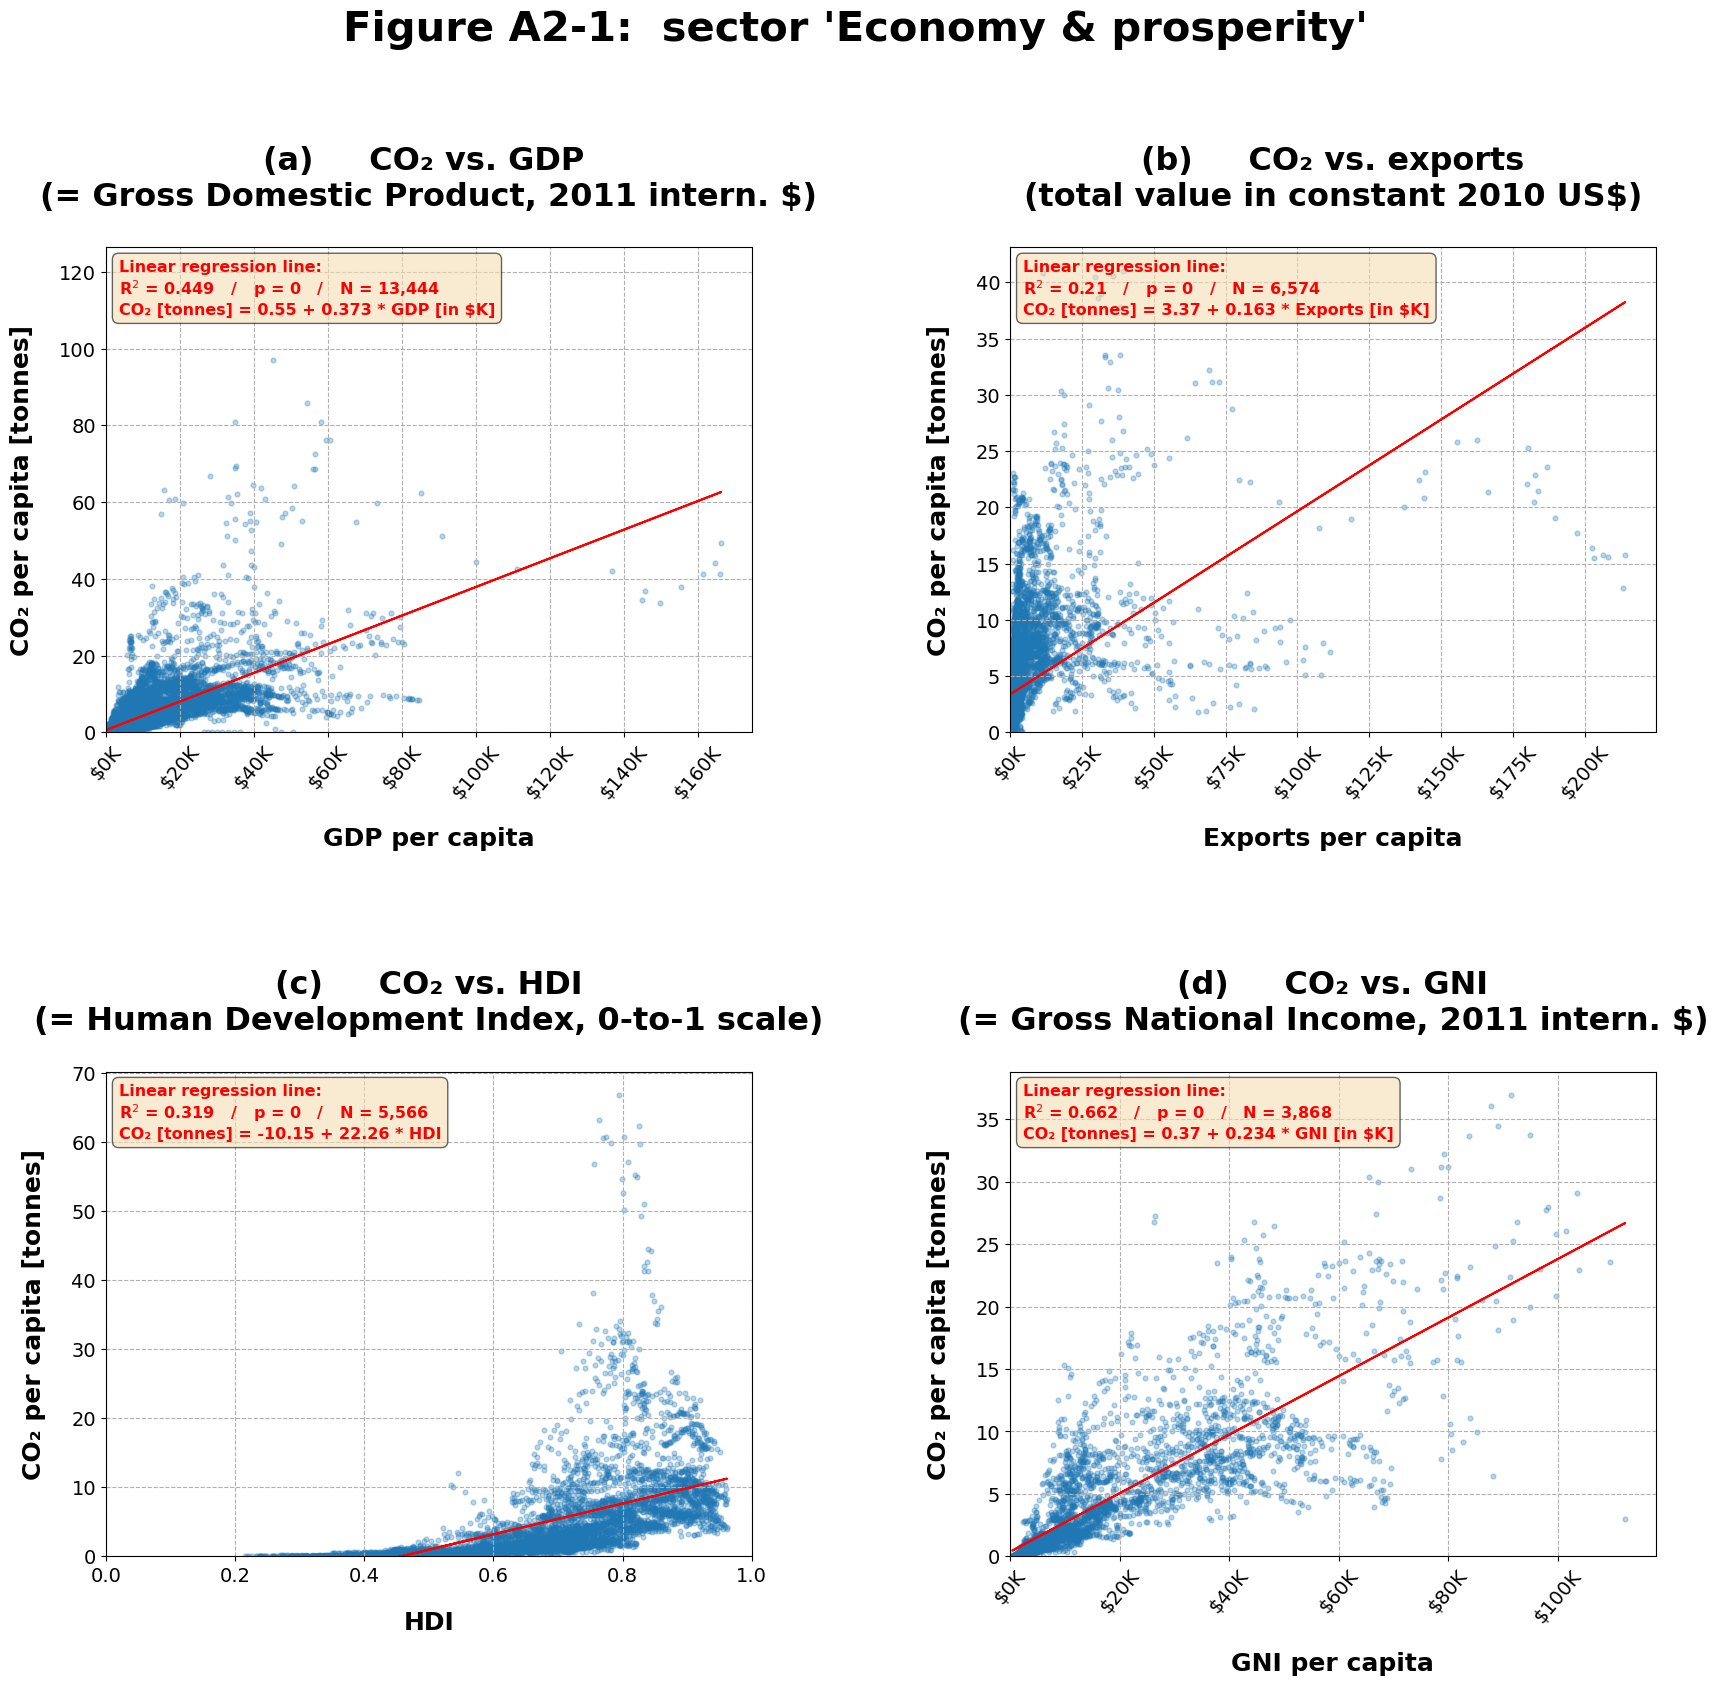

In [49]:
# USING HELPER FUNCTIONS TO PLOT RESULTS
# 
# Now using all the helper functions above to plot 
# 'co2_per_capita' (on the y-axis) against every relevant 
# variable in 'df_final' (on the x-axis).
# 
# Variables have been grouped into 5 overarching sectors,
# And we'll build a figure for each sector, with
# one subplot per variable.
# 
# Every plotted data point represents the (variable, CO2) 
# combination for a single measurement year in a single
# country.
# 
# Please keep in mind that the nr. of data points is different 
# for each subplot, due to the fact that each variable
# had data missing for certain countries and/or years.
# 
# --------------------------------------------------------
# 
# Sector Economy & Prosperity:

buildfigure(df_final, df_plots, 1,
            save_fig=False,
            fig_path='Image_files/',
            fig_name='Winc_Module_7_Assignment__Fig_A2_1.png'
           )


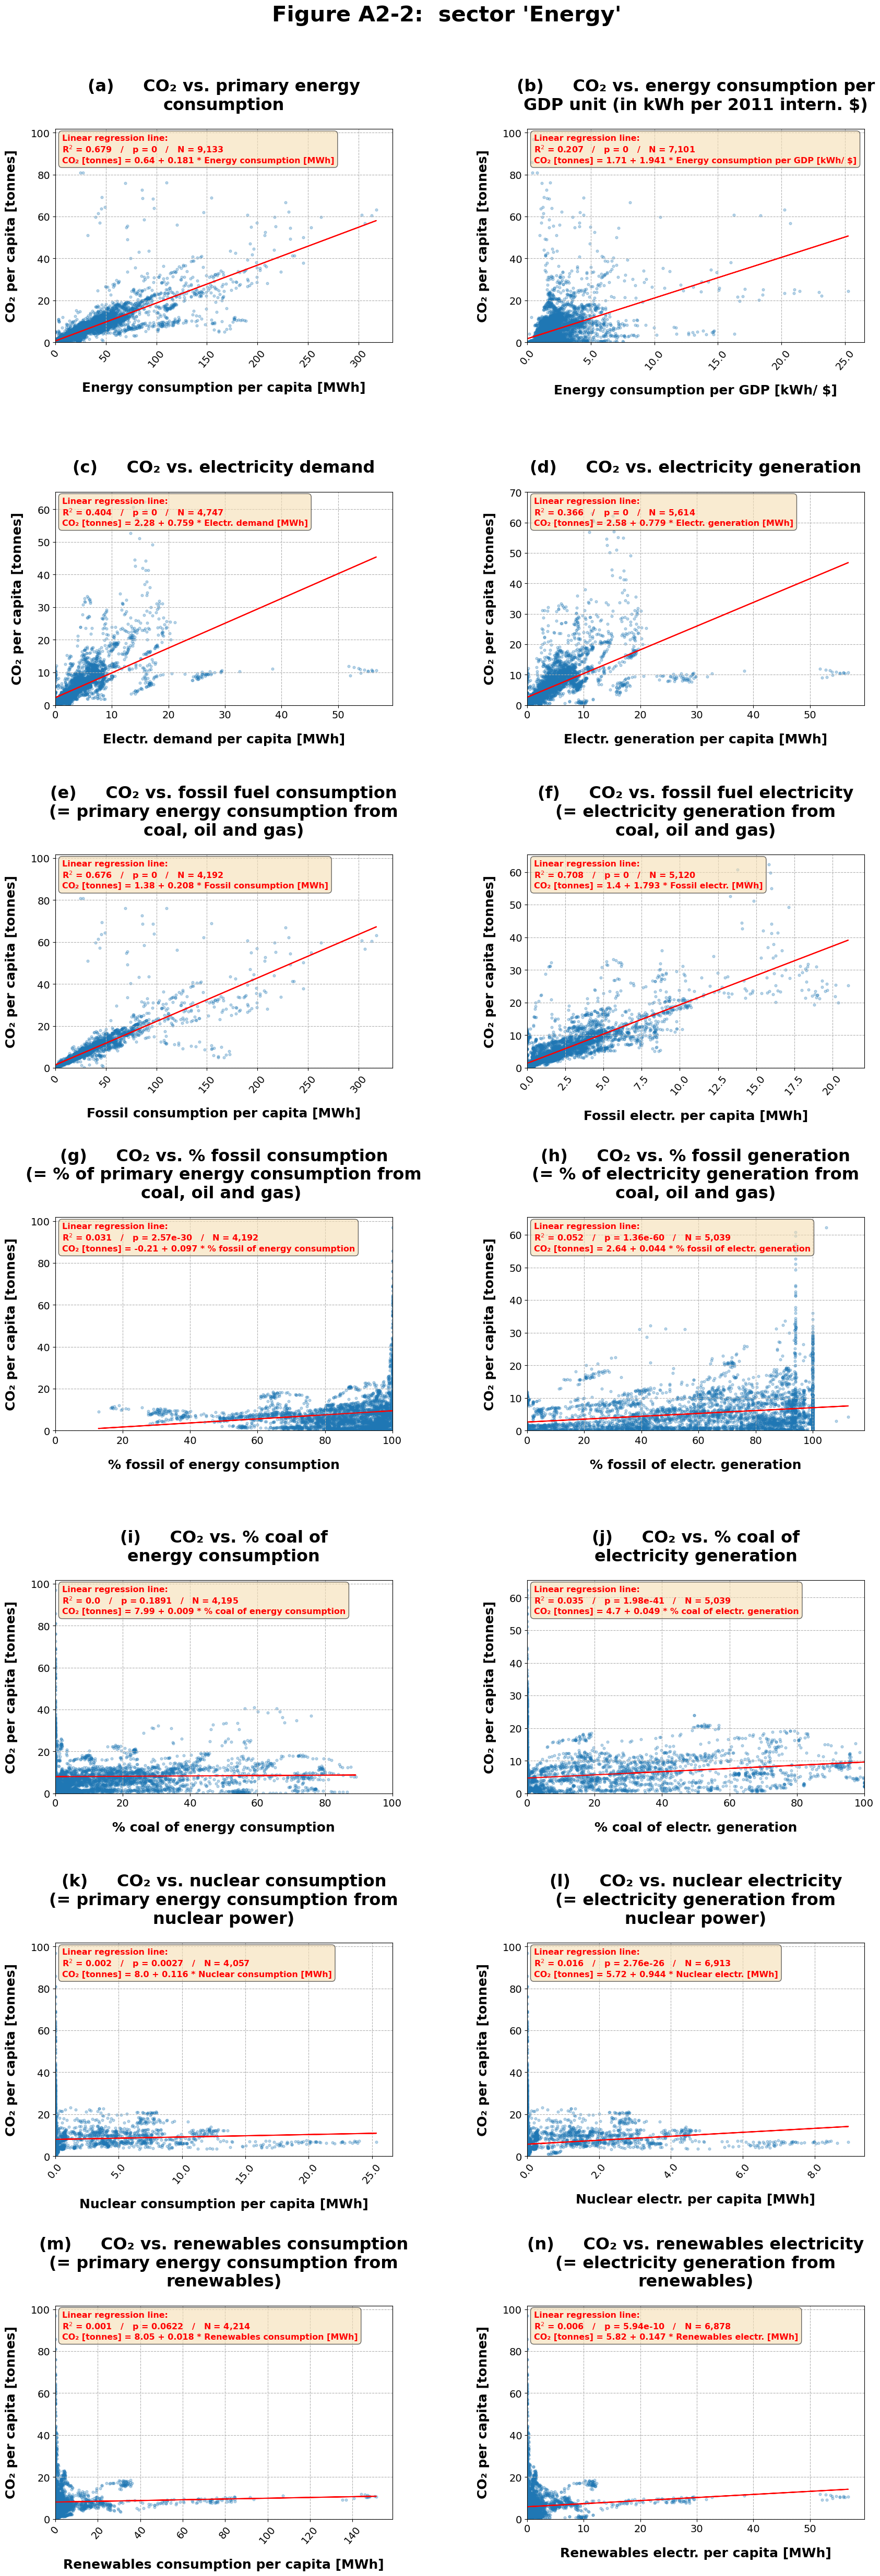

In [50]:
# Sector Energy:

buildfigure(df_final, df_plots, 2,
            save_fig=False,
            fig_path='Image_files/',
            fig_name='Winc_Module_7_Assignment__Fig_A2_2.png'
           )


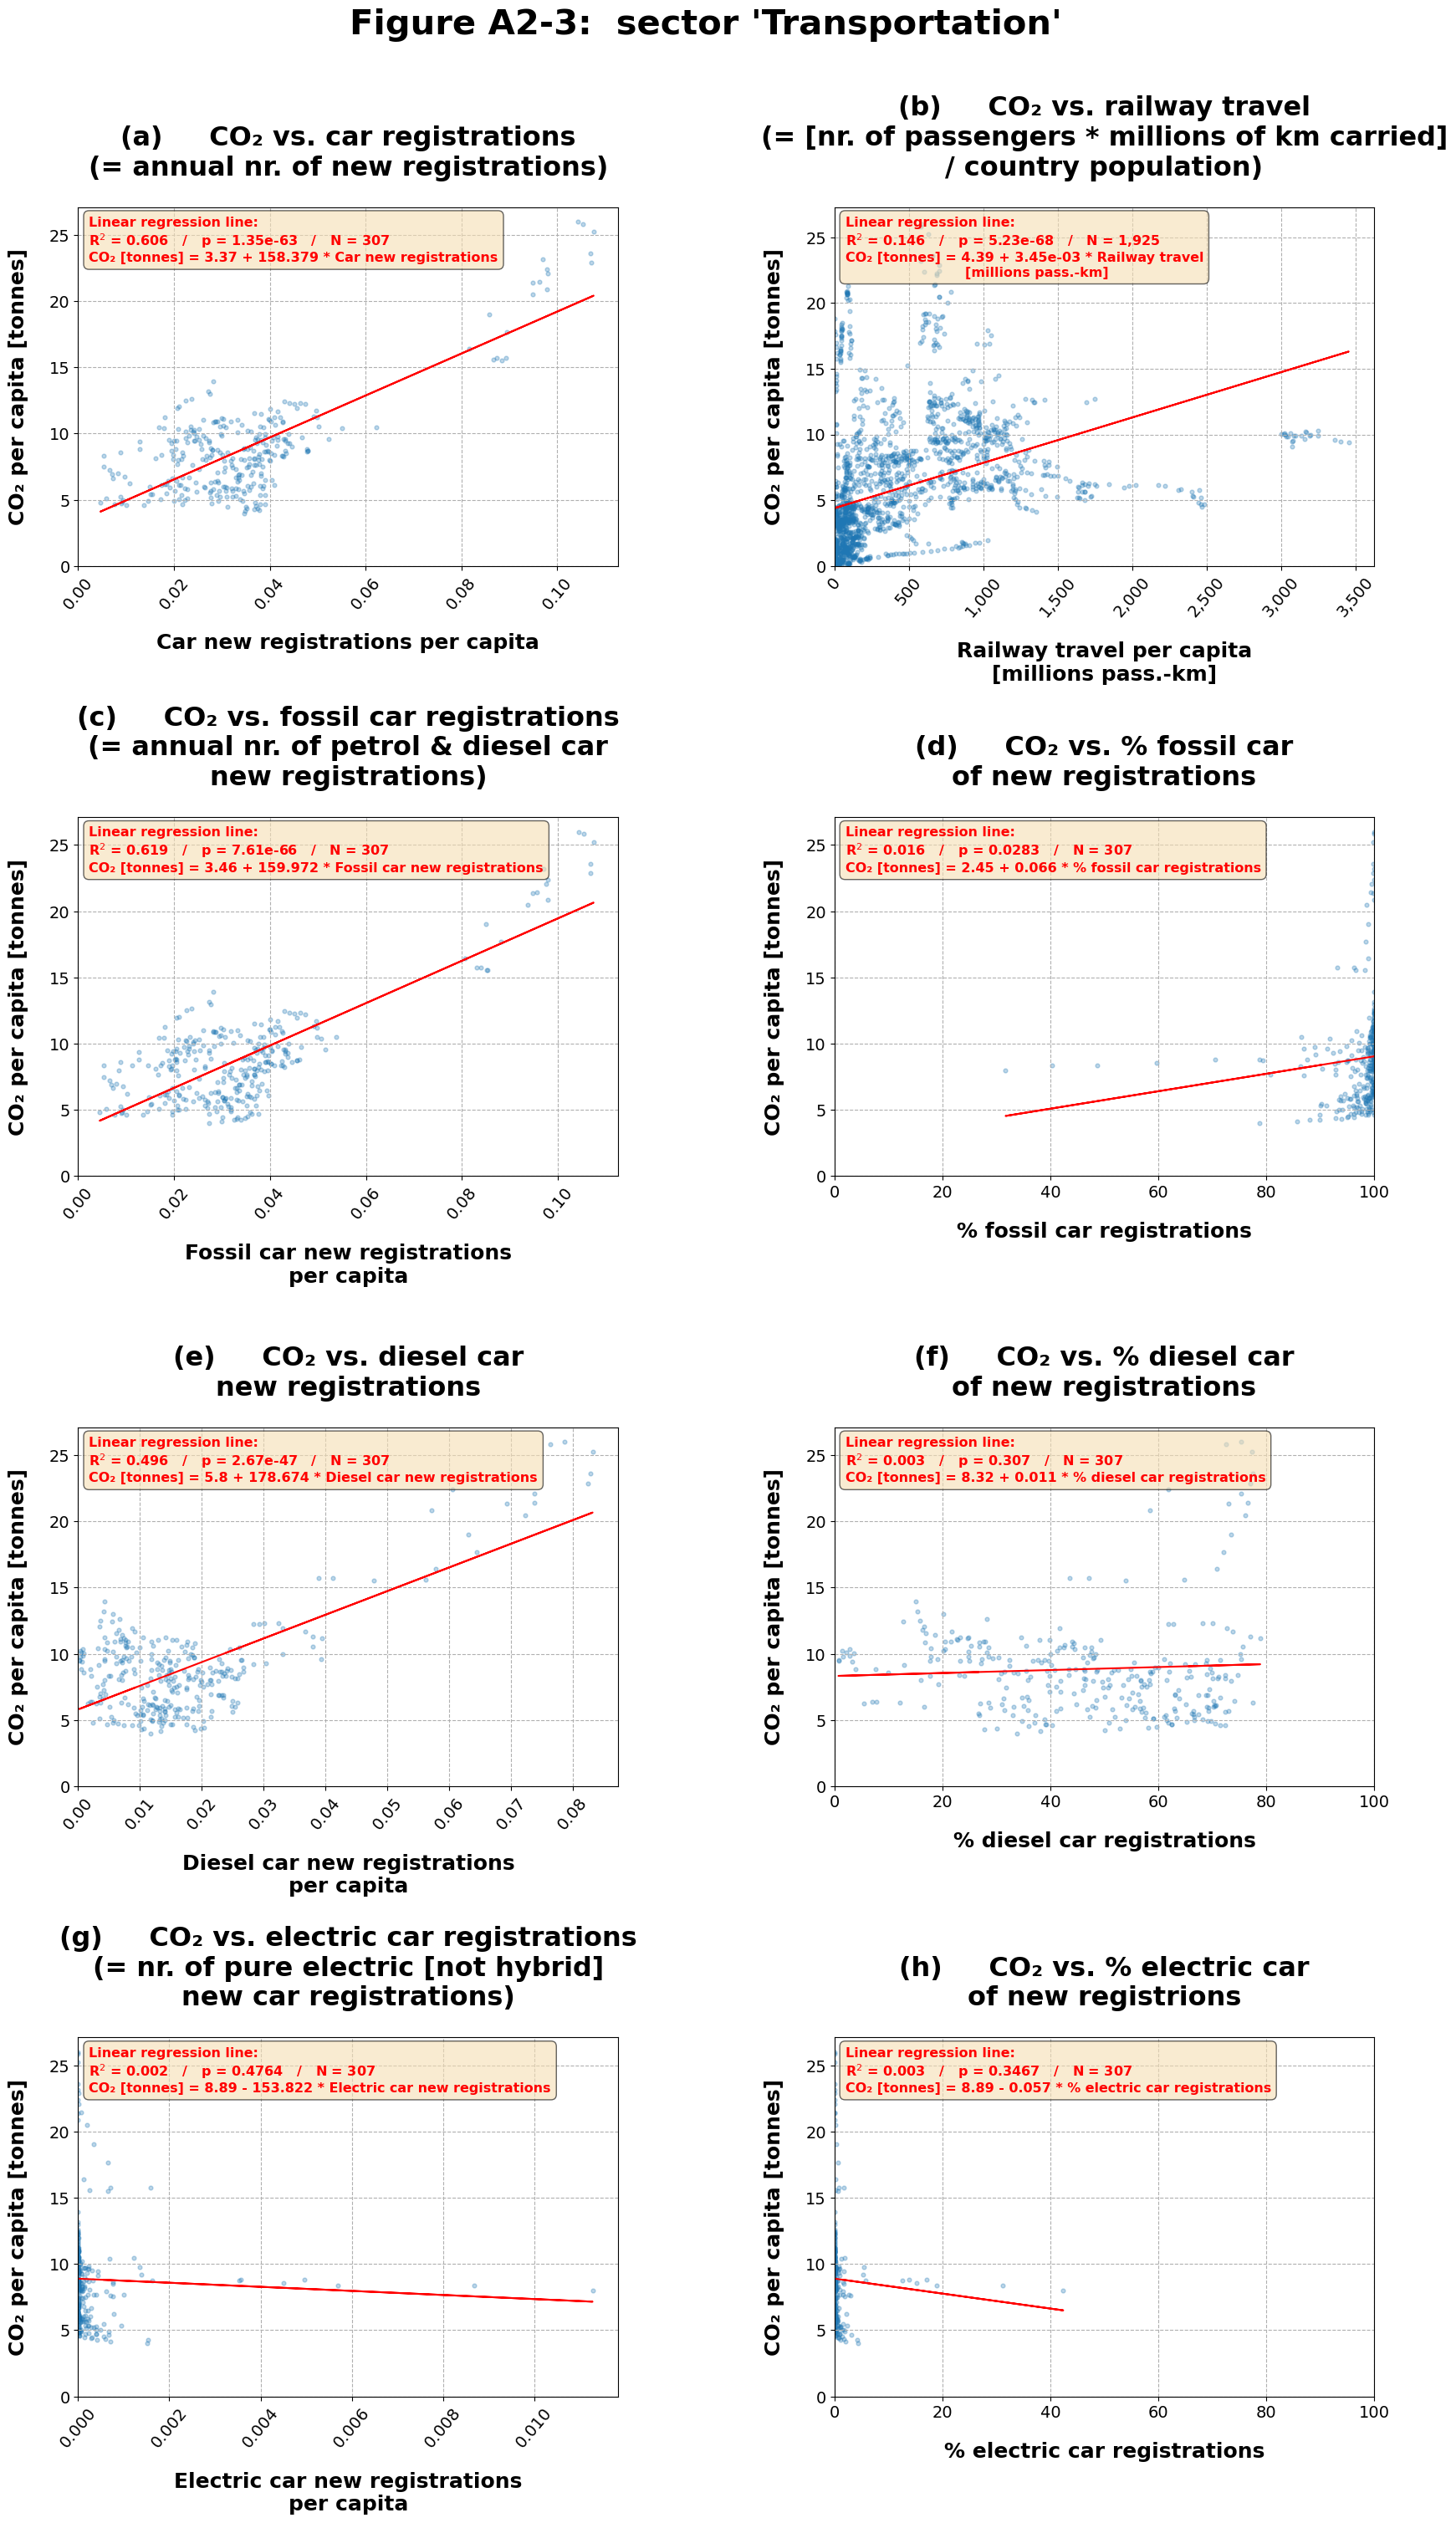

In [51]:
# Sector Transportation:

buildfigure(df_final, df_plots, 3,
            save_fig=False,
            fig_path='Image_files/',
            fig_name='Winc_Module_7_Assignment__Fig_A2_3.png'
           )


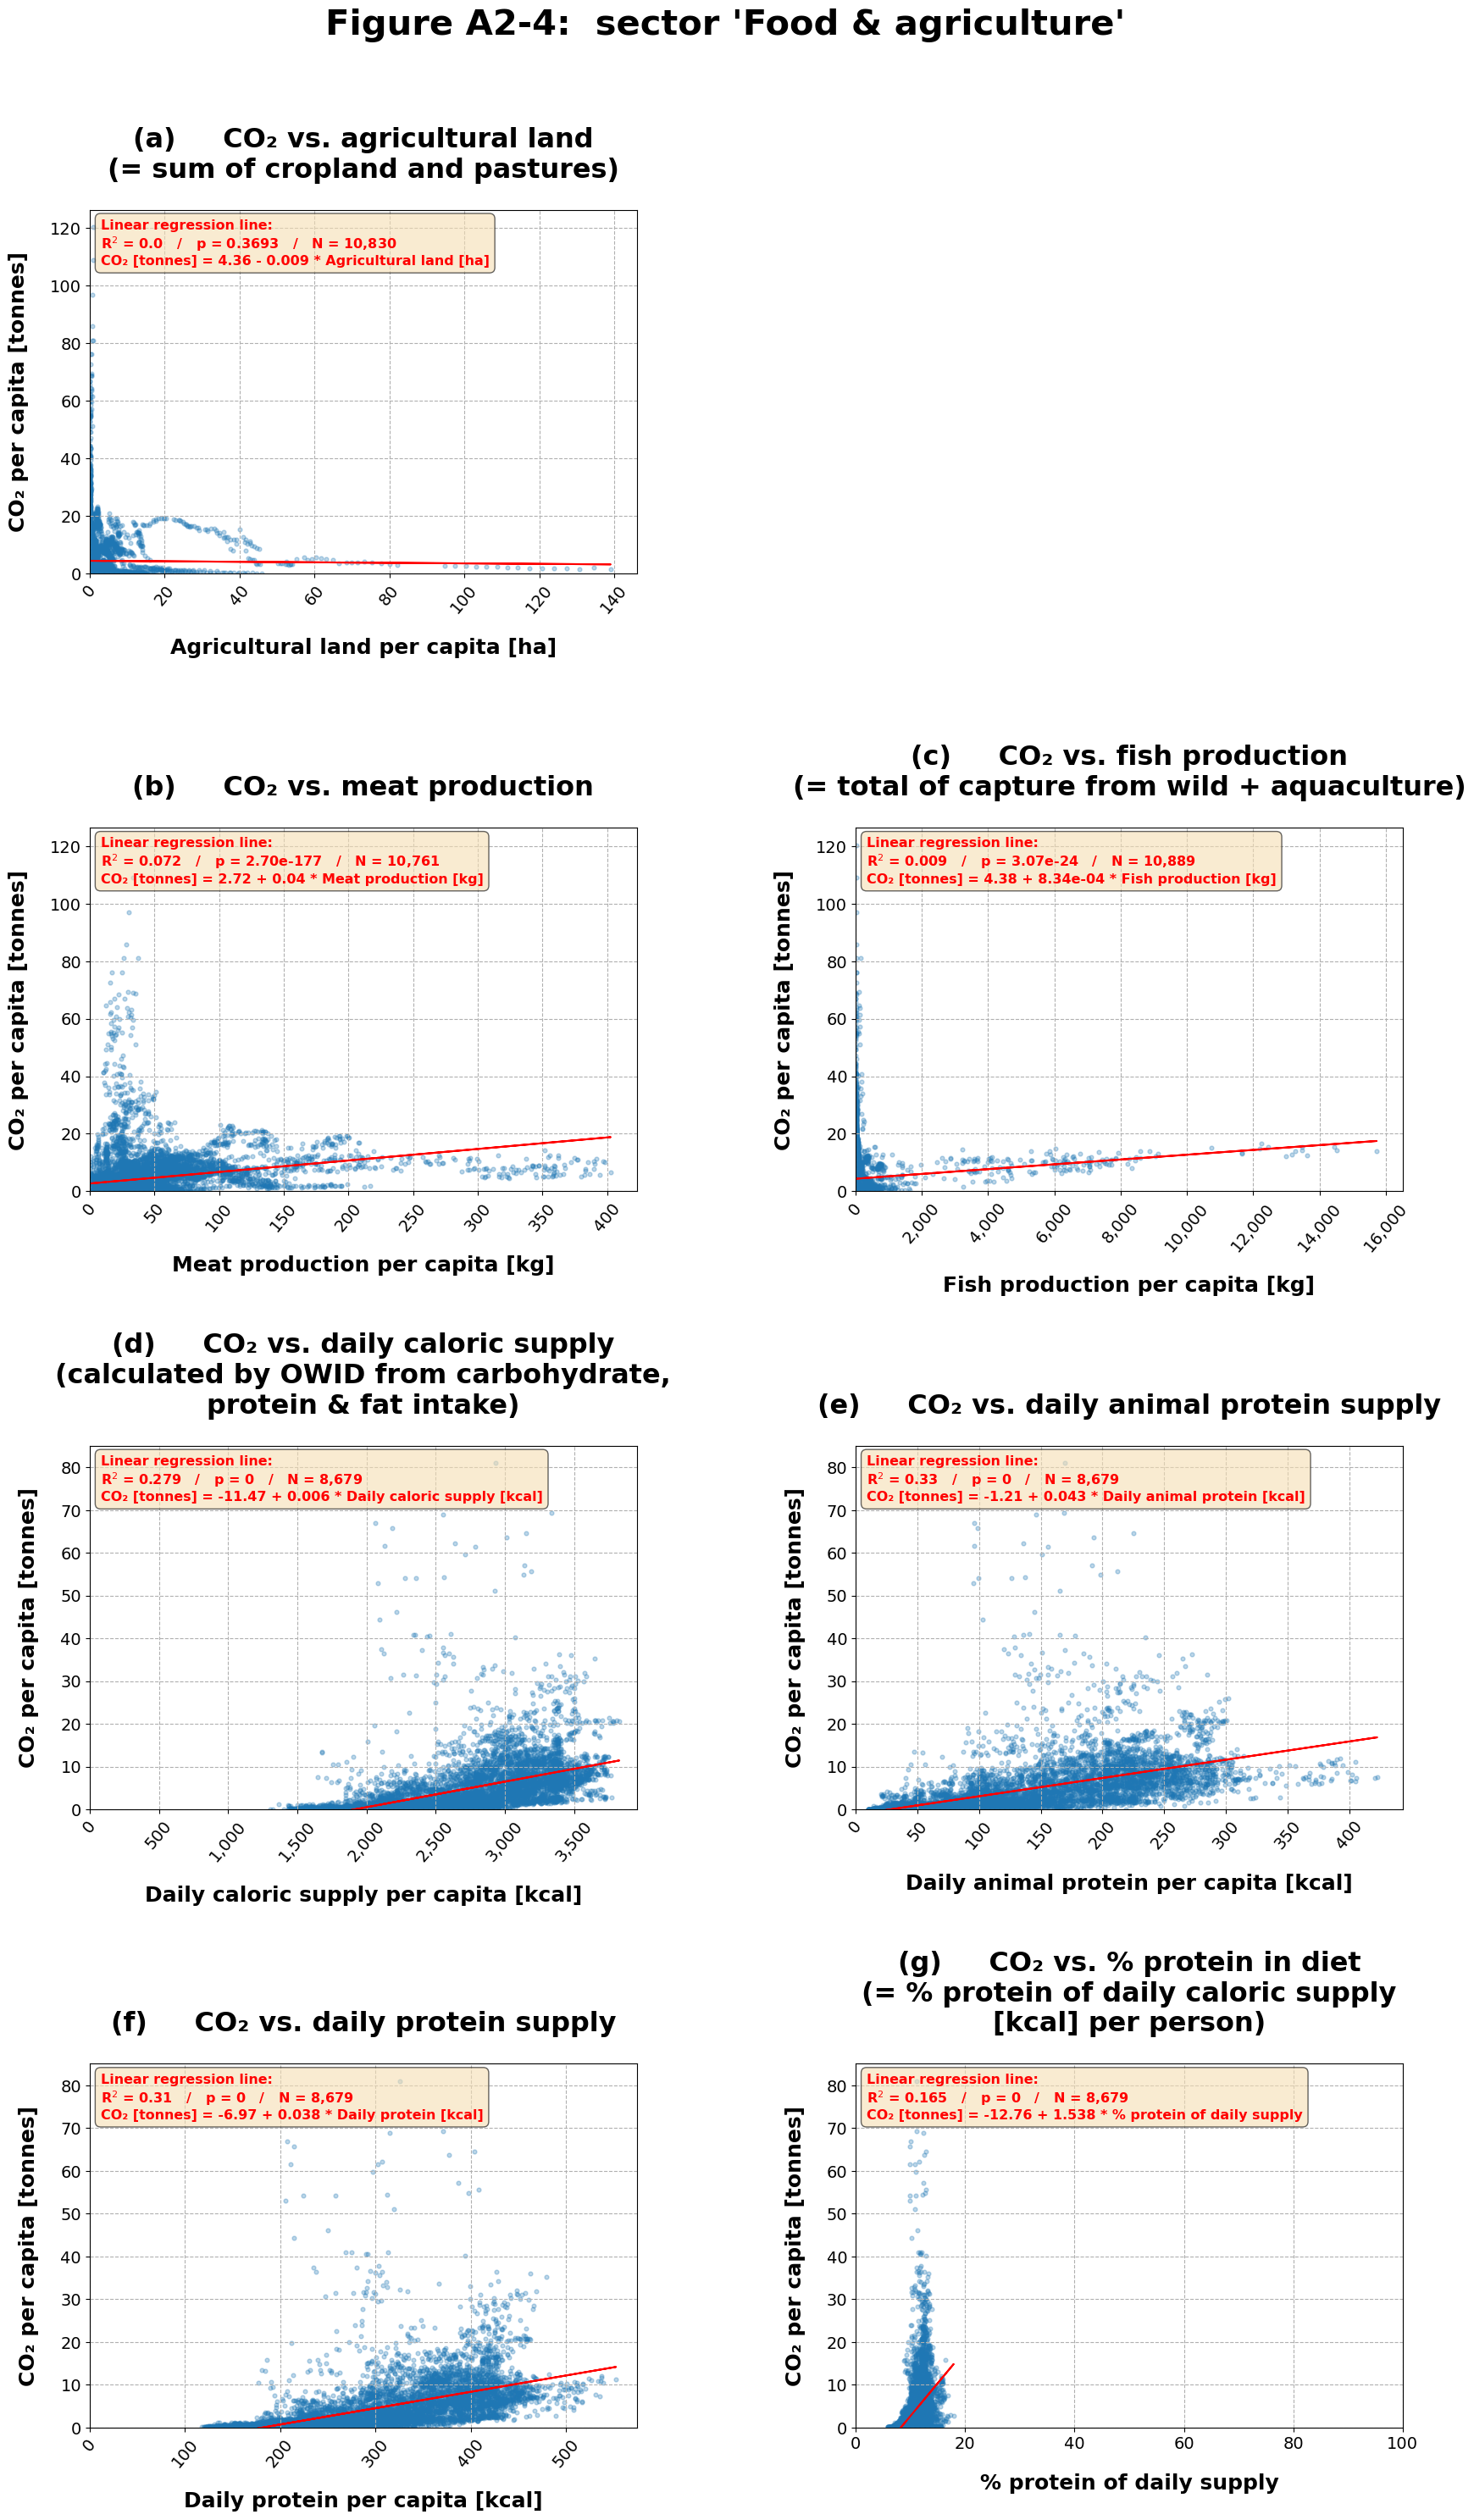

In [52]:
# Sector Food & Agriculture:

buildfigure(df_final, df_plots, 4,
            save_fig=False,
            fig_path='Image_files/',
            fig_name='Winc_Module_7_Assignment__Fig_A2_4.png'
           )


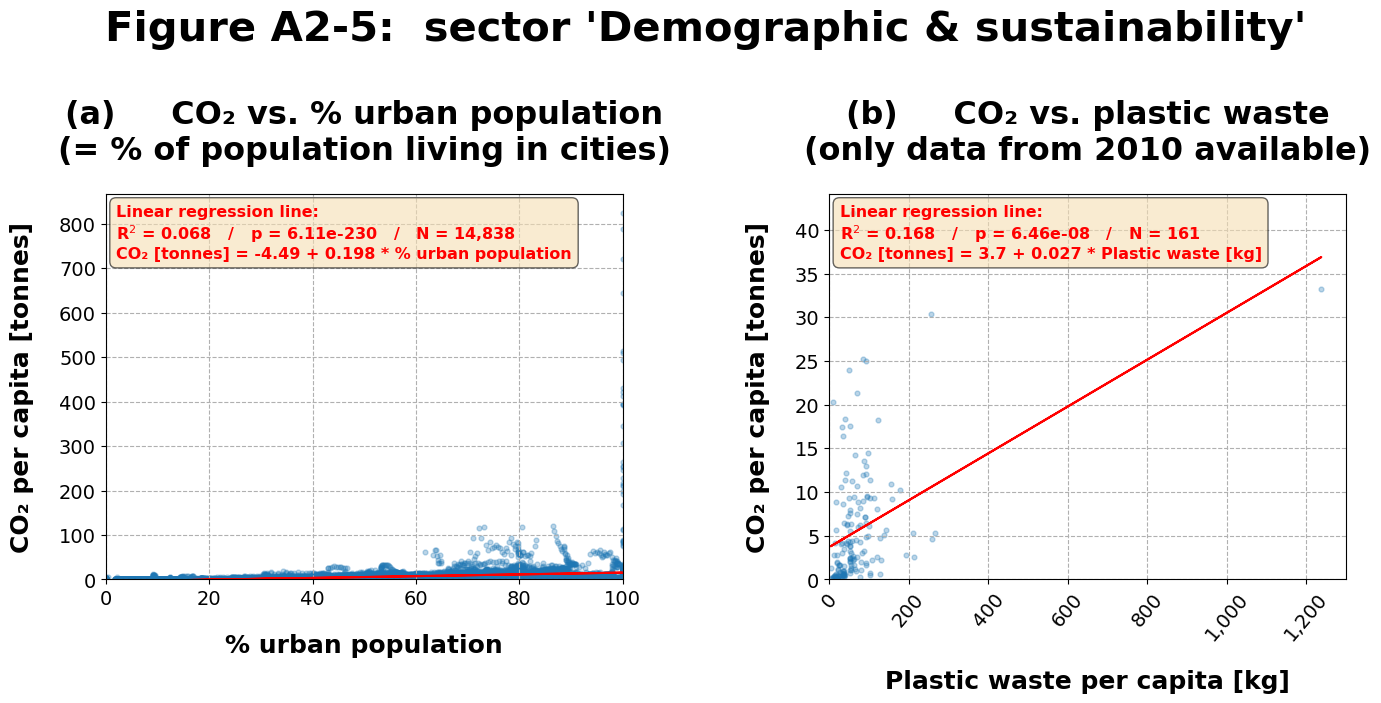

In [53]:
# Sector Demographic & Sustainability
# (a bit of an "Other" category):

buildfigure(df_final, df_plots, 5,
            save_fig=False,
            fig_path='Image_files/',
            fig_name='Winc_Module_7_Assignment__Fig_A2_5.png'
           )


Plotted data from period: 1985-2021
...and from 207 countries


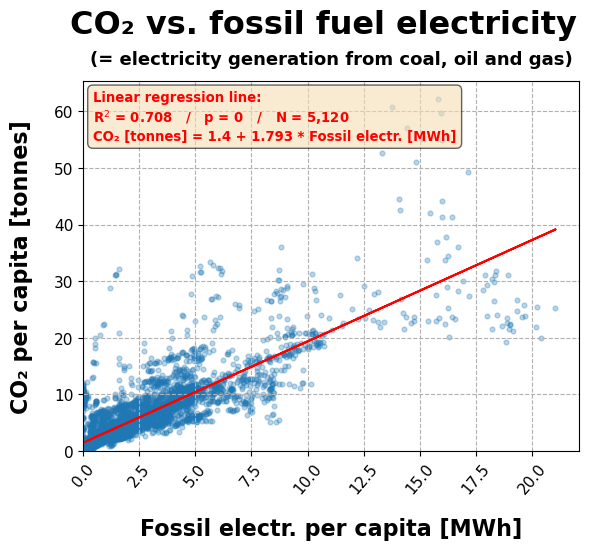

In [54]:
# SAVING PNG IMAGE OF FIGURE 1
# 
# Create single plot of fossil fuel electricity as x-variable,
# (or you can do this any other desired x-variable)
# using the single_plot() helper function:

plot_fossil_fuel_electr = single_plot(
    'fossil_elec_gener_MWh_per_capita',
#     suptitle='',
    subplot_title = '(= electricity generation from coal, oil and gas)',
    save_plot=False,
    fig_name='Winc_Module_7_Assignment__Fig_1.png'
    )



In [55]:
# SAVING PNG IMAGES OF EACH SUBPLOT
# 
# (I.e., all subplots from Figures A2-1 through A2-5 plotted above,
# for use in the Appendix 2).
# 
# First show itables of all variables again, including
# their variable names:


# show_with_itables(df_plots)
display(df_plots)


xlabel  \
x_name                                                                              
gdp_per_capita                                                     GDP per capita   
exports_dlr_per_capita                                         Exports per capita   
HDI                                                                           HDI   
GNI_per_capita                                                     GNI per capita   
prim_energy_consum_MWh_per_capita             Energy consumption per capita [MWh]   
energy_per_gdp                                Energy consumption per GDP [kWh/ $]   
elec_demand_MWh_per_capita                        Electr. demand per capita [MWh]   
elec_gener_MWh_per_capita                     Electr. generation per capita [MWh]   
fossil_consum_MWh_per_capita                  Fossil consumption per capita [MWh]   
fossil_elec_gener_MWh_per_capita                  Fossil electr. per capita [MWh]   
fossil_share_energy                                % fossil of energy consumption   
fossil_share_elec                                  % fossil of electr. generation   
coal_share_energy                                    % coal of energy consumption   
coal_share_elec                                      % coal of electr. generation   
nucl_consum_MWh_per_capita                   Nuclear consumption per capita [MWh]   
nucl_elec_gener_MWh_per_capita                   Nuclear electr. per capita [MWh]   
renew_consum_MWh_per_capita               Renewables consumption per capita [MWh]   
renew_elec_gener_MWh_per_capita               Renewables electr. per capita [MWh]   
total_nr_cars_per_capita                         Car new registrations per capita   
rail_millions_km_per_capita        Railway travel per capita\n[millions pass.-km]   
nr_fossil_cars_per_capita                Fossil car new registrations\nper capita   
perc_fossil_cars                                       % fossil car registrations   
nr_diesel_cars_per_capita                Diesel car new registrations\nper capita   
perc_diesel_cars                                       % diesel car registrations   
nr_electr_cars_per_capita              Electric car new registrations\nper capita   
perc_electric_cars                                   % electric car registrations   
agricult_ha_per_capita                          Agricultural land per capita [ha]   
meat_prod_kg_per_capita                           Meat production per capita [kg]   
fish_prod_kg_per_capita                           Fish production per capita [kg]   
total_kcal_per_capita                      Daily caloric supply per capita [kcal]   
kcal_animal_prot_per_capita                Daily animal protein per capita [kcal]   
kcal_protein_per_capita                           Daily protein per capita [kcal]   
perc_kcal_protein                                       % protein of daily supply   
urban_perc_pop                                                 % urban population   
plastic_waste_kg_per_capita                         Plastic waste per capita [kg]   

                                   x_currency          y_name  \
x_name                                                          
gdp_per_capita                           True  co2_per_capita   
exports_dlr_per_capita                   True  co2_per_capita   
HDI                                     False  co2_per_capita   
GNI_per_capita                           True  co2_per_capita   
prim_energy_consum_MWh_per_capita       False  co2_per_capita   
energy_per_gdp                          False  co2_per_capita   
elec_demand_MWh_per_capita              False  co2_per_capita   
elec_gener_MWh_per_capita               False  co2_per_capita   
fossil_consum_MWh_per_capita            False  co2_per_capita   
fossil_elec_gener_MWh_per_capita        False  co2_per_capita   
fossil_share_energy                     False  co2_per_capita   
fossil_share_elec                       False  co2_per_capita   
coal_share_energy  

Plotted data from period: 1990-2020
...and from 191 countries


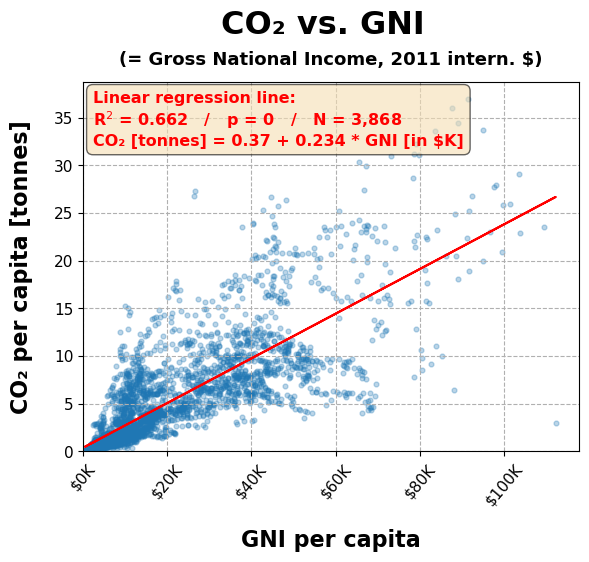

In [56]:
# Creating single PNG image file of each subplot, using the
# variable names from the itables above, saving them one
# at a time by using the single_plot() helper function.
# 
# Also copy/paste the correct subplot sub-title (part between parentheses)
# from the column above, or leave empty '' if none:

plot_fossil_fuel_electr = single_plot(
    'GNI_per_capita',
#     suptitle='',
    subplot_title = '(= Gross National Income, 2011 intern. $)',
    x_currency=True,
    save_plot=False,
    fig_name='Winc_Module_7_Assignment__Fig_A2_1d.png'
    )



In [57]:
# CREATING DF OF ALL LINEAR REGRESSION STATS
# 
# -----------------------------------------------
# NOTE: while it would be computationally cheaper
# to already collect the regression stats during
# creation of the scatter plots above (i.e. within 
# the used subplot and figure functions), the approach chosen here
# is to redo the regressions below for each x-variable 
# and then make one DF out of it. This makes the code cleaner
# and less complicated.
# ------------------------------------------------
# 
# First create copy of 'df_plots' with less columns,
# as a placeholder for the cross-correlation results
# for each plotted x-variable:
df_regr_stats_all = df_plots.copy()

# # Make column with legend labels for bar chart plot
# # if you also want to include Figure nrs. in the legend.
# # (commented out later, as it makes the legend a bit messy):
# df_regr_stats_all['legend'] = \
#                 df_regr_stats_all['sector'] + ' (Fig. ' + df_regr_stats_all['fig_nr'] + ')'

# Merge 2 columns into 1:
df_regr_stats_all['plot_nr'] = df_regr_stats_all['fig_nr'] + df_regr_stats_all['subpl_letter']

# Remove unneeded columns:
df_regr_stats_all.drop(
    columns=['x_currency', 'y_name', 'ylabel', 'subplot_title', 'fig_nr', 'subpl_letter'],
    inplace=True
)

# Turn 'df_plots' into dict:
all_title_dicts = df_plots.to_dict(orient='index')

# Create list of all x-variables:
x_vars_list = list(df_regr_stats_all.index)

i = 0
for x_name in x_vars_list:
    
    i = i + 1
    
    # Redo the regression for each x-variable in the list,
    # same code as in the earlier buildfigure() function:
    titles_dict = all_title_dicts[x_name]
    y_name = titles_dict['y_name']

    df_xy = remove_xypairs_w_nulls(df_final, x_name, y_name, other_cols)

    x = df_xy[x_name]
    y = df_xy[y_name]
        
    df_regression_stats, line_values = linear_regression(x, y, titles_dict)
    
    # In the single-row DF with the regression stats for the current
    # x-variable, make 'x_name' the index (needed for the subsequent
    # .join() and .update() operations, as join key):
    df_regression_stats.set_index(pd.Index([x_name]), inplace=True)
    
    # For each plotted variable, add descriptive stats to the DF
    # re. the year range and nr. of countries from which data
    # were drawn:
    df_regression_stats['year_first'] = df_xy['year'].min()
    df_regression_stats['year_last'] = df_xy['year'].max()
    df_regression_stats['nr_countries'] = len(df_xy['country'].unique())
        
    # Only for the 1st variable, do a .join() operation;
    # this will add all the extra columns of 'df_regression_stats'
    # to 'df_regr_stats_all', but only with actual values for that
    # x-variable (1 row) and NaN values for all the other rows...:
    if i == 1:
        df_regr_stats_all = df_regr_stats_all.join(df_regression_stats)
            
    # ...and for all subsequent variables, do an .update() operation;
    # this is to prevent duplication of the columns of 'df_regression_stats'
    # in the final DF over and over again, i.e. with each iteration of the FOR loop:
    else:
        df_regr_stats_all.update(df_regression_stats)


# Turn 4 columns with integer values into int64 again (somehow this
# was changed to float in the .join() operation)...
df_regr_stats_all['N'] = df_regr_stats_all['N'].astype('int64')
df_regr_stats_all['year_first'] = df_regr_stats_all['year_first'].astype('int64')
df_regr_stats_all['year_last'] = df_regr_stats_all['year_last'].astype('int64')
df_regr_stats_all['nr_countries'] = df_regr_stats_all['nr_countries'].astype('int64')

# Add column with total nr. of years for the plotted dataset
# of each variable:
df_regr_stats_all['nr_years'] = 1 + df_regr_stats_all[
                                'year_last'] - df_regr_stats_all['year_first']

# Drop some unneeded columns:
df_regr_stats_all.drop(columns=['R_str', 'equation_str'], inplace=True)

# Check result:
# display(df_regr_stats_all)


In [58]:
# PRINTING DESCRIPTIVE STATS
# 
# Print some descriptive stats for the plotted data overall
# (i.e., for all 35 variables), re. the sample sizes,
# year ranges and nr. of countries of each plotted dataset:

print('\n*****************************************************')
print('OVERALL DESCRIPTIVE STATS, ALL 35 PLOTTED VARIABLES:')
print('*****************************************************\n')
print(f" * The median sample size N was:\t\t{df_regr_stats_all['N'].median():,.0f}")
print(f"     (varying from N = {df_regr_stats_all['N'].min():,.0f} to " \
      f"{df_regr_stats_all['N'].max():,.0f})\n")
print(f" * The median nr. of plotted countries was:\t{df_regr_stats_all['nr_countries'].median():,.0f}")
print(f"     (varying from {df_regr_stats_all['nr_countries'].min():,.0f} to " \
      f"{df_regr_stats_all['nr_countries'].max():,.0f} countries)\n")
print(f" * The median nr. of plotted years was:\t\t{df_regr_stats_all['nr_years'].median():,.0f}")
print(f"     (varying from {df_regr_stats_all['nr_years'].min():,.0f} to " \
      f"{df_regr_stats_all['nr_years'].max():,.0f} years)\n")
print(f"\t- The earliest plotted year across all variables was:" \
      f"\t{df_regr_stats_all['year_first'].min():.0f}")
print(f"\t- The latest plotted year across all variables was:" \
      f"\t{df_regr_stats_all['year_last'].max():.0f}\n")
print(f"\t- The median start year of plotted data was:" \
      f"\t{df_regr_stats_all['year_first'].median():.0f}"\
      f"\t(range: {df_regr_stats_all['year_first'].min():.0f}-" \
      f"{df_regr_stats_all['year_first'].max():.0f})")
print(f"\t- The median final year of plotted data was:" \
      f"\t{df_regr_stats_all['year_last'].median():.0f}" \
      f"\t(range: {df_regr_stats_all['year_last'].min():.0f}-" \
      f"{df_regr_stats_all['year_last'].max():.0f})\n")



*****************************************************
OVERALL DESCRIPTIVE STATS, ALL 35 PLOTTED VARIABLES:
*****************************************************

 * The median sample size N was:		5,039
     (varying from N = 161 to 14,838)

 * The median nr. of plotted countries was:	173
     (varying from 19 to 217 countries)

 * The median nr. of plotted years was:		53
     (varying from 1 to 222 years)

	- The earliest plotted year across all variables was:	1800
	- The latest plotted year across all variables was:	2021

	- The median start year of plotted data was:	1965	(range: 1800-2010)
	- The median final year of plotted data was:	2020	(range: 2010-2021)



In [59]:
# Sort by R^2 values, with the variables
# with highest R^2 on top:
df_regr_stats_all = df_regr_stats_all.sort_values(
    by='R^2',
    ascending=False
)

# Filter by Pearson cross-correlation R > 0.5,
# which gives the top 14 predictors of
# CO2 emissions.
# 
# Note: use .copy() for the filter when creating the new DF,
# to prevent SettingWithCopy warnings later on!
df_top_predictors = df_regr_stats_all.copy().loc[
    df_regr_stats_all['R']>0.5
]

# Check result:
# display(df_top_predictors)


In [60]:
# ADD COLUMN WITH COLORS FOR BAR CHART

# Define tuple of colors to be used for the
# bar chart plot: one color per sector.
# 
# We only need 5 colors at most (as I've only
# defined 5 sectors for this assignment), but
# made longer here for future use/ to generalize:
colors=(
    '#d62728', # red
    '#1f77b4', # blue
    '#ff7f0e', # orange
    '#2ca02c', # green
    '#9467bd', # purple
    '#8c564b', # brown
    '#bcbd22', # light green
    '#17becf', # light blue
    '#7f7f7f', # grey
    '#e377c2', # pink
)

# Unique sectors in the DF:
sectors = df_top_predictors['sector'].unique()

# Add 'color' column, with 1 color for each sector:
for sector, color in zip(sectors, colors):
    
    df_top_predictors.loc[
        df_top_predictors['sector']==sector,
        'color'
    ] = color

# Insert the new column in that column index:
df_top_predictors.insert(2, 'color', df_top_predictors.pop('color'))

# Check result:
# df_top_predictors
    
    

In [61]:
# IMPROVE XLABEL READABILITY FOR BAR CHART

# For use in the horizontal bar chart with overall R^2 stats,
# make the xlabels (= x-axis labels used in the scatter plots)
# more self-explanatory, since the earlier subplot titles
# that provided additional context will be missing 
# in the bar chart.

# Pre-cleaning: first remove all 'per capita' strings
# and the spaces in 'N_str':
for index, label, N_str in zip(
    df_top_predictors.index,
    df_top_predictors['xlabel'],
    df_top_predictors['N_str']
):
           
    if label.find(' per capita') != -1:
        label = label.replace(' per capita', '')
    elif label.find('\nper capita') != -1:
        label = label.replace('\nper capita', '')
    
    N_str_new = N_str.replace('N = ', 'N=')
    
    # Reassign the new label and N_str:
    df_top_predictors.loc[index, 'xlabel'] = label
    df_top_predictors.loc[index, 'N_str'] = N_str_new

# Show cleaned xlabels of the top 15 predictors:
xlabels = list(df_top_predictors['xlabel'])
display(xlabels)

# Check new N_str as well:
# N_strs = list(df_top_predictors['N_str'])
# display(N_strs)


['Fossil electr. [MWh]',
 'Energy consumption [MWh]',
 'Fossil consumption [MWh]',
 'GNI',
 'Fossil car new registrations',
 'Car new registrations',
 'Diesel car new registrations',
 'GDP',
 'Electr. demand [MWh]',
 'Electr. generation [MWh]',
 'Daily animal protein [kcal]',
 'HDI',
 'Daily protein [kcal]',
 'Daily caloric supply [kcal]']

In [62]:
# Based on above list, define new list with more
# self-explanatory xlabels:

xlabels_long = [
    'Electricity generation from fossil fuels [MWh]',
    'Primary energy consumption - overall [MWh]',
    'Primary energy consumption from fossil fuels [MWh]',
    'GNI = Gross National Income [2011 intern. $]',
    'Petrol & diesel cars - annual nr. new registrations',
    'All cars - annual nr. new registrations',
    'Diesel cars - annual nr. new registrations',
    'GDP = Gross Domestic Product [2011 intern. $]',
    'Electricity demand - overall [MWh]',
    'Electricity generation - overall [MWh]',
    'Daily animal protein supply [kcal]',
    'HDI = Human Development Index (0-to-1 scale)',
    'Daily protein supply [kcal]',
    'Daily total caloric supply [kcal]'
]

# Make new column from this list:
df_top_predictors.loc[:, 'xlabel_long'] = xlabels_long

# Remove the old column...
df_top_predictors.pop('xlabel')

# ...and insert the new column in that column index:
df_top_predictors.insert(0, 'xlabel_long', df_top_predictors.pop('xlabel_long'))

# Check result:
df_top_predictors



xlabel_long  \
x_name                                                                                 
fossil_elec_gener_MWh_per_capita      Electricity generation from fossil fuels [MWh]   
prim_energy_consum_MWh_per_capita         Primary energy consumption - overall [MWh]   
fossil_consum_MWh_per_capita       Primary energy consumption from fossil fuels [...   
GNI_per_capita                          GNI = Gross National Income [2011 intern. $]   
nr_fossil_cars_per_capita          Petrol & diesel cars - annual nr. new registra...   
total_nr_cars_per_capita                     All cars - annual nr. new registrations   
nr_diesel_cars_per_capita                 Diesel cars - annual nr. new registrations   
gdp_per_capita                         GDP = Gross Domestic Product [2011 intern. $]   
elec_demand_MWh_per_capita                        Electricity demand - overall [MWh]   
elec_gener_MWh_per_capita                     Electricity generation - overall [MWh]   
kcal_animal_prot_per_capita                       Daily animal protein supply [kcal]   
HDI                                     HDI = Human Development Index (0-to-1 scale)   
kcal_protein_per_capita                                  Daily protein supply [kcal]   
total_kcal_per_capita                              Daily total caloric supply [kcal]   

                                                 sector    color plot_nr  \
x_name                                                                     
fossil_elec_gener_MWh_per_capita                 Energy  #d62728      2f   
prim_energy_consum_MWh_per_capita                Energy  #d62728      2a   
fossil_consum_MWh_per_capita                     Energy  #d62728      2e   
GNI_per_capita                     Economy & prosperity  #1f77b4      1d   
nr_fossil_cars_per_capita                Transportation  #ff7f0e      3c   
total_nr_cars_per_capita                 Transportation  #ff7f0e      3a   
nr_diesel_cars_per_capita                Transportation  #ff7f0e      3e   
gdp_per_capita                     Economy & prosperity  #1f77b4      1a   
elec_demand_MWh_per_capita                       Energy  #d62728      2c   
elec_gener_MWh_per_capita                        Energy  #d62728      2d   
kcal_animal_prot_per_capita          Food & agriculture  #2ca02c      4e   
HDI                                Economy & prosperity  #1f77b4      1c   
kcal_protein_per_capita              Food & agriculture  #2ca02c      4f   
total_kcal_per_capita                Food & agriculture  #2ca02c      4d   

                                         R^2_str         p_str     N_str  \
x_name                                                                     
fossil_elec_gener_MWh_per_capita   R$^2$ = 0.708         p = 0   N=5,120   
prim_energy_consum_MWh_per_capita  R$^2$ = 0.679         p = 0   N=9,133   
fossil_consum_MWh_per_capita       R$^2$ = 0.676         p = 0   N=4,192   
GNI_per_capita                     R$^2$ = 0.662         p = 0   N=3,868   
nr_fossil_cars_per_capita          R$^2$ = 0.619  p = 7.61e-66     N=307   
total_nr_cars_per_capita           R$^2$ = 0.606  p = 1.35e-63     N=307   
nr_diesel_cars_per_capita          R$^2$ = 0.496  p = 2.67e-47     N=307   
gdp_per_capita                     R$^2$ = 0.449         p = 0  N=13,444   
elec_demand_MWh_per_capita         R$^2$ = 0.404         p = 0   N=4,747   
elec_gener_MWh_per_capita          R$^2$ = 0.366         p = 0   N=5,614   
kcal_animal_prot_per_capita         R$^2$ = 0.33         p = 0   N=8,679   
HDI                                R$^2$ = 0.319         p = 0   N=5,566   
kcal_protein_per_capita             R$^2$ = 0.31         p = 0   N=8,679   
total_kcal_per_capita              R$^2$ = 0.279         p = 0   N=8,679   

                                              R           R^2  \
x_name                                                          
fossil_elec_gener_MWh_per_capita   0.8415471637  0.7082016288   
prim_energy_consum_MWh_per_capita  

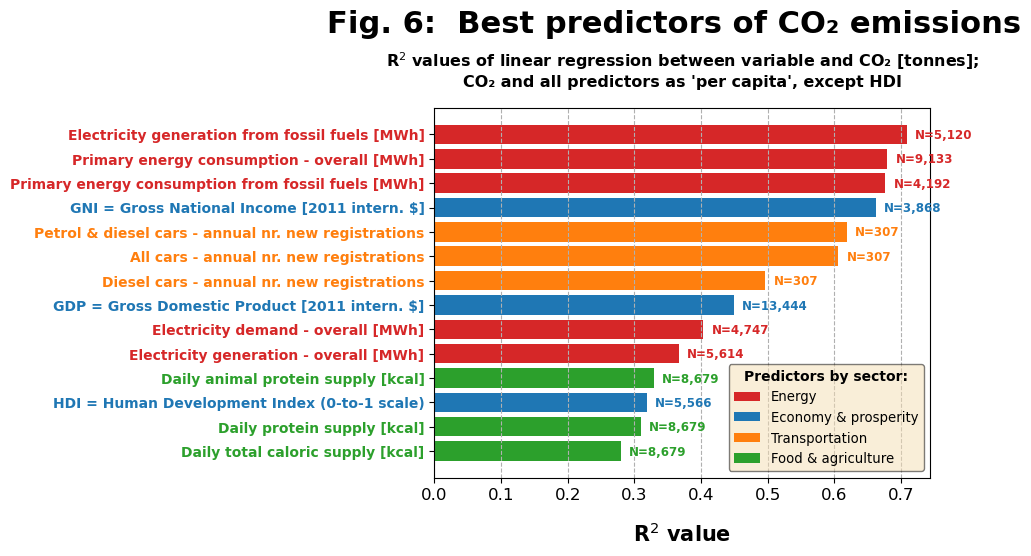

In [63]:
# MAKE BAR CHART OF THE BEST CO2 PREDICTORS, 
# ORDERED BY R^2 VALUES

# from matplotlib import patches
# from matplotlib.legend_handler import HandlerPatch

fig, ax = plt.subplots()

R_sq_values = df_top_predictors['R^2']
top_predictors = df_top_predictors['xlabel_long']

sample_sizes = df_top_predictors['N_str']
# labels = df_top_predictors['legend']
labels = df_top_predictors['sector']
colors = df_top_predictors['color']

ax.barh(
    top_predictors, 
    R_sq_values,
    label=labels,
    color=colors
)

# Bcs. labels are read from top-to-bottom:
ax.invert_yaxis()

# Add sample sizes (string 'N=...') to the right of each bar:
for x, y, N, color in zip(R_sq_values, top_predictors, sample_sizes, colors):

        bar_label = N      # this is a string already in the correct format 
        ax.annotate(bar_label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(6, -3), # distance from text to points (x,y)
                    color=color, # use same color as the plotted bar
                    fontsize=8.5, 
                    fontweight='bold',
                    ha='left') # horizontal alignment can be left, right or center


# Custom function to combine labels in the legend that have the
# same text labels (in this case: predictors in the same sector).
# 
# Modified from: https://andrewpwheeler.com/2022/09/16/legends-in-python/

def combo_legend(ax):
    
    # Get the handles & labels (both are lists) for the plot legend
    # (one handle-label pair for each plotted bar in this case):
    handler, labeler = ax.get_legend_handles_labels()
    
    hd = []
    
    # Make new list of UNIQUE labels (= sectors), in the same order of
    # appearance as in the original labeler list:
    labli = pd.Series(labeler).drop_duplicates().tolist()
    
    # For each unique label, get the corresponding (multiple)
    # handle(s), put them in a tuple and add it to the 'hd' list:
    for lab in labli:
        comb = [h for h,l in zip(handler,labeler) if l == lab]
        hd.append(tuple(comb))
        
    # Return hd = list of tuples of handles (1 tuple for each unique label)
    # and labli = list of unique labels 
    return hd, labli

        
# Setting the axis labels; the labelpad property sets the distance to the chart
ax.set_xlabel('R$^2$ value', weight='bold', fontsize=15, labelpad=14.5)


# Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around).
# 
# ***********************************
# NOTE: "Fig. ..." commented out when saving this chart as PNG image
# below, because within the written report for this Assigment,
# the numbering of Figures will be different.
# ***********************************
# 
# plt.suptitle('Best predictors of CO\u2082 emissions',
#              weight='bold', y=1.085, fontsize=22)
plt.suptitle('Fig. 6:  Best predictors of CO\u2082 emissions',
             weight='bold', y=1.085, fontsize=22)
plt.title('R$^2$ values of linear regression between variable and CO\u2082 [tonnes];' \
          '\nCO\u2082 and all predictors as \'per capita\', except HDI',
          weight='bold', fontsize=11.5, pad=15.5)

# Set size of the x- and y-tick strings:
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

# ...and give the y-tick strings (= predictor variables)
# the appropriate color of the sector it belongs to:
y = np.arange(len(top_predictors))
for i in y:
    color = colors[i]
    ax.get_yticklabels()[i].set_color(color)

plt.yticks(y, weight ='bold')

ax.grid(True, axis='x', linestyle='--')

# Get unique labels and their respective handle(s)
# for the legend:
hd, lab = combo_legend(ax)

ax.legend(hd, lab, 
          loc='lower right',
          fontsize=9.5,
          facecolor='wheat',
          framealpha=0.5,
          edgecolor='k',
          title='Predictors by sector:',
          title_fontproperties={'weight': 'bold'}
         )

# ----------------------------------------------------------
# # Save figure as PNG file.  Notes:
# # 
# #  1) Commented out, use only when needed;
# #  2) Please replace 'fig_path' to the folder where you'd
# #      like to save the PNG file.

# fig_path = "Image_files/"
# fig_name = "Winc_Module_7_Assignment__Fig_2.png"

# plt.savefig(
#     fig_path + fig_name,
#     dpi=500,
#     bbox_inches='tight'
# )
# ----------------------------------------------------------

plt.show()



In [64]:
# Check MultiIndex DF "df_cleaned_CO2_MultInd":

# show(
#     df_cleaned_CO2_MultInd,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_cleaned_CO2_MultInd)


Entity  population            gdp     co2  co2_growth_prct  \
Code Year                                                                    
AFG  1949  Afghanistan   7624058.0            NaN   0.015              NaN   
     1950  Afghanistan   7480464.0   9421400064.0   0.084          475.000   
     1951  Afghanistan   7571542.0   9692279808.0   0.092            8.696   
     1952  Afghanistan   7667534.0  10017325056.0   0.092            0.000   
     1953  Afghanistan   7764549.0  10630519808.0   0.106           16.000   
...                ...         ...            ...     ...              ...   
ZWE  2017     Zimbabwe  14751101.0  21947836416.0   9.596           -8.899   
     2018     Zimbabwe  15052191.0  22715353088.0  11.795           22.920   
     2019     Zimbabwe  15354606.0            NaN  11.115           -5.772   
     2020     Zimbabwe  15669663.0            NaN  10.608           -4.559   
     2021     Zimbabwe  15993525.0            NaN  11.296            6.488   

           co2_including_luc_per_capita  co2_per_capita  \
Code Year                                                 
AFG  1949                         1.054           0.002   
     1950                         1.148           0.011   
     1951                         1.207           0.012   
     1952                         1.297           0.012   
     1953                         1.406           0.014   
...                                 ...             ...   
ZWE  2017                         1.294           0.651   
     2018                         1.370           0.784   
     2019                         1.266           0.724   
     2020                         1.180           0.677   
     2021                         1.174           0.706   

           consumption_co2_per_capita  
Code Year                              
AFG  1949                         NaN  
     1950                         NaN  
     1951                         NaN  
     1952                         NaN  
     1953                         NaN  
...                               ...  
ZWE  2017                       0.712  
     2018                       0.835  
     2019                       0.788  
     2020                       0.741  
     2021                         NaN  

[23257 rows x 8 columns]

In [65]:
# Check "df_final":

# show(
#     df_final,
#     scrolly="1000px",
#     maxBytes=0
# )
# df_new_names
display(df_final)


ID      country  year country_code  population   gdp_per_capita  \
0          0  Afghanistan  1949          AFG   7624058.0              NaN   
1          1  Afghanistan  1950          AFG   7480464.0  1259.4673357161   
2          2  Afghanistan  1951          AFG   7571542.0  1280.0932502256   
3          3  Afghanistan  1952          AFG   7667534.0  1306.4598156330   
4          4  Afghanistan  1953          AFG   7764549.0  1369.1097587252   
...      ...          ...   ...          ...         ...              ...   
23251  23251     Zimbabwe  2017          ZWE  14751101.0  1487.8778483043   
23252  23252     Zimbabwe  2018          ZWE  15052191.0  1509.1060888079   
23253  23253     Zimbabwe  2019          ZWE  15354606.0              NaN   
23254  23254     Zimbabwe  2020          ZWE  15669663.0              NaN   
23255  23255     Zimbabwe  2021          ZWE  15993525.0              NaN   

          co2  co2_growth_prct  co2_including_luc_per_capita  co2_per_capita  \
0       0.015              NaN                         1.054           0.002   
1       0.084          475.000                         1.148           0.011   
2       0.092            8.696                         1.207           0.012   
3       0.092            0.000                         1.297           0.012   
4       0.106           16.000                         1.406           0.014   
...       ...              ...                           ...             ...   
23251   9.596           -8.899                         1.294           0.651   
23252  11.795           22.920                         1.370           0.784   
23253  11.115           -5.772                         1.266           0.724   
23254  10.608           -4.559                         1.180           0.677   
23255  11.296            6.488                         1.174           0.706   

       ...  perc_kcal_protein  total_kcal_per_capita  meat_prod_kg_per_capita  \
0      ...                NaN                    NaN                      NaN   
1      ...                NaN                    NaN                      NaN   
2      ...                NaN                    NaN                      NaN   
3      ...                NaN                    NaN                      NaN   
4      ...                NaN                    NaN                      NaN   
...    ...                ...                    ...                      ...   
23251  ...                NaN                    NaN            13.7536852334   
23252  ...                NaN                    NaN            13.2214639052   
23253  ...                NaN                    NaN            12.6614776048   
23254  ...                NaN                    NaN            12.3644011999   
23255  ...                NaN                    NaN                      NaN   

       fish_prod_kg_per_capita  exports_dlr_per_capita    HDI  \
0                          NaN                     NaN    NaN   
1                          NaN                     NaN    NaN   
2                          NaN                     NaN    NaN   
3                          NaN                     NaN    NaN   
4                          NaN                     NaN    NaN   
...                        ...                     ...    ...   
23251             7.5255399580          328.8370114204  0.594   
23252             8.3630349894          224.8937925382  0.602   
23253                      NaN                     NaN  0.601   
23254                      NaN                     NaN  0.600   
23255                      NaN                     NaN  0.593   

        GNI_per_capita  agricult_ha_per_capita  urban_perc_pop  \
0                  NaN                     NaN             NaN   
1                  NaN                     NaN           6.000   
2                  NaN                     NaN           6.208   
3                  NaN                     NaN           6.422   
4                  NaN                  

# <p style="text-align: center;">Winc Academy – Data Analytics with Python</p>
### <p style="text-align: center;">First Jupyter Notebook (Part B) as supplement to<br><br>Report prepared for final assignment:  Module 7 – CO<sub>2</sub> emissions</p>

<p style="text-align: center;">by M. Schotten, May 2023</p>
<br><br>

### <p style="text-align: center;">Question 2:&nbsp;&nbsp; *Which countries are making the biggest strides in decreasing CO<sub>2</sub> output?*</p>
<br><br>


In [66]:
# QUESTION 2: BEST PERFORMING COUNTRIES IN CO2 REDUCTION
# 
# 
# First, for each year find the nr. of unique countries that
# have actual CO2 per capita values (i.e. not NaN or 0).
# 
# Then plot this nr. for each year, from the earliest
# year (with at least 1 country) forward.
# 
# Rationale: based on this, we will pick one or a few "cut-off"
# years as baseline(s) from which to calculate % increase or 
# decrease in 2021.

# Remove all rows where 'co2_per_capita' has NaN
# or 0 values:
df_CO2_final = df_cleaned_CO2_MultInd.loc[
    ~((df_cleaned_CO2_MultInd['co2_per_capita']==0) | df_cleaned_CO2_MultInd['co2_per_capita'].isnull()),
    ['Entity', 'population', 'co2', 'co2_growth_prct', 'co2_per_capita']
].copy()

# Rename column...:
df_CO2_final = df_CO2_final.rename(columns={
    'Entity': 'country'
})

# ...and MultiIndex, so it matches with df_final
# (i.e., for consistency):
df_CO2_final.index = df_CO2_final.index.rename(['country_code', 'year'])

# Check result:
# show(
#     df_CO2_final,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_CO2_final)


country  population     co2  co2_growth_prct  \
country_code year                                                     
AFG          1949  Afghanistan   7624058.0   0.015              NaN   
             1950  Afghanistan   7480464.0   0.084          475.000   
             1951  Afghanistan   7571542.0   0.092            8.696   
             1952  Afghanistan   7667534.0   0.092            0.000   
             1953  Afghanistan   7764549.0   0.106           16.000   
...                        ...         ...     ...              ...   
ZWE          2017     Zimbabwe  14751101.0   9.596           -8.899   
             2018     Zimbabwe  15052191.0  11.795           22.920   
             2019     Zimbabwe  15354606.0  11.115           -5.772   
             2020     Zimbabwe  15669663.0  10.608           -4.559   
             2021     Zimbabwe  15993525.0  11.296            6.488   

                   co2_per_capita  
country_code year                  
AFG          1949           0.002  
             1950           0.011  
             1951           0.012  
             1952           0.012  
             1953           0.014  
...                           ...  
ZWE          2017           0.651  
             2018           0.784  
             2019           0.724  
             2020           0.677  
             2021           0.706  

[20981 rows x 5 columns]

In [67]:
# Pivot table of nr. of countries per year (aggfunc='count')
# that have valid CO2 data, ordered by most recent years
# shown on top:
nr_countries_per_year = pd.pivot_table(
    data=df_CO2_final,
    index='year',
    values='country',
    aggfunc='count',
).sort_values(
    by='year',
    ascending=False
)

# Name column appropriately:
nr_countries_per_year.rename(columns={
    'country': 'nr_countries_w_CO2_data'
}, inplace=True)

# Check result:
# show(
#     nr_countries_per_year,
#     scrolly="1000px",
#     maxBytes=0
# )
display(nr_countries_per_year)


nr_countries_w_CO2_data
year                         
2021                      219
2020                      219
2019                      219
2018                      219
2017                      219
...                       ...
1790                        2
1780                        1
1770                        1
1760                        1
1750                        1

[227 rows x 1 columns]

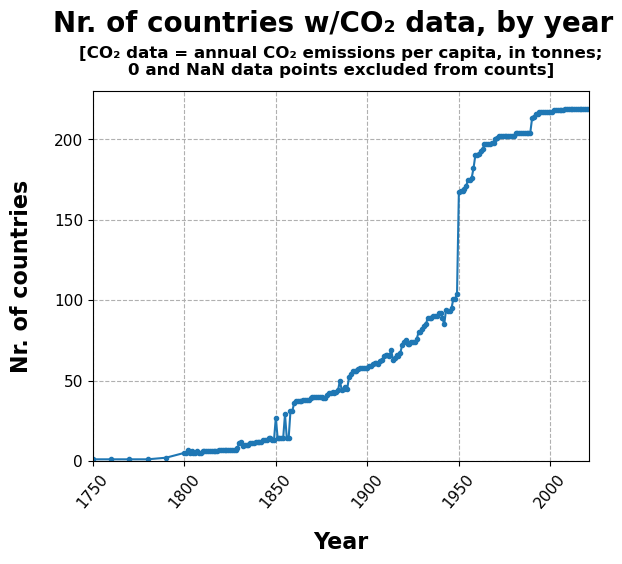

In [68]:
# PLOTTING NR. OF COUNTRIES PER YEAR W/CO2 DATA
# 
# 
# Plotting the number of countries per year with available CO2 data
# against all years, to get a first impression:

fig, ax = plt.subplots()

years = nr_countries_per_year.index
nr_countries = nr_countries_per_year['nr_countries_w_CO2_data']

# Plot nr. of countries against years:
ax.plot(years, nr_countries, marker='.')

# Set font size of tick labels:
ax.tick_params(labelsize=11)

# Rotate x-values:
ax.tick_params(axis="x", labelrotation=50)

# Set minimum & maximum year on x-axis:
ax.set_xlim(min(years), max(years))

# ...and let y-axis start from 0 countries:
ax.set_ylim(0, )

# Setting the axis labels; the labelpad property sets the distance to the chart
ax.set_xlabel('Year', weight='bold', fontsize=16, labelpad=15)
ax.set_ylabel('Nr. of countries', weight='bold', fontsize=16, labelpad=15)

# Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
plt.suptitle('Nr. of countries w/CO\u2082 data, by year', weight='bold', y=1.05, fontsize=20)
plt.title('[CO\u2082 data = annual CO\u2082 emissions per capita, in tonnes;' \
          '\n0 and NaN data points excluded from counts]', 
          weight='bold', pad=12)

# Add grid:
ax.grid(True, linestyle='--')


# # ----------------------------------------------------------
# # Save figure as PNG file.  Notes:
# # 
# #  1) Commented out, use only when needed;
# #  2) Please replace 'fig_path' to the folder where you'd
# #      like to save the PNG file.

# fig_path = "Image_files/"
# fig_name = "Winc_Module_7_Assignment__Fig_A2_6a.png"

# plt.savefig(
#     fig_path + fig_name,
#     dpi=500,
#     bbox_inches='tight'
# )
# # ----------------------------------------------------------

plt.show()


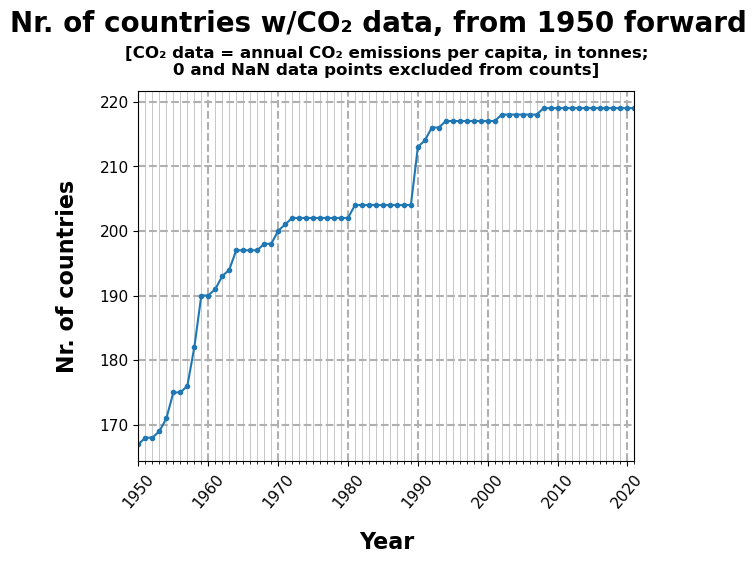

In [69]:
# # PLOTTING NR. OF COUNTRIES PER YEAR W/CO2 DATA - ZOOM IN ON 1950-2021
# 
# 
# Based on the plot above, it makes most sense to focus
# on the period from 1950 onward, as that will include
# most of the world's countries (i.e. to prevent bias
# in naming the "best performers").
# 
# So let's zoom in on 1950-2021 and make another chart:

fig, ax = plt.subplots()

# Only years from 1950 onward:
years_recent = nr_countries_per_year.loc[
    nr_countries_per_year.index > 1949
].index

nr_countries_recent = nr_countries_per_year.loc[
    years_recent,
    'nr_countries_w_CO2_data'
]

# Plot nr. of countries against years:
ax.plot(years_recent, nr_countries_recent, marker='.')

# Set font size of tick labels:
ax.tick_params(labelsize=11)

# Rotate x-values:
ax.tick_params(axis="x", labelrotation=50)

# Set minimum & maximum year on x-axis:
ax.set_xlim(min(years_recent), max(years_recent))

# Setting the axis labels; the labelpad property sets the distance to the chart
ax.set_xlabel('Year', weight='bold', fontsize=16, labelpad=15)
ax.set_ylabel('Nr. of countries', weight='bold', fontsize=16, labelpad=15)

# Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
plt.suptitle('Nr. of countries w/CO\u2082 data, from 1950 forward', weight='bold', y=1.05, fontsize=20)
plt.title('[CO\u2082 data = annual CO\u2082 emissions per capita, in tonnes;' \
          '\n0 and NaN data points excluded from counts]', 
          weight='bold', pad=12)

# Also show minor ticks in between for the x-axis:
from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

# Add gridlines for these minor ticks with thin lines,
# so it becomes easier to read the years:
ax.grid(True, axis='x', linestyle='--', linewidth=1.5)
ax.grid(True, axis='x', which='minor', linewidth=0.7, alpha=0.7)
ax.grid(True, axis='y', linestyle='--', linewidth=1.5)


# # ----------------------------------------------------------
# # Save figure as PNG file.  Notes:
# # 
# #  1) Commented out, use only when needed;
# #  2) Please replace 'fig_path' to the folder where you'd
# #      like to save the PNG file.

# fig_path = "Image_files/"
# fig_name = "Winc_Module_7_Assignment__Fig_A2_6b.png"

# plt.savefig(
#     fig_path + fig_name,
#     dpi=500,
#     bbox_inches='tight'
# )
# # ----------------------------------------------------------

plt.show()


In [70]:
# Based on the above plots, let's take the following
# years as baseline years to calculate the % change 
# in 2021 from:
# 
#  - 1964 (nr. countries w/data stabilizing at 197)
#  - 1990 (sudden jump in nr. countries w/data to 213)
#  - 2008 (nr. countries w/data remains stable at 219)
# 
# By including 2008 as a baseline year, we ensure that all
# countries will be included and there will be no bias in
# finding the "best performers", at least for the most
# recent period since 2008.
# 
# And then for most countries (>90%), we can also consider
# older baseline years, to get a longer-term view of their
# CO2 performance.


In [71]:
# REDUCE CO2 DF TO TARGET YEARS 1964-2021
# 
# Make boolean filter to select all years in 'df_CO2_final'
# from 1964 onward.  P.S. note that a special access
# method is needed bcs. 'year' is level 1 in the MultiIndex.
years_filter = df_CO2_final.index.get_level_values('year')>=1964

# Make new DF with just these years:
df_CO2_recent = df_CO2_final.loc[years_filter].copy()

# Make 'population' column into data type integers.
# 
# Note: define as 'Int64' and not as 'int', because 'Int64'
# allows NaN values in the same column, while 'int' 
# does not (i.e., will give an error message).
# 
# This is needed for the later GroupBy MultiIndex DF, which
# WILL have NaN values for some countries:
df_CO2_recent['population'] = df_CO2_recent['population'].astype('Int64')

# Check result:
# show(
#     df_CO2_recent,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_CO2_recent)


country  population     co2  co2_growth_prct  \
country_code year                                                     
AFG          1964  Afghanistan     9355510   0.839           18.651   
             1965  Afghanistan     9565154   1.007           20.078   
             1966  Afghanistan     9783153   1.091            8.366   
             1967  Afghanistan    10010037   1.282           17.477   
             1968  Afghanistan    10247782   1.223           -4.562   
...                        ...         ...     ...              ...   
ZWE          2017     Zimbabwe    14751101   9.596           -8.899   
             2018     Zimbabwe    15052191  11.795           22.920   
             2019     Zimbabwe    15354606  11.115           -5.772   
             2020     Zimbabwe    15669663  10.608           -4.559   
             2021     Zimbabwe    15993525  11.296            6.488   

                   co2_per_capita  
country_code year                  
AFG          1964           0.090  
             1965           0.105  
             1966           0.112  
             1967           0.128  
             1968           0.119  
...                           ...  
ZWE          2017           0.651  
             2018           0.784  
             2019           0.724  
             2020           0.677  
             2021           0.706  

[12208 rows x 5 columns]

In [72]:
# GROUP DATA BY COUNTRY
# 
# For easier calculations, group the data
# for all 4 variables by country:
df_CO2_by_country = pd.pivot_table(
    data=df_CO2_recent,
    index='country',
    columns='year',
    values=['co2_per_capita', 'co2', 'population', 'co2_growth_prct'],
)

# The above .pivot_table() gave 4x 48 columns 
# (so 4 columns for each year), i.e. one series of
# 48 year columns for each of the 4 variables.
# 
# To make this much more readable and useful, use
# the .stack() function to stack these 4 variables
# on top of each other, resulting in only 48 year 
# columns:
df_CO2_by_country = df_CO2_by_country.stack(level=0, dropna=False)

# Give level 1 of the MultiIndex a proper name:
df_CO2_by_country.index = df_CO2_by_country.index.rename(['country', 'variable'])

# Check result:
display(df_CO2_by_country.head(20))
# (Note: bcs. of the MultiIndex combined with many columns,
# using itables would give a messed-up view.)


year                               1964        1965        1966        1967  \
country     variable                                                          
Afghanistan co2                   0.839       1.007       1.091       1.282   
            co2_growth_prct      18.651      20.078       8.366      17.477   
            co2_per_capita         0.09       0.105       0.112       0.128   
            population        9355510.0   9565154.0   9783153.0  10010037.0   
Albania     co2                   2.015       2.172        2.55       2.677   
            co2_growth_prct      -3.168       7.816      17.375       5.017   
            co2_per_capita        1.034       1.081       1.231       1.256   
            population        1949020.0   2009793.0   2070694.0   2132447.0   
Algeria     co2                   5.643       6.589       8.421       8.432   
            co2_growth_prct       4.131      16.755      27.811       0.127   
            co2_per_capita        0.463       0.532       0.668       0.654   
            population       12179097.0  12381262.0  12613398.0  12897121.0   
Andorra     co2                     NaN         NaN         NaN         NaN   
            co2_growth_prct         NaN         NaN         NaN         NaN   
            co2_per_capita          NaN         NaN         NaN         NaN   
            population             <NA>        <NA>        <NA>        <NA>   
Angola      co2                   1.223       1.186       1.552       0.992   
            co2_growth_prct       6.366      -3.006      30.882     -36.114   
            co2_per_capita        0.216       0.207       0.268        0.17   
            population        5673208.0   5736588.0   5787056.0   5827502.0   

year                               1968        1969        1970        1971  \
country     variable                                                          
Afghanistan co2                   1.223       0.941        1.67       1.894   
            co2_growth_prct      -4.562     -23.064      77.469       13.36   
            co2_per_capita        0.119        0.09       0.155       0.172   
            population       10247782.0  10494491.0  10752973.0  11015853.0   
Albania     co2                   3.069       3.241       3.739       4.348   
            co2_growth_prct       14.63       5.607       15.37      16.273   
            co2_per_capita        1.398       1.434       1.609       1.819   
            population        2195474.0   2259797.0   2324733.0   2389820.0   
Algeria     co2                    9.05      11.263      15.059       18.65   
            co2_growth_prct       7.337      24.449      33.703      23.843   
            co2_per_capita        0.686       0.835       1.092       1.322   
            population       13190979.0  13491022.0  13795915.0  14110269.0   
Andorra     co2                     NaN         NaN         NaN         NaN   
            co2_growth_prct         NaN         NaN         NaN         NaN   
            co2_per_capita          NaN         NaN         NaN         NaN   
            population             <NA>        <NA>        <NA>        <NA>   
Angola      co2                    1.67       2.783       3.578       3.405   
            co2_growth_prct      68.332      66.698      28.559      -4.822   
            co2_per_capita        0.285       0.469       0.593       0.551   
            population        5868201.0   5928387.0   6029702.0   6177053.0   

year                               1972        1973  ...        2012  \
country     variable                                 ...               
Afghanistan co2                    1.53       1.635  ...      10.035   
            co2_growth_prct     -19.181       6.868  ...      -15.23   
            co2_per_capita        0.136       0.141  ...       0.329   
            population       11286753.0  11575308.0  ...  30466484.0   
Albania     co2                   5.638       5.286  ...        4.85   
            co2_gr

In [73]:
# MAKE 'POPULATION' ROWS INTEGERS AGAIN
# 
# While the 'population' column of 'df_CO2_recent'
# was already set to type 'Int64' in cell above,
# somehow the .groupby() and/or .stack() operations
# made it a float again.
# 
# Note 1: define as 'Int64' and not as 'int', because 'Int64'
# allows NaN values in the same column, while 'int' 
# does not (will give error message).
# 
# Note 2: through trial & error I found that this only
# works AFTER already declaring the 'population' column
# as type 'Int64' in earlier cell - if we omit that, it
# won't work here for some reason.

df_CO2_by_country.loc[
    pd.IndexSlice[:, 'population'],
    :
    ] = \
df_CO2_by_country.loc[
    pd.IndexSlice[:, 'population'],
    :
    ].astype('Int64')

# The above operation has set NaN values to a special
# type of NaN that will give errors with later
# calculations.  Therefore, reset ALL NaN values in the
# DF to the "regular" NumPy NaN (float values):
df_CO2_by_country[df_CO2_by_country.isna()] = np.nan

# Check result:
display(df_CO2_by_country.head(20))

# Or alternatively, just show the 'population' rows:
# df_CO2_by_country.loc[
#     pd.IndexSlice[:, 'population'],
#     :
#     ]


year                             1964      1965      1966      1967      1968  \
country     variable                                                            
Afghanistan co2                 0.839     1.007     1.091     1.282     1.223   
            co2_growth_prct    18.651    20.078     8.366    17.477    -4.562   
            co2_per_capita       0.09     0.105     0.112     0.128     0.119   
            population        9355510   9565154   9783153  10010037  10247782   
Albania     co2                 2.015     2.172      2.55     2.677     3.069   
            co2_growth_prct    -3.168     7.816    17.375     5.017     14.63   
            co2_per_capita      1.034     1.081     1.231     1.256     1.398   
            population        1949020   2009793   2070694   2132447   2195474   
Algeria     co2                 5.643     6.589     8.421     8.432      9.05   
            co2_growth_prct     4.131    16.755    27.811     0.127     7.337   
            co2_per_capita      0.463     0.532     0.668     0.654     0.686   
            population       12179097  12381262  12613398  12897121  13190979   
Andorra     co2                   NaN       NaN       NaN       NaN       NaN   
            co2_growth_prct       NaN       NaN       NaN       NaN       NaN   
            co2_per_capita        NaN       NaN       NaN       NaN       NaN   
            population            NaN       NaN       NaN       NaN       NaN   
Angola      co2                 1.223     1.186     1.552     0.992      1.67   
            co2_growth_prct     6.366    -3.006    30.882   -36.114    68.332   
            co2_per_capita      0.216     0.207     0.268      0.17     0.285   
            population        5673208   5736588   5787056   5827502   5868201   

year                             1969      1970      1971      1972      1973  \
country     variable                                                            
Afghanistan co2                 0.941      1.67     1.894      1.53     1.635   
            co2_growth_prct   -23.064    77.469     13.36   -19.181     6.868   
            co2_per_capita       0.09     0.155     0.172     0.136     0.141   
            population       10494491  10752973  11015853  11286753  11575308   
Albania     co2                 3.241     3.739     4.348     5.638     5.286   
            co2_growth_prct     5.607     15.37    16.273    29.668    -6.236   
            co2_per_capita      1.434     1.609     1.819     2.296     2.097   
            population        2259797   2324733   2389820   2455181   2520442   
Algeria     co2                11.263    15.059     18.65    28.323    38.277   
            co2_growth_prct    24.449    33.703    23.843    51.868    35.148   
            co2_per_capita      0.835     1.092     1.322     1.961     2.589   
            population       13491022  13795915  14110269  14439750  14786473   
Andorra     co2                   NaN       NaN       NaN       NaN       NaN   
            co2_growth_prct       NaN       NaN       NaN       NaN       NaN   
            co2_per_capita        NaN       NaN       NaN       NaN       NaN   
            population            NaN       NaN       NaN       NaN       NaN   
Angola      co2                 2.783     3.578     3.405     4.501     4.874   
            co2_growth_prct    66.698    28.559    -4.822    32.159     8.291   
            co2_per_capita      0.469     0.593     0.551     0.707     0.741   
            population        5928387   6029702   6177053   6364736   6578237   

year                         ...      2012      2013      2014      2015  \
country     variable         ...                                           
Afghanistan co2              ...    10.035     9.251      9.17     9.791   
            co2_growth_prct  ...    -15.23     -7.82    -0.867      6.77   
            co2_per_capita   ...     0.329     0.293      0.28      0.29   
            population       ...  30466484  31541216  

In [74]:
# CHANGE ORDER OF VARIABLES
# 
# Changing order of the 'variable' level in MultiIndex,
# showing 'co2_per_capita' on top.
# 
# By default, DF (Multi)Index objects are always ordered
# alphabetically/ numerically, but this can be customized as follows.
# 
# Adapted for MultiIndex DFs from
# https://towardsdatascience.com/how-to-do-a-custom-sort-on-pandas-dataframe-ac18e7ea5320
# 
# -----------------------------------------------
# 
# PART 1 - Helper function to generalize this:
# 
# The input needs:
#  1) a MultiIndex DF that has level names,
#  2) the MultiIndex level of which to custom-sort the labels (note: only 1 level can be sorted at a time),
#  3) and a list of labels (in customized order) to sort on within that level.

def custom_order_multiindex(df_multiindex, level_to_sort, custom_order_list):
    
    from pandas.api.types import CategoricalDtype

    # Define custom order of labels to show in the
    # desired level (= level_to_sort) of the MultiIndex:
    custom_order = CategoricalDtype(
        custom_order_list, 
        ordered=True
    )
    
    # List the MultiIndex level names:
    levels_list = list(df_multiindex.index.names)

    # Change the original MultiIndex object of 'df_multiindex'
    # into its own DF:
    old_idx = df_multiindex.index.to_frame()

    # Change relevant column (= level of original index that 
    # you want to custom sort on) to predefined Categorical Order:
    old_idx[level_to_sort] = old_idx[level_to_sort].astype(custom_order)

    # Now change the MultiIndex of the original 'df_multiindex'
    # to the modified DF of the old index:
    df_multiindex.index = pd.MultiIndex.from_frame(old_idx)

    # Finally, change the order of the newly set MultiIndex
    # (and include all levels in the sorting, in order to
    # make it look the same as in the the original DF):
    df_multiindex = df_multiindex.sort_values(by=levels_list)
    
    return df_multiindex



In [75]:
# CHANGE ORDER OF VARIABLES
# 
# PART 2 - Actual sorting, using the helper function:

custom_order_list = [
    'co2_per_capita',
    'co2',
    'co2_growth_prct',
    'population',
    ]

df_CO2_by_country = custom_order_multiindex(
    df_CO2_by_country,
    'variable',        # name of level to custom sort
    custom_order_list
)

# Check result:
display(df_CO2_by_country.head(20))



year                             1964      1965      1966      1967      1968  \
country     variable                                                            
Afghanistan co2_per_capita       0.09     0.105     0.112     0.128     0.119   
            co2                 0.839     1.007     1.091     1.282     1.223   
            co2_growth_prct    18.651    20.078     8.366    17.477    -4.562   
            population        9355510   9565154   9783153  10010037  10247782   
Albania     co2_per_capita      1.034     1.081     1.231     1.256     1.398   
            co2                 2.015     2.172      2.55     2.677     3.069   
            co2_growth_prct    -3.168     7.816    17.375     5.017     14.63   
            population        1949020   2009793   2070694   2132447   2195474   
Algeria     co2_per_capita      0.463     0.532     0.668     0.654     0.686   
            co2                 5.643     6.589     8.421     8.432      9.05   
            co2_growth_prct     4.131    16.755    27.811     0.127     7.337   
            population       12179097  12381262  12613398  12897121  13190979   
Andorra     co2_per_capita        NaN       NaN       NaN       NaN       NaN   
            co2                   NaN       NaN       NaN       NaN       NaN   
            co2_growth_prct       NaN       NaN       NaN       NaN       NaN   
            population            NaN       NaN       NaN       NaN       NaN   
Angola      co2_per_capita      0.216     0.207     0.268      0.17     0.285   
            co2                 1.223     1.186     1.552     0.992      1.67   
            co2_growth_prct     6.366    -3.006    30.882   -36.114    68.332   
            population        5673208   5736588   5787056   5827502   5868201   

year                             1969      1970      1971      1972      1973  \
country     variable                                                            
Afghanistan co2_per_capita       0.09     0.155     0.172     0.136     0.141   
            co2                 0.941      1.67     1.894      1.53     1.635   
            co2_growth_prct   -23.064    77.469     13.36   -19.181     6.868   
            population       10494491  10752973  11015853  11286753  11575308   
Albania     co2_per_capita      1.434     1.609     1.819     2.296     2.097   
            co2                 3.241     3.739     4.348     5.638     5.286   
            co2_growth_prct     5.607     15.37    16.273    29.668    -6.236   
            population        2259797   2324733   2389820   2455181   2520442   
Algeria     co2_per_capita      0.835     1.092     1.322     1.961     2.589   
            co2                11.263    15.059     18.65    28.323    38.277   
            co2_growth_prct    24.449    33.703    23.843    51.868    35.148   
            population       13491022  13795915  14110269  14439750  14786473   
Andorra     co2_per_capita        NaN       NaN       NaN       NaN       NaN   
            co2                   NaN       NaN       NaN       NaN       NaN   
            co2_growth_prct       NaN       NaN       NaN       NaN       NaN   
            population            NaN       NaN       NaN       NaN       NaN   
Angola      co2_per_capita      0.469     0.593     0.551     0.707     0.741   
            co2                 2.783     3.578     3.405     4.501     4.874   
            co2_growth_prct    66.698    28.559    -4.822    32.159     8.291   
            population        5928387   6029702   6177053   6364736   6578237   

year                         ...      2012      2013      2014      2015  \
country     variable         ...                                           
Afghanistan co2_per_capita   ...     0.329     0.293      0.28      0.29   
            co2              ...    10.035     9.251      9.17     9.791   
            co2_growth_prct  ...    -15.23     -7.82    -0.867      6.77   
            population       ...  30466484  31541216  

In [76]:
# Helper function to create new column with % growth
# 
# This helper function takes the values in column A (the numerator)
# and divides them by the values in column B (the denominator),
# giving the percentage growth (or contraction), where column B is
# considered the 100% baseline.  Usually columns A and B are part 
# of a time series, where column A is a more recent snapshot than
# column B.
# 
# The growth % values are stored in a new column, placed all the way at
# the left of the DF by default, or at a desired custom column index.
# The function output is the modified DF. 

def calculate_perc_growth(df, column_recent, column_old, new_column, index=0):
    
    # To prevent division-by-zero errors, first make a filter
    # to only select non-zero values in column B (the denominator):
    nonzero_filter = ~(df[column_old] == 0)
    
    # Calculate the growth %, rounded to 1 decimal, and 
    # store in 'new_column'.
    #
    # (Note: bcs. 'population' rows were set as type 'Int64' earlier,
    # this gave an error with the round() function.  The .astype(float)
    # addition solves this, see
    # https://stackoverflow.com/questions/61004087/
    #        pandas-dataframe-i-want-to-use-round-while-dividing-columns-but-im-getting  )
    df.loc[nonzero_filter, new_column] = round(
    (100 * df.loc[nonzero_filter, column_recent] / df.loc[nonzero_filter, column_old])
    .astype(float),
    1)
    
    # Remove the new column from its position all the way
    # to the right and place it all the way to the left (= default),
    # or at the the desired position indicated by the column 
    # index in the function input.
    df.insert(index, new_column, df.pop(new_column))
    
    return df



In [77]:
# Helper function to calculate the delta (= change)
# as absolute values between two columns.

def calculate_abs_delta(df, column_recent, column_old, new_column, index=0):
    
    # Calculate difference and store in 'new_column'
    df[new_column] = df[column_recent] - df[column_old]
    
    # Move column to desired position
    # (default = all the way to the left):
    df.insert(index, new_column, df.pop(new_column))
    
    return df



In [78]:
# ADDING COLUMNS WITH CHANGES (BOTH % AND ABSOLUTE DELTAS)
# BETWEEN BASELINE YEARS
# 
# Add % growth columns for:
#  - 1964 baseline (= 100%)
#  - 1990 vs. 1964
#  - 2008 vs. 1964
#  - 2021 vs. 1964
calculate_perc_growth(df_CO2_by_country, 1964, 1964, 'perc_1964_base')
calculate_perc_growth(df_CO2_by_country, 1990, 1964, 'perc_1990_1964', 1)
calculate_perc_growth(df_CO2_by_country, 2008, 1964, 'perc_2008_1964', 2)
calculate_perc_growth(df_CO2_by_country, 2021, 1964, 'perc_2021_1964', 3)

# Add percentage DIFFERENCE between 2021 - 1964
# (for bar chart) = column 'perc_2021_1964' - 100
calculate_abs_delta(df_CO2_by_country, 'perc_2021_1964', 'perc_1964_base',
                    'delta_perc_21_64', 4)


# In addition, to account for all countries that were
# added between 1964 - 1990 (in terms of available CO2 data)
# also add % growth columns for:
# 
#  - 1964 vs. 1990 (for most countries likely <100%)
#  - 1990 baseline (= 100%)
#  - 2008 vs. 1990
#  - 2021 vs. 1990
calculate_perc_growth(df_CO2_by_country, 1964, 1990, 'perc_1964_1990', 5)
calculate_perc_growth(df_CO2_by_country, 1990, 1990, 'perc_1990_base', 6)
calculate_perc_growth(df_CO2_by_country, 2008, 1990, 'perc_2008_1990', 7)
calculate_perc_growth(df_CO2_by_country, 2021, 1990, 'perc_2021_1990', 8)

# Add percentage DIFFERENCE between 2021 - 1990
# (for bar chart) = column 'perc_2021_1990' - 100
calculate_abs_delta(df_CO2_by_country, 'perc_2021_1990', 'perc_1990_base',
                    'delta_perc_21_90', 9)


# And finally, to account for ALL countries that were added
# since 1964 (in terms of available CO2 data), with 2008 being 
# the year that all 219 countries are complete, also add 
# % growth columns for:
# 
#  - 1964 vs. 2008 (for most countries likely <100%)
#  - 1990 vs. 2008
#  - 2008 baseline (= 100%)
#  - 2021 vs. 2008
calculate_perc_growth(df_CO2_by_country, 1964, 2008, 'perc_1964_2008', 10)
calculate_perc_growth(df_CO2_by_country, 1990, 2008, 'perc_1990_2008', 11)
calculate_perc_growth(df_CO2_by_country, 2008, 2008, 'perc_2008_base', 12)
calculate_perc_growth(df_CO2_by_country, 2021, 2008, 'perc_2021_2008', 13)

# Add percentage DIFFERENCE between 2021 - 2008
# (for bar chart) = column 'perc_2021_2008' - 100
calculate_abs_delta(df_CO2_by_country, 'perc_2021_2008', 'perc_2008_base',
                    'delta_perc_21_08', 14)

# Add absolute change (= delta) columns for:
#  - 1990 - 1964
#  - 2008 - 1964
#  - 2008 - 1990
#  - 2021 - 1964
#  - 2021 - 1990
#  - 2021 - 2008
calculate_abs_delta(df_CO2_by_country, 1990, 1964, 'delta_1990_1964', 15)
calculate_abs_delta(df_CO2_by_country, 2008, 1964, 'delta_2008_1964', 16)
calculate_abs_delta(df_CO2_by_country, 2008, 1990, 'delta_2008_1990', 17)
calculate_abs_delta(df_CO2_by_country, 2021, 1964, 'delta_2021_1964', 18)
calculate_abs_delta(df_CO2_by_country, 2021, 1990, 'delta_2021_1990', 19)
calculate_abs_delta(df_CO2_by_country, 2021, 2008, 'delta_2021_2008', 20)

# Check result:
display(df_CO2_by_country.head(12))
# show_with_itables(df_CO2_by_country)


year                         perc_1964_base  perc_1990_1964  perc_2008_1964  \
country     variable                                                          
Afghanistan co2_per_capita            100.0           210.0           178.9   
            co2                       100.0           241.2           507.0   
            co2_growth_prct           100.0          -143.6           278.5   
            population                100.0           114.3           282.5   
Albania     co2_per_capita            100.0           162.0           144.1   
            co2                       100.0           274.0           218.2   
            co2_growth_prct           100.0          1217.4          -358.2   
            population                100.0           169.1           151.4   
Algeria     co2_per_capita            100.0           649.5           681.2   
            co2                       100.0          1359.9          1932.2   
            co2_growth_prct           100.0           -93.1            14.1   
            population                100.0           209.5           283.8   

year                         perc_2021_1964  delta_perc_21_64  perc_1964_1990  \
country     variable                                                            
Afghanistan co2_per_capita            328.9             228.9            47.6   
            co2                      1415.3            1315.3            41.5   
            co2_growth_prct             8.8             -91.2           -69.6   
            population                428.6             328.6            87.5   
Albania     co2_per_capita            156.5              56.5            61.7   
            co2                       229.2             129.2            36.5   
            co2_growth_prct            73.1             -26.9             8.2   
            population                146.5              46.5            59.1   
Algeria     co2_per_capita            861.8             761.8            15.4   
            co2                      3123.7            3023.7             7.4   
            co2_growth_prct            52.8             -47.2          -107.4   
            population                362.7             262.7            47.7   

year                         perc_1990_base  perc_2008_1990  perc_2021_1990  \
country     variable                                                          
Afghanistan co2_per_capita            100.0            85.2           156.6   
            co2                       100.0           210.2           586.7   
            co2_growth_prct           100.0          -194.0            -6.1   
            population                100.0           247.1           374.9   
Albania     co2_per_capita            100.0            89.0            96.6   
            co2                       100.0            79.6            83.7   
            co2_growth_prct           100.0           -29.4             6.0   
            population                100.0            89.6            86.6   
Algeria     co2_per_capita            100.0           104.9           132.7   
            co2                       100.0           142.1           229.7   
            co2_growth_prct           100.0           -15.1           -56.7   
            population                100.0           135.5           173.1   

year                         delta_perc_21_90  ...      2012      2013  \
country     variable                           ...                       
Afghanistan co2_per_capita               56.6  ...     0.329     0.293   
            co2                         486.7  ...    10.035     9.251   
            co2_growth_prct            -106.1  ...    -15.23     -7.82   
            population                  274.9  ...  30466484  31541216   
Albania     co2_per_capita               -3.4  ...     1.677     1.831   
            co2                         -16.3  ...      4.85     5.287   
            co2_growth_prct             -94.0  ...    -8.74

In [79]:
# MAKE SORTED COPIES OF DF FOR VARIOUS PLOTS
# 
# 
# Helper function to sort 'df_CO2_by_country' by
# the different 'change' measures.  Needed in order to
# plot the top x nr. of countries for each measure.
# 
# --------------------------------------------------
# 
# In order to make plots with the best performing countries
# with respect to the various change measures of 'co2_per_capita',
# we need to make copies of 'df_CO2_by_country' that are
# ordered by each different change measure.
# 
# This while also keeping the MultiIndex structure -- so still
# showing all 4 'variable' rows per country in level 1, even 
# though we will only SORT on the variable 'co2_per_capita'.
# 
# This can be done by first ordering the DF by the respective
# change measure (only looking at the 'co2_per_capita' variable 
# for now), and then using that order of countries in the 
# custom_order_multiindex() helper function.
# __________________________________________________________
# 
# (NOTE, to-do: ignore NaN values in the sorting, never on top!)
# __________________________________________________________

# Shorthand to select one or several levels
# within a MultiIndex DF:
idx = pd.IndexSlice

# Columns to be used in the various 'top reducers' DFs for plotting,
# i.e., the 4 reference years + all calculated 'change' columns
# (as % and absolute deltas) based on those 4 years:
cols = [1964, 1990, 2008, 2021, *list(df_CO2_by_country.columns[:21])]

def create_DFs_of_top_reducers(change_measure,
                               variable='co2_per_capita',
                               top_x=7,
                               show_top_x_DF=True,
                               show_all_DFs=False
                              ):
    
    # Make copy of main DF, to be modified:
    df_CO2_sorted_by_change_measure = df_CO2_by_country.copy()

    # From this DF, use only the desired variable (= 'co2_per_capita'
    # by default;  in level 1 of the MultiIndex) and sort by the desired
    # 'change' measure, with the top reducing countries on top.
    # 
    # This gives a new index object of countries, ordered by
    # most CO2 reducing, which can be used to sort the
    # larger MultiIndex DF on:
    country_sorter = df_CO2_sorted_by_change_measure.loc[
        idx[:, variable],
        :
    ].sort_values(
        by=change_measure,
        ascending=True
    ).index.get_level_values('country')

    # Now sorting the main DF by that index sorter of
    # top reducing countries, using the earlier defined
    # helper function:
    df_CO2_sorted_by_change_measure = custom_order_multiindex(
        df_CO2_sorted_by_change_measure,
        'country',                   # Name of MultiIndex level (of main DF) to custom sort on
        country_sorter   # [::-1]    # Add latter for reversed order
    )

    # Now from this sorted main DF (which still has all the 58 year columns),
    # create smaller subset DF of the top x countries, with only the
    # 'co2-per_capita' variable (from level 1 of the MultiIndex) and
    # only the selected columns (with 4 reference years + 21 'change'
    # measures).
    # 
    # This 'top_x' DF is what will be plotted:
    df_top_x_countries = df_CO2_sorted_by_change_measure.loc[
        idx[:, variable],
        cols
    ].head(top_x)
    
    # Check results, if desired:
    if show_top_x_DF==True:
        display(df_top_x_countries)
#         show_with_itables(df_top_x_countries)

    if show_all_DFs==True:
        #  The top reducing countries "sorter":
        display(country_sorter)
        
        # The sorted main DF, with ALL countries & columns:
        display(df_CO2_sorted_by_change_measure)
#         show_with_itables(df_CO2_sorted_by_change_measure)
        
        #  DF of top x nr. of countries & selected columns:
        display(df_top_x_countries)
#         show_with_itables(df_top_x_countries)

    return (df_top_x_countries, df_CO2_sorted_by_change_measure)




In [80]:
# PLOTTING TOP CO2 REDUCING COUNTRIES - RELATIVE REDUCTIONS
# 
# 
# 1) Helper function to plot each 'top CO2 reducers' DF
#     as a RELATIVE % compared to the per capita CO2 outputs
#     in the specified baseline year;
# 
#     with different top reducers lists, depending on 
#     the CO2 reduction 'change measure':

def plot_top_CO2_reducers_rel(
    df_top_reducers, change_measure_columns, plt_titles, base_year,    
    save_plot=False, fig_path='Image_files/', fig_name='top_CO2_reducers.png'
    ):
    
    # Retrieve the 4 reference years to be used,
    # i.e., 1964, 1990, 2008 & 2021:
    ref_years = [*df_top_reducers.columns[:4]]
    
    fig, ax = plt.subplots()
    
    # Plot 4 vertical lines for the 4 reference years, as an
    # "extra" vertical grid (on top of the main grid), to help
    # make understanding the chart & approach super clear:
    for year in ref_years:
        ax.axvline(x=year,
                   linestyle='--', linewidth=1.15,
                   alpha=0.48, color='black')
        
        # ...and add rotated year annotation on top of each line
        # at specified (x,y) location:
        ax.text(year - 2.5, 190,
                str(year),
                weight='bold', style='oblique',
                rotation=50, fontsize=9.5)
    
    
    # Add a horizontal dashed line for the 100% baseline output
    # of the "denominator" year (1964, 1990 or 2008), with annotation:
    ax.axhline(y=100,
               linestyle='--', linewidth=3, color='black')
    ax.text(1997.2, 108.5,
            str(base_year) + ' baseline = 100%',
            #         '1964 baseline = 100%',
            weight='bold', fontsize=11.5)
    
    # For each of the top countries (= index level 0 of each DF row),
    # plot the % CO2 output (relative to 1964 = 100%) against the 4 years.
    # 
    # By doing this as the final plotting step, we plot these colored lines
    # ON TOP OF the horizontal & vertical black/grey lines plotted above:
    for index, row in df_top_reducers.iterrows():
        
        ax.plot(ref_years, row[change_measure_columns],
                label=index[0],
                linewidth=2.3,
                marker='.', markersize=11)
    
    
    # Set font size of tick labels on x- and y-axis:
    ax.tick_params(labelsize=11)

    # Make y-axis logarithmic and set custom tick positions:
    import matplotlib.ticker
    ax.set_yscale('log')
    ax.set_yticks([3, 5, 10, 15, 20, 30, 50, 70, 100, 120, 150, 200, 300])
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    # Set major ticks on x-axis every 10 years:
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    
    # Also show 10 minor x-ticks in between:
    from matplotlib.ticker import AutoMinorLocator
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
    
    # Set degrees of rotation of the x-tick labels (= years):
    ax.tick_params(axis="x", labelrotation=50)
    
    # Set min & max values for the x- and y-axis:
    ax.set_xlim(1960, 2023)
    ax.set_ylim(3, 300)
    
    # Setting the axis labels; the labelpad property sets the distance to the chart:
    ax.set_xlabel(plt_titles['xlabel'], weight='bold', fontsize=16, labelpad=15)
    ax.set_ylabel(plt_titles['ylabel'], weight='bold', fontsize=16, labelpad=15)
    
    # Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
    plt.suptitle(plt_titles['suptitle'], weight='bold', y=1.06, fontsize=22)
    plt.title(plt_titles['title'], weight='bold', pad=13)
    
    # Show legend:
    ax.legend(
        loc='upper left',
        # Put legend outside of the chart, on the top right:
        bbox_to_anchor=(1.01, 1.02),  
        fontsize=9.5,
        alignment='left',
        facecolor='wheat',
        framealpha=0.5,
        edgecolor='k',
        title='Countries by smallest %\nof outputs in 2021:\n',
        title_fontproperties={'weight': 'bold'}
    )
    
    # Add x-y grid:
    ax.grid(True, linestyle='--')
        
    # Save plot as PNG, depending on input:
    if save_plot==True:
                
        plt.savefig(
            fig_path + fig_name,
            dpi=500,
            bbox_inches='tight'
        )
        
    plt.show()



year                                                1964    1990    2008  \
country                          variable                                  
Sint Maarten (Dutch part)        co2_per_capita  306.846  20.474   20.95   
Curaçao                          co2_per_capita   70.841  30.768  36.897   
Bonaire, Sint Eustatius and Saba co2_per_capita    17.13   5.468   4.375   
Democratic Republic of Congo     co2_per_capita    0.116   0.118   0.029   
Qatar                            co2_per_capita  108.941  25.836   44.49   
Moldova                          co2_per_capita    5.417   8.155   1.361   
Luxembourg                       co2_per_capita   37.673   31.01  22.889   

year                                               2021  perc_1964_base  \
country                          variable                                 
Sint Maarten (Dutch part)        co2_per_capita  14.705           100.0   
Curaçao                          co2_per_capita   9.686           100.0   
Bonaire, Sint Eustatius and Saba co2_per_capita   3.868           100.0   
Democratic Republic of Congo     co2_per_capita   0.027           100.0   
Qatar                            co2_per_capita  35.587           100.0   
Moldova                          co2_per_capita    1.83           100.0   
Luxembourg                       co2_per_capita  13.068           100.0   

year                                             perc_1990_1964  \
country                          variable                         
Sint Maarten (Dutch part)        co2_per_capita             6.7   
Curaçao                          co2_per_capita            43.4   
Bonaire, Sint Eustatius and Saba co2_per_capita            31.9   
Democratic Republic of Congo     co2_per_capita           101.7   
Qatar                            co2_per_capita            23.7   
Moldova                          co2_per_capita           150.5   
Luxembourg                       co2_per_capita            82.3   

year                                             perc_2008_1964  \
country                          variable                         
Sint Maarten (Dutch part)        co2_per_capita             6.8   
Curaçao                          co2_per_capita            52.1   
Bonaire, Sint Eustatius and Saba co2_per_capita            25.5   
Democratic Republic of Congo     co2_per_capita            25.0   
Qatar                            co2_per_capita            40.8   
Moldova                          co2_per_capita            25.1   
Luxembourg                       co2_per_capita            60.8   

year                                             perc_2021_1964  \
country                          variable                         
Sint Maarten (Dutch part)        co2_per_capita             4.8   
Curaçao                          co2_per_capita            13.7   
Bonaire, Sint Eustatius and Saba co2_per_capita            22.6   
Democratic Republic of Congo     co2_per_capita            23.3   
Qatar                            co2_per_capita            32.7   
Moldova                          co2_per_capita            33.8   
Luxembourg                       co2_per_capita            34.7   

year                                             delta_perc_21_64  \
country                          variable                           
Sint Maarten (Dutch part)        co2_per_capita             -95.2   
Curaçao                          co2_per_capita             -86.3   
Bonaire, Sint Eustatius and Saba co2_per_capita             -77.4   
Democratic Republic of Congo     co2_per_capita             -76.7   
Qatar                            co2_per_capita             -67.3   
Moldova                          co2_per_capita             -66.2   
Luxembourg                       co2_per_capita             -65.3   

year                                             perc_1964_1990  ...  \
country                          variable                        ...   
Sint Maarten (Dutch part)        co2_per_capita          1498

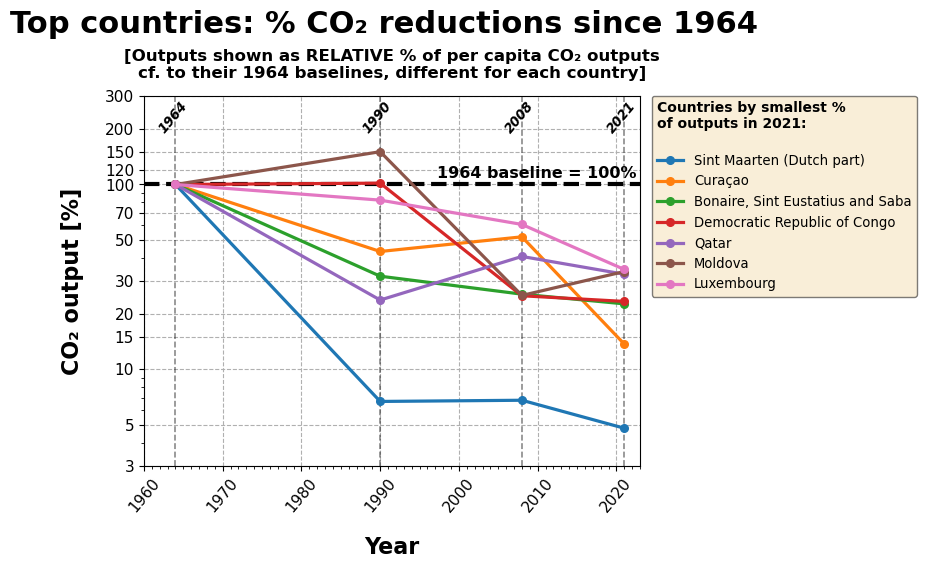

In [81]:
# PLOTTING CO2 OUTPUTS AS RELATIVE % OF 1964 BASELINE:

(df_top_perc2164, df_CO2_sorted_by_perc2164
) = create_DFs_of_top_reducers(
    change_measure='perc_2021_1964',
    variable='co2_per_capita',
    top_x=7, show_top_x_DF=True, show_all_DFs=False
    )

# Define dict of chart labels:
titles_perc2164 = {
    'xlabel': 'Year',
    'ylabel': 'CO\u2082 output [%]',
    'suptitle': 'Top countries: % CO\u2082 reductions since 1964',
    'title': '[Outputs shown as RELATIVE % of per capita CO\u2082 outputs' \
             '\ncf. to their 1964 baselines, different for each country]'
}

change_cols_perc2164 = [*df_top_perc2164.columns[4:8]]

plot_top_CO2_reducers_rel(df_top_perc2164, change_cols_perc2164,
                          titles_perc2164, 1964,
                          save_plot=False,
                          fig_name='Winc_Module_7_Assignment__Fig_3A.png')



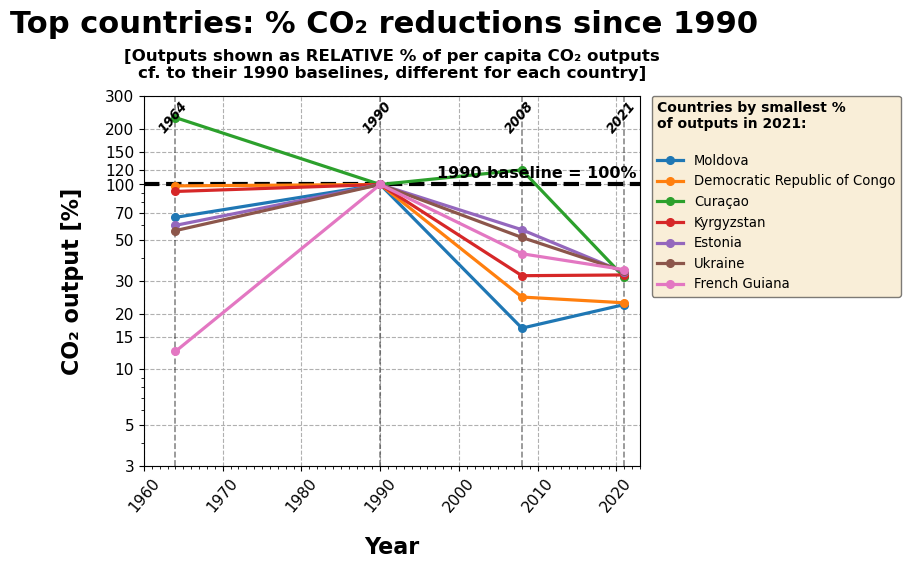

In [82]:
# PLOTTING CO2 OUTPUTS AS RELATIVE % OF 1990 BASELINE:

(df_top_perc2190, df_CO2_sorted_by_perc2190
) = create_DFs_of_top_reducers(
    change_measure='perc_2021_1990',
    variable='co2_per_capita',
    top_x=7, show_top_x_DF=False, show_all_DFs=False
    )

# Define dict of chart labels:
titles_perc2190 = {
    'xlabel': 'Year',
    'ylabel': 'CO\u2082 output [%]',
    'suptitle': 'Top countries: % CO\u2082 reductions since 1990',
    'title': '[Outputs shown as RELATIVE % of per capita CO\u2082 outputs' \
             '\ncf. to their 1990 baselines, different for each country]'
}

change_cols_perc2190 = [*df_top_perc2190.columns[9:13]]

plot_top_CO2_reducers_rel(df_top_perc2190, change_cols_perc2190,
                          titles_perc2190, 1990,
                          save_plot=False,
                          fig_name='Winc_Module_7_Assignment__Fig_3C.png')



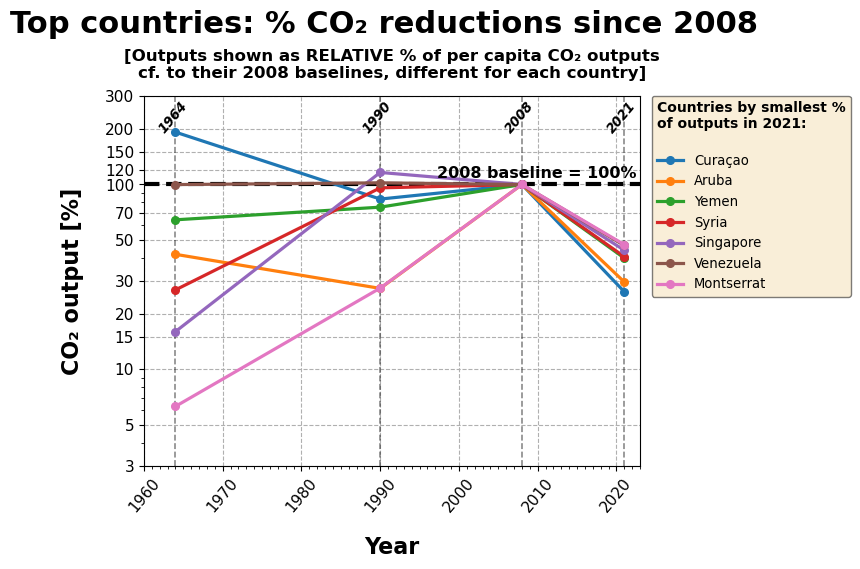

In [83]:
# PLOTTING CO2 OUTPUTS AS RELATIVE % OF 2008 BASELINE:

(df_top_perc2108, df_CO2_sorted_by_perc2108
) = create_DFs_of_top_reducers(
    change_measure='perc_2021_2008',
    variable='co2_per_capita',
    top_x=7, show_top_x_DF=False, show_all_DFs=False
    )

# Define dict of chart labels:
titles_perc2108 = {
    'xlabel': 'Year',
    'ylabel': 'CO\u2082 output [%]',
    'suptitle': 'Top countries: % CO\u2082 reductions since 2008',
    'title': '[Outputs shown as RELATIVE % of per capita CO\u2082 outputs' \
             '\ncf. to their 2008 baselines, different for each country]'
}

change_cols_perc2108 = [*df_top_perc2108.columns[14:18]]

plot_top_CO2_reducers_rel(df_top_perc2108, change_cols_perc2108,
                          titles_perc2108, 2008,
                          save_plot=False,
                          fig_name='Winc_Module_7_Assignment__Fig_3E.png')


In [84]:
# PLOTTING TOP CO2 REDUCING COUNTRIES - ABSOLUTE REDUCTIONS
# 
# 
# 2) Helper function to plot each 'top CO2 reducers' DF
#     as ABSOLUTE reductions, in tonnes of CO2 per capita;
# 
#     with different top reducers lists, depending on 
#     the CO2 reduction 'change measure':


def plot_top_CO2_reducers_abs(
    df_top_reducers, plt_titles, base_year, save_plot=False,
    fig_path='Image_files/', fig_name='top_CO2_reducers.png'
    ):
    
    # Retrieve the 4 reference years to be used,
    # i.e., 1964, 1990, 2008 & 2021:
    ref_years = [*df_top_reducers.columns[:4]]
    
    fig, ax = plt.subplots()
    
    # Plot 4 vertical lines for the 4 reference years, as an
    # "extra" vertical grid (on top of the main grid), to help
    # make understanding the chart & approach super clear:
    for year in ref_years:
        ax.axvline(x=year,
                   linestyle='--', linewidth=1.15,
                   alpha=0.48, color='black')
        
        # ...and add rotated year annotation on top of each line
        # at specified (x,y) location:
        ax.text(year - 2.5, 280,
                str(year),
                weight='bold', style='oblique',
                rotation=50, fontsize=9.5)
    
    
    # Add arrow in top portion, pointing slightly downward
    # from the 'base_year' to 2021, to make it clearer that
    # this chart shows absolute reductions in tonnes:
    import matplotlib.patches as mpatches
    arrow = mpatches.FancyArrowPatch((base_year, 300), (2021, 150),
                                     mutation_scale=20, facecolor='#c7c7c7')
    ax.add_patch(arrow)

    
    # For each of the top countries (= index level 0 of each DF row),
    # plot the absolute CO2 per capita output against the 4 years.
    # 
    # By doing this as the final plotting step, we plot these colored lines
    # ON TOP OF the horizontal & vertical black/grey lines plotted above:
    for index, row in df_top_reducers.iterrows():
        
        ax.plot(ref_years, row[:4],
                label=index[0],
                linewidth=2.3,
                marker='.', markersize=11)
    
    
    # Set font size of tick labels on x- and y-axis:
    ax.tick_params(labelsize=11)

    # Make y-axis logarithmic and set custom tick positions:
    import matplotlib.ticker
    ax.set_yscale('log')
    ax.set_yticks([1, 3, 5, 10, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500])
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    # Set major ticks on x-axis every 10 years:
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    
    # Also show 10 minor x-ticks in between:
    from matplotlib.ticker import AutoMinorLocator
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
    
    # Set degrees of rotation of the x-tick labels (= years):
    ax.tick_params(axis="x", labelrotation=50)
    
    # Set min & max values for the x- and y-axis:
    ax.set_xlim(1960, 2023)
    ax.set_ylim(1, 500)
    
    # Setting the axis labels; the labelpad property sets the distance to the chart:
    ax.set_xlabel(plt_titles['xlabel'], weight='bold', fontsize=16, labelpad=15)
    ax.set_ylabel(plt_titles['ylabel'], weight='bold', fontsize=16, labelpad=15)
    
    # Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
    plt.suptitle(plt_titles['suptitle'], weight='bold', y=1.06, fontsize=22)
    plt.title(plt_titles['title'], weight='bold', pad=13)
    
    # Show legend:
    ax.legend(
        loc='upper left',
        # Put legend outside of the chart, on the top right:
        bbox_to_anchor=(1.01, 1.02),  
        fontsize=9.5,
        alignment='left',
        facecolor='wheat',
        framealpha=0.5,
        edgecolor='k',
        title=f'Countries by largest\nabsolute reductions\nfrom {str(base_year)} to 2021:\n',
        title_fontproperties={'weight': 'bold'}
    )
    
    # Add x-y grid:
    ax.grid(True, linestyle='--')
    
    # Save plot as PNG, depending on input:
    if save_plot==True:
                
        plt.savefig(
            fig_path + fig_name,
            dpi=500,
            bbox_inches='tight'
        )
            
    plt.show()



year                                                1964    1990    2008  \
country                          variable                                  
Sint Maarten (Dutch part)        co2_per_capita  306.846  20.474   20.95   
Qatar                            co2_per_capita  108.941  25.836   44.49   
Curaçao                          co2_per_capita   70.841  30.768  36.897   
Kuwait                           co2_per_capita   54.351  22.572  31.045   
Luxembourg                       co2_per_capita   37.673   31.01  22.889   
Bonaire, Sint Eustatius and Saba co2_per_capita    17.13   5.468   4.375   
Estonia                          co2_per_capita   14.122  23.507  13.381   

year                                               2021  perc_1964_base  \
country                          variable                                 
Sint Maarten (Dutch part)        co2_per_capita  14.705           100.0   
Qatar                            co2_per_capita  35.587           100.0   
Curaçao                          co2_per_capita   9.686           100.0   
Kuwait                           co2_per_capita  24.972           100.0   
Luxembourg                       co2_per_capita  13.068           100.0   
Bonaire, Sint Eustatius and Saba co2_per_capita   3.868           100.0   
Estonia                          co2_per_capita   7.864           100.0   

year                                             perc_1990_1964  \
country                          variable                         
Sint Maarten (Dutch part)        co2_per_capita             6.7   
Qatar                            co2_per_capita            23.7   
Curaçao                          co2_per_capita            43.4   
Kuwait                           co2_per_capita            41.5   
Luxembourg                       co2_per_capita            82.3   
Bonaire, Sint Eustatius and Saba co2_per_capita            31.9   
Estonia                          co2_per_capita           166.5   

year                                             perc_2008_1964  \
country                          variable                         
Sint Maarten (Dutch part)        co2_per_capita             6.8   
Qatar                            co2_per_capita            40.8   
Curaçao                          co2_per_capita            52.1   
Kuwait                           co2_per_capita            57.1   
Luxembourg                       co2_per_capita            60.8   
Bonaire, Sint Eustatius and Saba co2_per_capita            25.5   
Estonia                          co2_per_capita            94.8   

year                                             perc_2021_1964  \
country                          variable                         
Sint Maarten (Dutch part)        co2_per_capita             4.8   
Qatar                            co2_per_capita            32.7   
Curaçao                          co2_per_capita            13.7   
Kuwait                           co2_per_capita            45.9   
Luxembourg                       co2_per_capita            34.7   
Bonaire, Sint Eustatius and Saba co2_per_capita            22.6   
Estonia                          co2_per_capita            55.7   

year                                             delta_perc_21_64  \
country                          variable                           
Sint Maarten (Dutch part)        co2_per_capita             -95.2   
Qatar                            co2_per_capita             -67.3   
Curaçao                          co2_per_capita             -86.3   
Kuwait                           co2_per_capita             -54.1   
Luxembourg                       co2_per_capita             -65.3   
Bonaire, Sint Eustatius and Saba co2_per_capita             -77.4   
Estonia                          co2_per_capita             -44.3   

year                                             perc_1964_1990  ...  \
country                          variable                        ...   
Sint Maarten (Dutch part)        co2_per_capita          1498

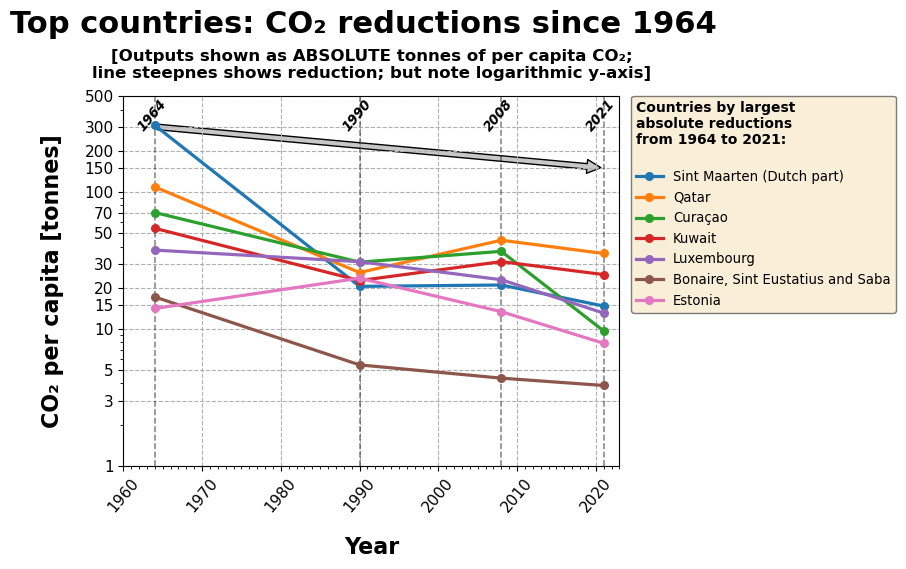

In [85]:
# PLOTTING ABSOLUTE CO2 OUTPUTS OF TOP REDUCERS SINCE 1964:

(df_top_delta_2164, df_CO2_sorted_by_delta_2164
) = create_DFs_of_top_reducers(
    change_measure='delta_2021_1964',
    variable='co2_per_capita',
    top_x=7, show_top_x_DF=True, show_all_DFs=False
    )

# Define dict of chart labels:
titles_delta_2164 = {
    'xlabel': 'Year',
    'ylabel': 'CO\u2082 per capita [tonnes]',
    'suptitle': 'Top countries: CO\u2082 reductions since 1964',
    'title': '[Outputs shown as ABSOLUTE tonnes of per capita CO\u2082;' \
             '\nline steepnes shows reduction; but note logarithmic y-axis]'
}

plot_top_CO2_reducers_abs(df_top_delta_2164, titles_delta_2164, 1964,
                          save_plot=False, 
                          fig_name='Winc_Module_7_Assignment__Fig_3B.png')



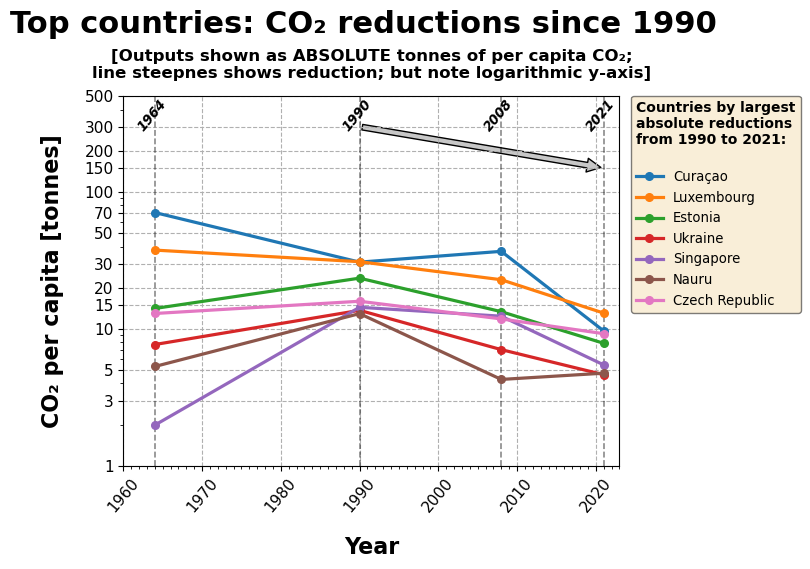

In [86]:
# PLOTTING ABSOLUTE CO2 OUTPUTS OF TOP REDUCERS SINCE 1990:

(df_top_delta_2190, df_CO2_sorted_by_delta_2190
) = create_DFs_of_top_reducers(
    change_measure='delta_2021_1990',
    variable='co2_per_capita',
    top_x=7, show_top_x_DF=False, show_all_DFs=False
    )

# Define dict of chart labels:
titles_delta_2190 = {
    'xlabel': 'Year',
    'ylabel': 'CO\u2082 per capita [tonnes]',
    'suptitle': 'Top countries: CO\u2082 reductions since 1990',
    'title': '[Outputs shown as ABSOLUTE tonnes of per capita CO\u2082;' \
             '\nline steepnes shows reduction; but note logarithmic y-axis]'
}

plot_top_CO2_reducers_abs(df_top_delta_2190, titles_delta_2190, 1990,
                          save_plot=False,
                          fig_name='Winc_Module_7_Assignment__Fig_3D.png')


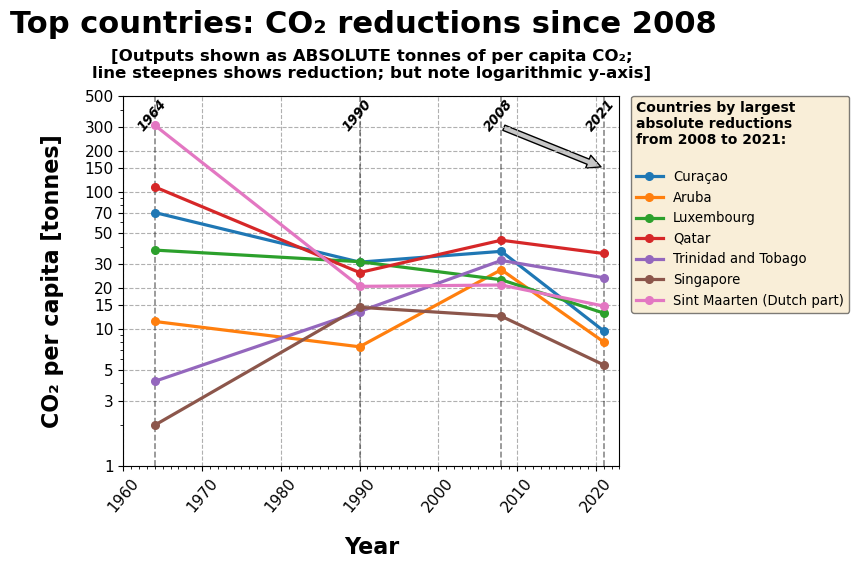

In [87]:
# PLOTTING ABSOLUTE CO2 OUTPUTS OF TOP REDUCERS SINCE 2008:

(df_top_delta_2108, df_CO2_sorted_by_delta_2108
) = create_DFs_of_top_reducers(
    change_measure='delta_2021_2008',
    variable='co2_per_capita',
    top_x=7, show_top_x_DF=False, show_all_DFs=False
    )

# Define dict of chart labels:
titles_delta_2108 = {
    'xlabel': 'Year',
    'ylabel': 'CO\u2082 per capita [tonnes]',
    'suptitle': 'Top countries: CO\u2082 reductions since 2008',
    'title': '[Outputs shown as ABSOLUTE tonnes of per capita CO\u2082;' \
             '\nline steepnes shows reduction; but note logarithmic y-axis]'
}

plot_top_CO2_reducers_abs(df_top_delta_2108, titles_delta_2108, 2008,                          
                          save_plot=False,
                          fig_name='Winc_Module_7_Assignment__Fig_3F.png')


In [88]:
# PLOTTING TOP CO2 REDUCING COUNTRIES - BAR CHART
# 
# 
# 3) Helper function to plot each 'top CO2 reducers' DF
#     as a horizontal bar chart, showing only the amounts
#     of reduction in 2021 measured from the base year
#     (so without plotting the other reference years).
# 
#     Both the absolute and relative % reductions can be
#     plotted, based on the input:


def plot_top_CO2_reducers_barchart(
    df_top_reducers, change_measure, base_year,
    save_plot=False,
    fig_path='Image_files/', fig_name='top_CO2_reducers.png'
    ):
    
    # List top 7 countries from the DF index
    # for the y-axis labels:
    top7_countries = list(
        df_top_reducers.index.get_level_values('country')
    )
    
    # Create MultiIndex Series (with country as level 0)
    # of the column that has the reduction measured from the
    # base year to 2021.  Note the minus sign, needed to make
    # these positive values again:
    idx = pd.IndexSlice
    
    reduction_values = - df_top_reducers.loc[
        idx[:, 'co2_per_capita'],
        change_measure
    ]
    
    
    # Define dict of titles for plot, depending on
    # type of CO2 reduction plotted:
    if change_measure.find('delta_perc') == -1:
        reduction_type = 'abs'
        plot_color = '#2ca02c' # green
        plt_titles = {
            'xlabel': 'CO\u2082 reduction [tonnes]',
            'suptitle': f'Top countries: CO\u2082 reductions since {base_year}',
            'title': '[Absolute reduction of country\'s per capita CO\u2082 output' \
                     f'\nmeasured in tonnes from {base_year} to 2021]'
            }
    else:
        reduction_type='perc'
        plot_color = '#1f77b4' # blue
        plt_titles = {
            'xlabel': '% CO\u2082 reduction',
            'suptitle': f'Top countries: % CO\u2082 reductions since {base_year}',
            'title': '[Relative reduction of country\'s per capita CO\u2082 output' \
                     f'\nmeasured in % from {base_year} to 2021]'
            }
    
    fig, ax = plt.subplots()
    
    # Horizontal bar chart:
    ax.barh(top7_countries, reduction_values, color=plot_color)
    
    # Bcs. labels are read from top-to-bottom:
    ax.invert_yaxis()

    # Set size of the x- and y-tick strings:
    ax.tick_params(axis='x', labelsize=12, labelrotation=50)
    ax.tick_params(axis='y', labelsize=12)
    
#     ax.tick_params(axis="x", labelrotation=50)

    
    # Set min & max values for the x-axis
    # (only if plotting reduction in %):
    if reduction_type=='perc':
        ax.set_xlim(50, 100)
    
    # Setting the x-axis labels; the labelpad property sets the distance to the chart:
    ax.set_xlabel(plt_titles['xlabel'], weight='bold', fontsize=16, labelpad=15)
    
    # Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
    plt.suptitle(plt_titles['suptitle'], weight='bold', y=1.06, fontsize=22)
    plt.title(plt_titles['title'], weight='bold', pad=13)
        
    # Add x-y grid:
    ax.grid(True, axis='x', linestyle='--')
    
    # Save plot as PNG, depending on input:
    if save_plot==True:
                        
        plt.savefig(
            fig_path + fig_name,
            dpi=500,
            bbox_inches='tight'
        )
        
    plt.show()



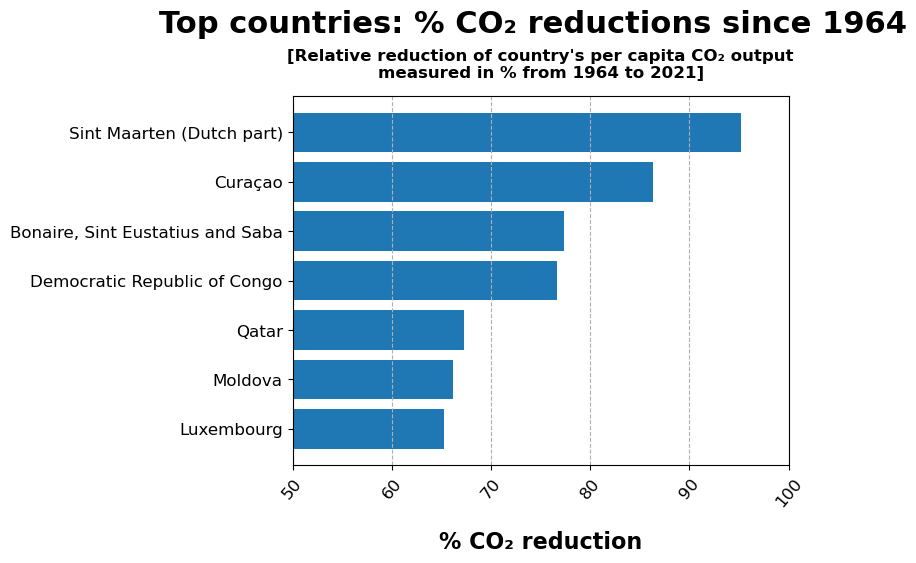

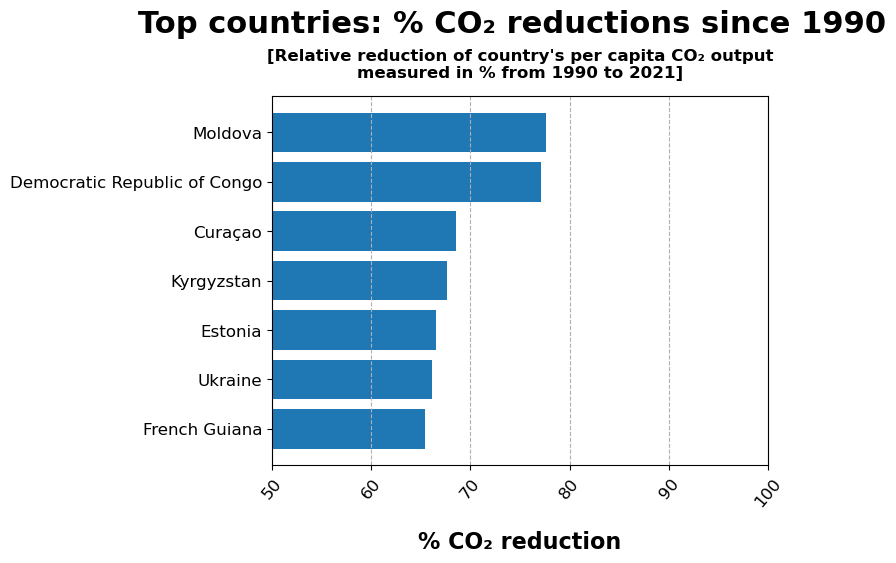

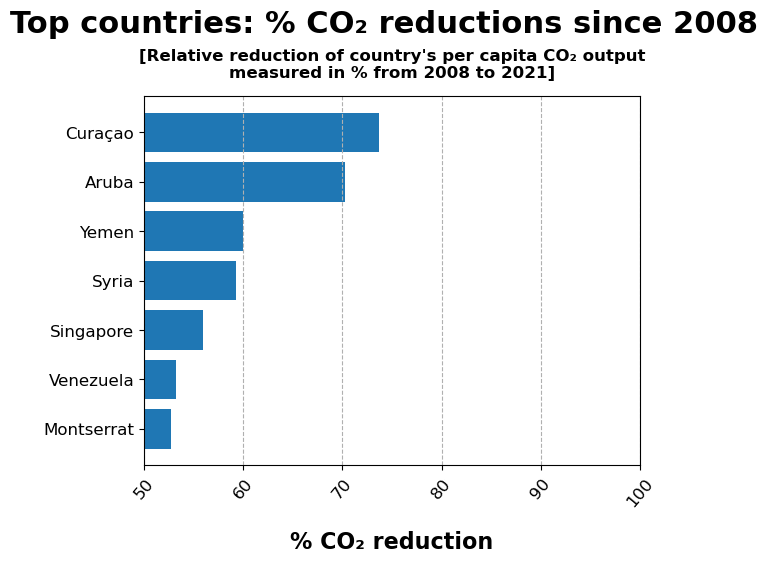

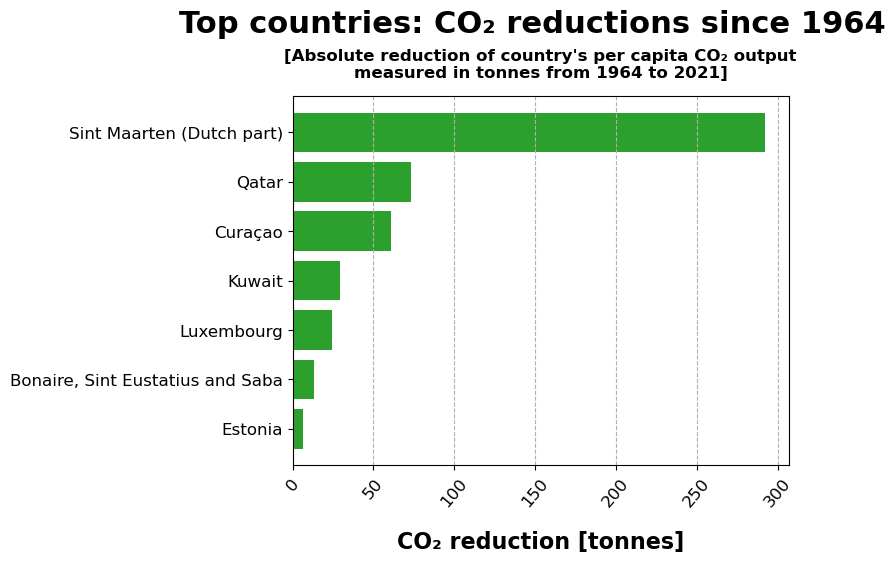

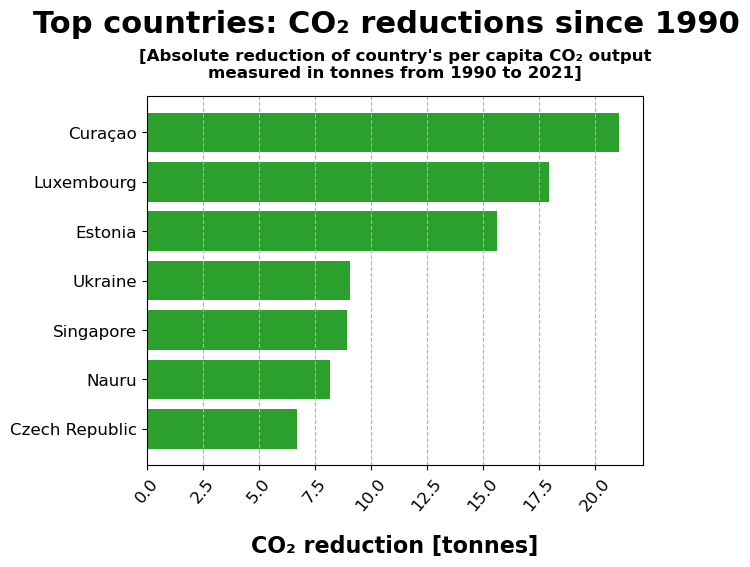

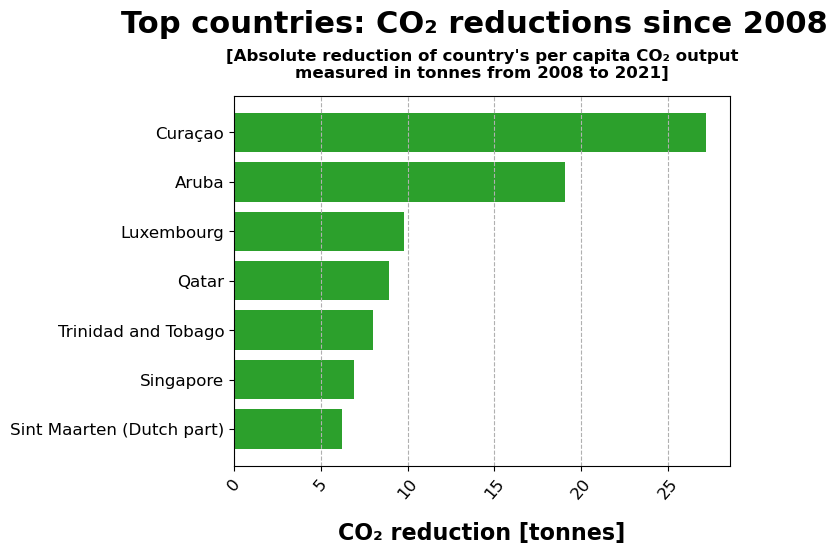

In [89]:
# MAKING HORIZONTAL BAR CHARTS OF ALL CO2 REDUCTION MEASURES
# 
# 
# While the top countries of all 6 CO2 reduction measures
# (i.e. both the relative and absolute CO2 reductions, over
# reference periods 1964-2021, 1990-2021, and 2008-2021)
# were already plotted in the year charts above,
# also make horizontal bar charts of each of these.
# 
# This to make the total CO2 reductions over the respective
# reference period even clearer (without showing the other
# years), especially for the absolute CO2 reductions in tonnes.
# (those could only be deduced from the slopes in the charts
# above).
# 
# To be shown in Appendix of the report.
# 
# ---------------------------------------------------------
# 
# BAR CHART OF RELATIVE CO2 REDUCTIONS:

plot_top_CO2_reducers_barchart(
    df_top_perc2164, 'delta_perc_21_64', 1964,
    save_plot=False, fig_path='Image_files/',
    fig_name='Winc_Module_7_Assignment__Fig_A2_7A.png'
)

plot_top_CO2_reducers_barchart(
    df_top_perc2190, 'delta_perc_21_90', 1990,
    save_plot=False, fig_path='Image_files/',
    fig_name='Winc_Module_7_Assignment__Fig_A2_7C.png'
)

plot_top_CO2_reducers_barchart(
    df_top_perc2108, 'delta_perc_21_08', 2008,
    save_plot=False, fig_path='Image_files/',
    fig_name='Winc_Module_7_Assignment__Fig_A2_7E.png'
)
# ---------------------------------------------------------
# 
# BAR CHART OF ABSOLUTE CO2 REDUCTIONS:

plot_top_CO2_reducers_barchart(
    df_top_delta_2164, 'delta_2021_1964', 1964,
    save_plot=False, fig_path='Image_files/',
    fig_name='Winc_Module_7_Assignment__Fig_A2_7B.png'
)

plot_top_CO2_reducers_barchart(
    df_top_delta_2190, 'delta_2021_1990', 1990,
    save_plot=False, fig_path='Image_files/',
    fig_name='Winc_Module_7_Assignment__Fig_A2_7D.png'
)

plot_top_CO2_reducers_barchart(
    df_top_delta_2108, 'delta_2021_2008', 2008,
    save_plot=False, fig_path='Image_files/',
    fig_name='Winc_Module_7_Assignment__Fig_A2_7F.png'
)



In [90]:
# PLOTTING RELATIVE CO2 REDUCTION OF 1 COUNTRY
# 
# 
# 4) Helper function to plot the CO2 reduction
#     of a single country, showing how the 'per capita' 
#     calculation is built up:
# 
#     a) the overall CO2 output (numerator)
#     b) the population size (denominator)
#     c) the CO2 per capita output.
# 
#     All 3 variables are shown as a RELATIVE %
#     compared to their respective value in the
#     specified baseline year.
# 
#     This helps to see whether a quickly growing
#     population AND/OR a large overall CO2 decrease
#     is/are the main driver(s) behind the CO2 per capita
#     reduction.

def plot_co2_onecountry_rel(
    country_name, base_year=1964,    
    save_plot=False, fig_path='Image_files/', fig_name='top_CO2_reducers.png'
    ):
    
    # Define dict of titles for plot
    # (with manual adjustment for "Bonaire, Sint Eustatius and Saba",
    # broken up bcs. of long string):
    plt_titles = {
        'xlabel': 'Year',
        'ylabel': f'% of {base_year} value',
        'suptitle': f'CO\u2082 reduction of {country_name}',
#         'suptitle': f'CO\u2082 reduction of Bonaire,\nSint Eustatius and Saba',
        'title': '[Variables shown as RELATIVE % ' \
                 f'cf. to their {base_year} baselines]'
        }
    
    # The 4 reference years to plot:
    ref_years = [1964, 1990, 2008, 2021]
            
    # Create mini-DF of the country, with the 3 variables:
    idx = pd.IndexSlice
    
    df_country = df_CO2_by_country.loc[
        idx[country_name, ['population', 'co2', 'co2_per_capita']],
        ref_years
    ]
    
    fig, ax = plt.subplots()
    
    # Plot 4 vertical lines for the 4 reference years, as an    
    # "extra" vertical grid (on top of the main grid), to help
    # make understanding the chart & approach super clear:
    for year in ref_years:
        ax.axvline(x=year,
                   linestyle='--', linewidth=1.15,
                   alpha=0.48, color='black')
        
        # Adjust height of 'year' annotation text
        # based on country (as it will overlap with
        # the plotted points for Sint Maarten otherwise):
        if country_name == 'Sint Maarten (Dutch part)':
            y_text = 300
        else:
            y_text = 800
        
        # ...and add rotated year annotation on top of each line
        # at specified (x,y) location:
        ax.text(year - 2.5, y_text,
                str(year),
                weight='bold', style='oblique',
                rotation=50, fontsize=9.5)
    
    
    # Add a horizontal dashed line for the 100% baseline output
    # of the "denominator" year (1964, 1990 or 2008), with annotation:
    ax.axhline(y=100,
               linestyle='--', linewidth=3, color='black')
        
    # Adjust height of 'baseline year =' annotation text
    # based on country (as it will overlap with
    # the plotted points for Curaçao otherwise):
    if country_name == 'Curaçao':
            y_text2 = 75
    else:
            y_text2 = 115
    
    ax.text(1997.2, y_text2,
            str(base_year) + ' baseline = 100%',
            weight='bold', fontsize=11.5)
    
    # For each of 3 variables (= index level 1 of the DF row),
    # plot its relative % values (relative to baseline year value = 100%)
    # against the 4 years.
    # 
    # By doing this as the final plotting step, we plot these colored lines
    # ON TOP OF the horizontal & vertical black/grey lines plotted above:
    for index, row in df_country.iterrows():
        
        # Transform variable values to % of its baseline year value:
        row = 100 * row/ row[base_year]
        
        # Adjust label strings for use in the Legend:
        if index[1]=='population':
            variable = 'Population size'
            
        elif index[1]=='co2':
            variable = 'Overall CO\u2082 output  [Mtonnes]'
            
        elif index[1]=='co2_per_capita':
            variable = 'Per capita CO\u2082 output  [tonnes]'
        
        # Now plot the respective variable:
        ax.plot(ref_years, row,
                label=variable,
                linewidth=2.3,
                marker='.', markersize=11)
    
       
    # Set font size of tick labels on x- and y-axis:
    ax.tick_params(labelsize=11)

    # Make y-axis logarithmic and set custom tick positions:
    import matplotlib.ticker
    ax.set_yscale('log')
    ax.set_yticks([3, 5, 10, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500, 700, 1000, 1500])
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    # Set major ticks on x-axis every 10 years:
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    
    # Also show 10 minor x-ticks in between:
    from matplotlib.ticker import AutoMinorLocator
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
    
    # Set degrees of rotation of the x-tick labels (= years):
    ax.tick_params(axis="x", labelrotation=50)
    
    # Set min & max values for the x- and y-axis:
    ax.set_xlim(1960, 2023)
#     ax.set_ylim(3, 300)
    ax.set_ylim(3, 1500)
    
    # Setting the axis labels; the labelpad property sets the distance to the chart:
    ax.set_xlabel(plt_titles['xlabel'], weight='bold', fontsize=16, labelpad=15)
    ax.set_ylabel(plt_titles['ylabel'], weight='bold', fontsize=16, labelpad=15)
    
    # Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
    plt.suptitle(plt_titles['suptitle'], weight='bold', y=1.06, fontsize=22)
    plt.title(plt_titles['title'], weight='bold', pad=22)
    
    # Show legend:
    ax.legend(
        loc='upper left',
        # Put legend outside of the chart, on the top right:
        bbox_to_anchor=(1.01, 1.02),  
        fontsize=9.5,
        alignment='center',
        facecolor='wheat',
        framealpha=0.5,
        edgecolor='k',
        title='Variables:\n',
        title_fontproperties={'weight': 'bold'}
    )
    
    # Add x-y grid:
    ax.grid(True, linestyle='--')
        
    # Save plot as PNG, depending on input:
    if save_plot==True:
                
        plt.savefig(
            fig_path + fig_name,
            dpi=500,
            bbox_inches='tight'
        )
        
    plt.show()



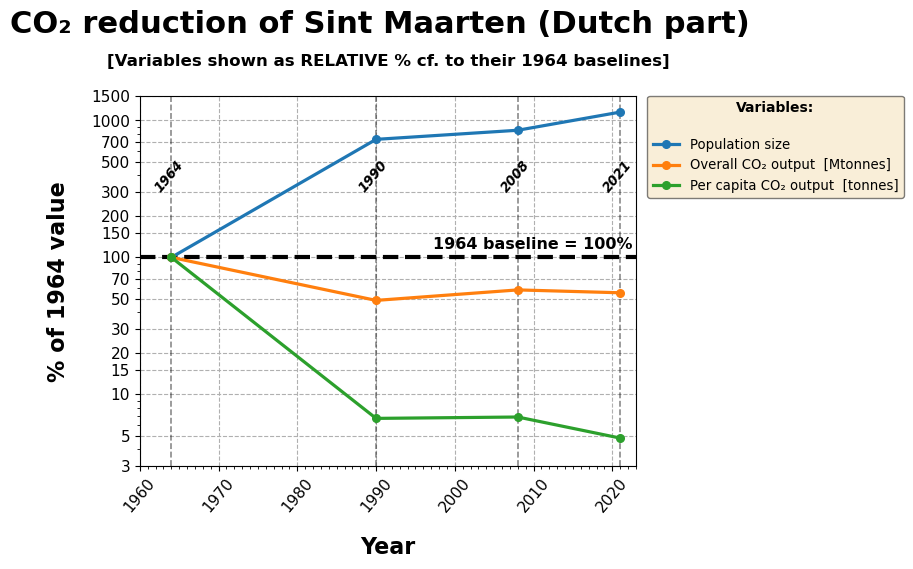

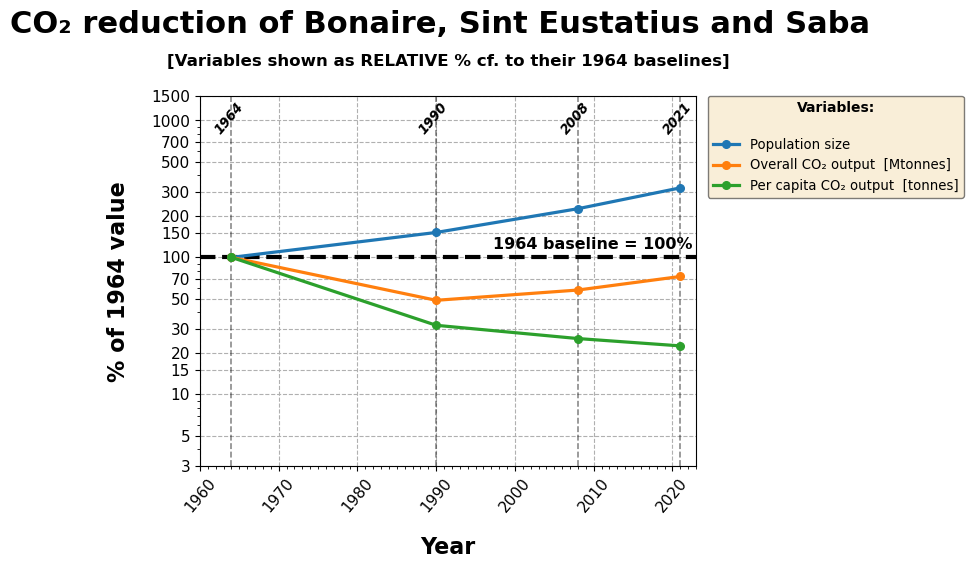

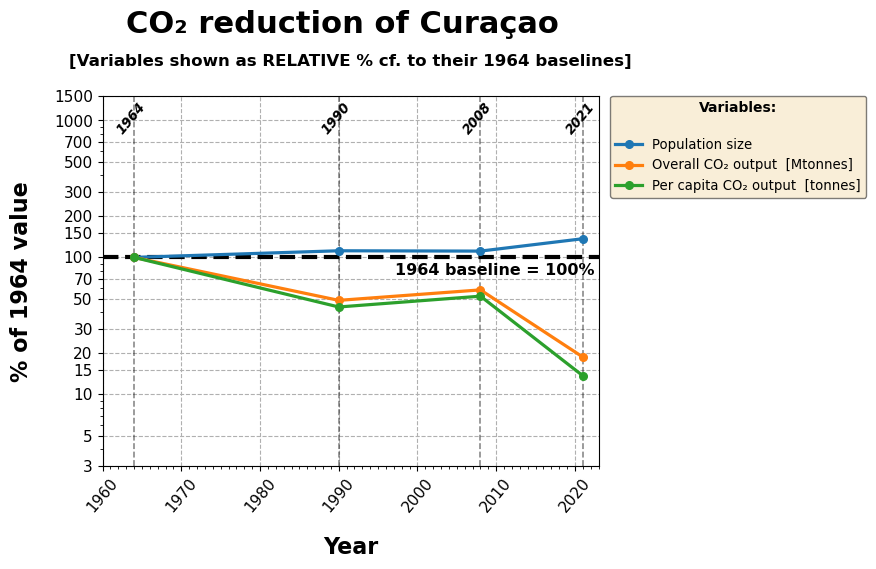

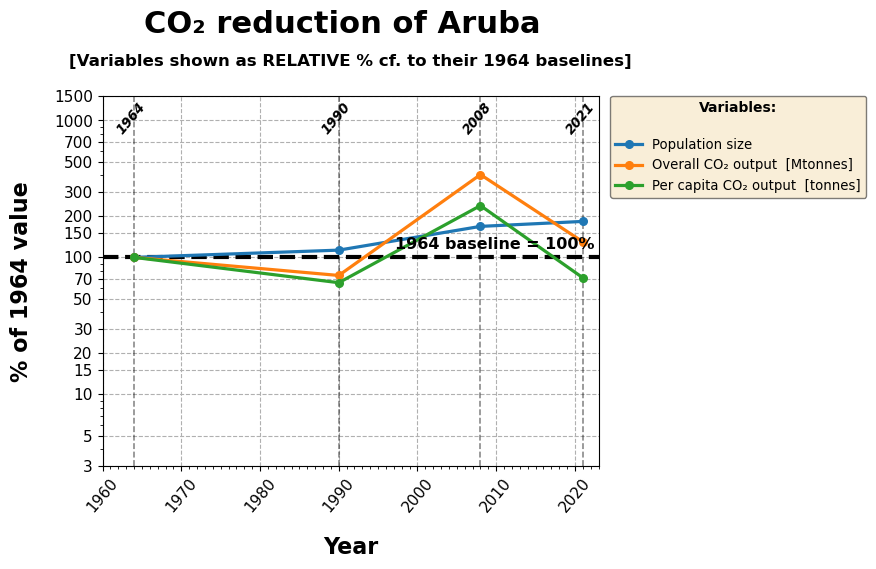

In [91]:
# MAKING PLOTS FOR NETHERLANDS ANTILLEAN COUNTRIES
# 
# Using the helper function, make subplots for each of the 4 Netherlands Antillean
# countries (for use in Appendix 2 of the report), to show the different
# mechanisms behind each of their CO2 per capita reductions:

plot_co2_onecountry_rel('Sint Maarten (Dutch part)',
                        save_plot=False,
                        fig_name='Winc_Module_7_Assignment__Fig_A2_8A.png')

plot_co2_onecountry_rel('Bonaire, Sint Eustatius and Saba',
                        save_plot=False,
                        fig_name='Winc_Module_7_Assignment__Fig_A2_8B.png')

plot_co2_onecountry_rel('Curaçao',
                        save_plot=False,
                        fig_name='Winc_Module_7_Assignment__Fig_A2_8C.png')

plot_co2_onecountry_rel('Aruba',
                        save_plot=False,
                        fig_name='Winc_Module_7_Assignment__Fig_A2_8D.png')

    